In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings


#=================================================
# Modify paths to point to output files
#=================================================
# Case name (Straight Coast)
case_straight = 'Straight Coast'

# path to ocean_annual file
path_year_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_straight = xr.open_dataset(path_year_straight, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_straight = xr.open_dataset(path_rho2_straight, decode_times=True)

# path to ocean_annual_z file
path_z_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_straight = xr.open_dataset(path_z_straight, decode_times=True)



# Case name (Both Coast)
case_both = 'Both Coast'

# path to ocean_annual file
path_year_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_both = xr.open_dataset(path_year_both, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_both = xr.open_dataset(path_rho2_both, decode_times=True)

# path to ocean_annual_z file
path_z_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_both = xr.open_dataset(path_z_both, decode_times=True)



# Case name (Wide Coast)
case_wide = 'Wide Coast'

# path to ocean_annual file
path_year_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_wide = xr.open_dataset(path_year_wide, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_wide = xr.open_dataset(path_rho2_wide, decode_times=True)

# path to ocean_annual_z file
path_z_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_wide = xr.open_dataset(path_z_wide, decode_times=True)



# Case name (America Coast)
case_am = 'America Coast'

# path to ocean_annual file
path_year_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/900yr/27000101.ocean_annual.nc'
dy_am = xr.open_dataset(path_year_am, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/900yr/27000101.ocean_annual_rho2.nc'
drho_am = xr.open_dataset(path_rho2_am, decode_times=True)

# path to ocean_annual_z file
path_z_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/900yr/27000101.ocean_annual_z.nc'
dz_am = xr.open_dataset(path_z_am, decode_times=True)



# Case name (Africa Coast)
case_af = 'Africa Coast'

# path to ocean_annual file
path_year_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/1000yr/28000101.ocean_annual.nc'
dy_af = xr.open_dataset(path_year_af, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/1000yr/28000101.ocean_annual_rho2.nc'
drho_af = xr.open_dataset(path_rho2_af, decode_times=True)

# path to ocean_annual_z file
path_z_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/1000yr/28000101.ocean_annual_z.nc'
dz_af = xr.open_dataset(path_z_af, decode_times=True)



#=================================================
# Ignore runtime warnings: mean of empty slice
#=================================================
warnings.filterwarnings("ignore", message="Mean of empty slice")

#=================================================
# Modify latitudes to point to western and eastern
# boundaries of small basin and northern extent of SO.
# Comment out for AQUA and RIDGE cases. 
#=================================================
x_west = np.where(dy_both['xh']==211)[0][0]
x_east = np.where(dy_both['xh']==351)[0][0]
y = np.where(dy_both['yq']==-35)[0][0]
y_south = np.where(dy_both['yq']==-71)[0][0]
y_north = np.where(dy_both['yq']==71)[0][0]


/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [2]:
# Functions for Meridional Sections

def plot_salt_section(dataset, lon, z, case_name):
    t = np.linspace(33, 37, 11, endpoint=True)
    b = np.linspace(33, 37, 21, endpoint=True)
    fig, ax = plt.subplots(figsize=(12,5))
    cf = ax.contourf(dataset.yh, dataset.zl.sel(zl=slice(0,z)), 
                     dataset.so.sel(xh=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time'),
                     b, extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Salinity Section at'+' '+'{}'.format(lon)+'E', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel('[psu]', fontsize=12)
#     plt.savefig(fig_path+'{}_salt_section_{}.png'.format(basin, lon))
    plt.show()
    return

def plot_temp_section(dataset, lon, z, case_name):
    t = np.linspace(0, 28, 11, endpoint=True)
    b = np.linspace(0, 28, 21, endpoint=True)

    fig, ax = plt.subplots(figsize=(12,5))
    cf = ax.contourf(dataset.yh, dataset.zl.sel(zl=slice(0,z)), 
                     dataset.thetao.sel(xh=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                     b, cmap='magma', extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Temperature Section at'+' '+'{}'.format(lon)+'E', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel('[C]', fontsize=12)
    plt.show()
    return

def calc_sigma_wright(salt, temp, press=2000):
    '''Wright EOS density calculation. Default reference pressure is 2000db, but can be set to any pressure.'''

    p = press*10000
    
    a0 = 7.057924e-4
    a1 = 3.480336e-7
    a2 = -1.112733e-7

    b0 = 5.790749e8
    b1 = 3.516535e6
    b2 = -4.002714e4
    b3 = 2.084372e2
    b4 = 5.944068e5
    b5 = -9.643486e3

    c0 = 1.704853e5
    c1 = 7.904722e2
    c2 = -7.984422
    c3 = 5.140652e-2
    c4 = -2.302158e2
    c5 = -3.079464

    alpha_0 = a0 + a1*temp + a2*salt
    p_0 = b0 + b1*temp + b2*temp**2 + b3*temp**3 + b4*salt + b5*salt*temp
    lam = c0 + c1*temp + c2*temp**2 + c3*temp**3 + c4*salt + c5*salt*temp

    sigma = (p+p_0)/(lam + alpha_0*(p+p_0))
    
    sigma_xarray = temp.copy()
    sigma_xarray.attrs['units'] = 'kg/m^3' 
    sigma_xarray.attrs['long_name'] = 'potential density referenced to 2000 dbar'
    sigma_xarray.attrs['standard_name'] = 'sigma'
    sigma_xarray.values = sigma
    
    return sigma_xarray
#     return sigma


def plot_density_section(dataset, lon, z, case_name):
    t = np.linspace(1030, 1037, 11, endpoint=True)
    b = np.linspace(1030, 1037, 21, endpoint=True)

    density = calc_sigma_wright(dataset.so.sel(xh=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                                dataset.thetao.sel(xh=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                                press=2000)
    
    fig, ax = plt.subplots(figsize=(12,5))
    cf = ax.contourf(dataset.yh, dataset.zl.sel(zl=slice(0,z)), 
                     density, 
                     b, cmap='BuPu', extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Density Section at'+' '+'{}'.format(lon)+'E', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel('[kg m$^{-3}$]', fontsize=12)
    plt.show()
    return

def plot_u_section(dataset, lon, z, case_name):
    t = np.linspace(-0.1, 0.1, 11, endpoint=True)
    b = np.linspace(-0.1, 0.1, 21, endpoint=True)

    fig, ax = plt.subplots(figsize=(12,5))
    cf = ax.contourf(dataset.yh, dataset.zl.sel(zl=slice(0,z)), 
                     dataset.uo.sel(xq=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                     b, cmap='PRGn', extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Zonal Velocity Section at'+' '+'{}'.format(lon)+'E', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t)
    cbar.ax.set_ylabel('[m s$^{-1}$]', fontsize=12)
    plt.show()
    return

def plot_v_section(dataset, lon, z, case_name):
    t = np.linspace(-0.1, 0.1, 11, endpoint=True)
    b = np.linspace(-0.1, 0.1, 21, endpoint=True)

    fig, ax = plt.subplots(figsize=(12,5))
    cf = ax.contourf(dataset.yq, dataset.zl.sel(zl=slice(0,z)), 
                     dataset.vo.sel(xh=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                     b, cmap='PRGn', extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Meridional Velocity Section at'+' '+'{}'.format(lon)+'E', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t)
    cbar.ax.set_ylabel('[m s$^{-1}$]', fontsize=12)
    plt.show()
    return


# Functions for Zonal Sections

def plot_salt_section_zonal(dataset, lat, z, case_name):
    t = np.linspace(33, 37, 11, endpoint=True)
    b = np.linspace(33, 37, 21, endpoint=True)
    
    fig, ax = plt.subplots(figsize=(16,5))
    cf = ax.contourf(dataset.xh, dataset.zl.sel(zl=slice(0,z)), 
                     dataset.so.sel(yh=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time'),
                     b, extend='both')
    ax.invert_yaxis()
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Salinity Section at'+' '+'{}'.format(lat)+'N', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel('[psu]', fontsize=12)
    plt.show()
    return

def plot_temp_section_zonal(dataset, lat, z, case_name):
    t = np.linspace(0, 28, 11, endpoint=True)
    b = np.linspace(0, 28, 21, endpoint=True)
    
    fig, ax = plt.subplots(figsize=(16,5))
    cf = ax.contourf(dataset.xh, dataset.zl.sel(zl=slice(0,z)), 
                     dataset.thetao.sel(yh=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                     b, cmap='magma', extend='both')
    ax.invert_yaxis()
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Temperature Section at'+' '+'{}'.format(lat)+'N', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel('[C]', fontsize=12)
    plt.show()
    return

def plot_density_section_zonal(dataset, lat, z, case_name):
    t = np.linspace(1030, 1037, 11, endpoint=True)
    b = np.linspace(1030, 1037, 21, endpoint=True)

    density = calc_sigma_wright(dataset.so.sel(yh=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                                dataset.thetao.sel(yh=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                                press=2000)
    
    fig, ax = plt.subplots(figsize=(16,5))
    cf = ax.contourf(dataset.xh, dataset.zl.sel(zl=slice(0,z)), 
                     density, 
                     b, cmap='BuPu', extend='both')
    ax.invert_yaxis()
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Density Section at'+' '+'{}'.format(lat)+'N', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel('[kg m$^{-3}$]', fontsize=12)
    plt.show()
    return

def plot_u_section_zonal(dataset, lat, z, case_name):
    t = np.linspace(-0.1, 0.1, 11, endpoint=True)
    b = np.linspace(-0.1, 0.1, 21, endpoint=True)

    fig, ax = plt.subplots(figsize=(16,5))
    cf = ax.contourf(dataset.xq, dataset.zl.sel(zl=slice(0,z)), 
                     dataset.uo.sel(yh=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                     b, cmap='PRGn', extend='both')
    ax.invert_yaxis()
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Zonal Velocity Section at'+' '+'{}'.format(lat)+'N', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t)
    cbar.ax.set_ylabel('[m s$^{-1}$]', fontsize=12)
    plt.show()
    return

def plot_v_section_zonal(dataset, lat, z, case_name):
    t = np.linspace(-0.1, 0.1, 11, endpoint=True)
    b = np.linspace(-0.1, 0.1, 21, endpoint=True)

    fig, ax = plt.subplots(figsize=(16,5))
    cf = ax.contourf(dataset.xh, dataset.zl.sel(zl=slice(0,z)), 
                     dataset.vo.sel(yq=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                     b, cmap='PRGn', extend='both')
    ax.invert_yaxis()
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Meridional Velocity Section at'+' '+'{}'.format(lat)+'N', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t)
    cbar.ax.set_ylabel('[m s$^{-1}$]', fontsize=12)
    plt.show()
    return


# Straight Coast Sections

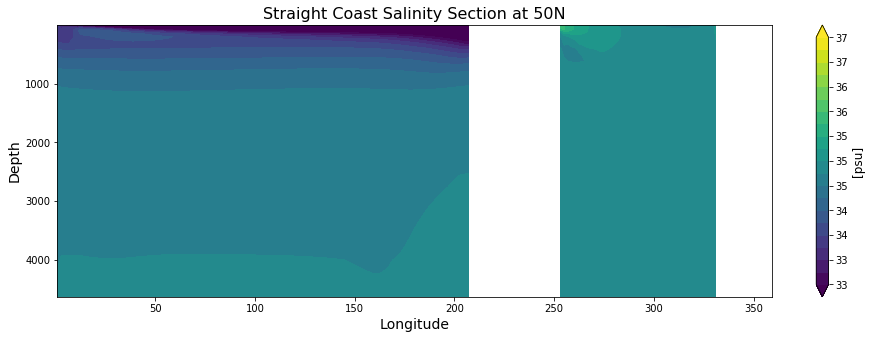

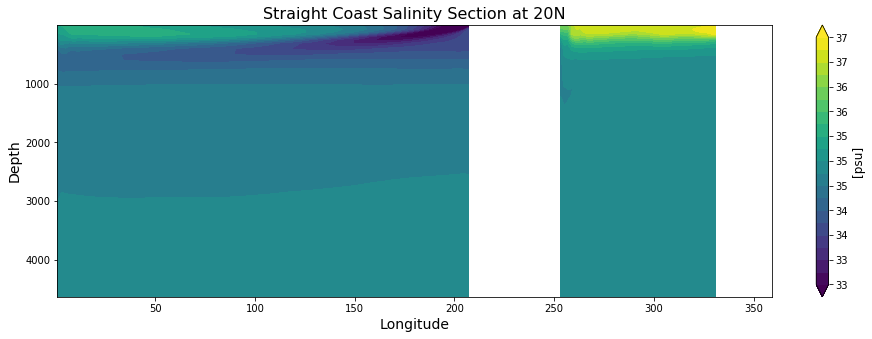

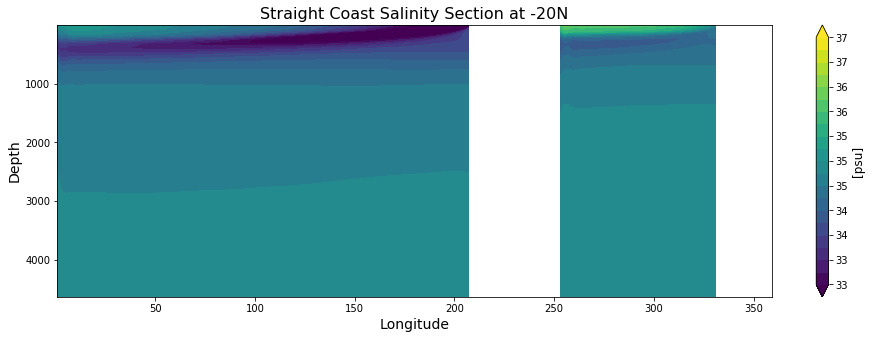

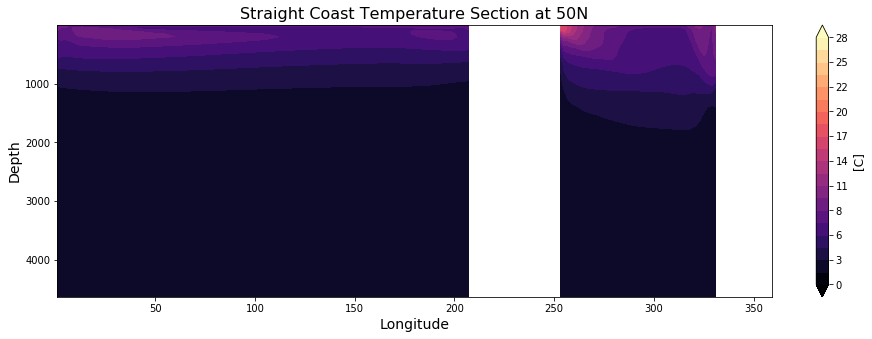

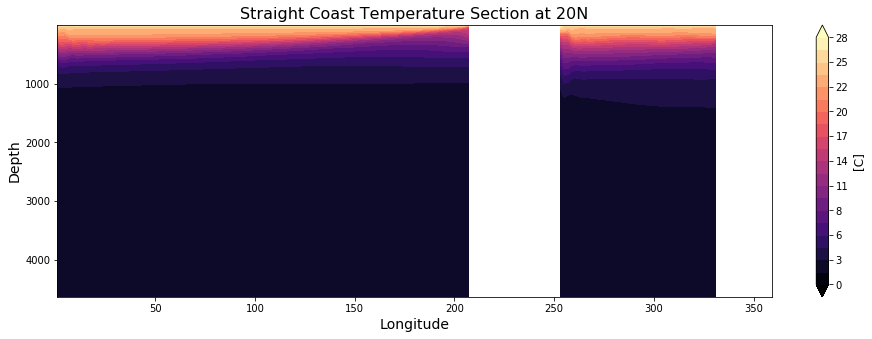

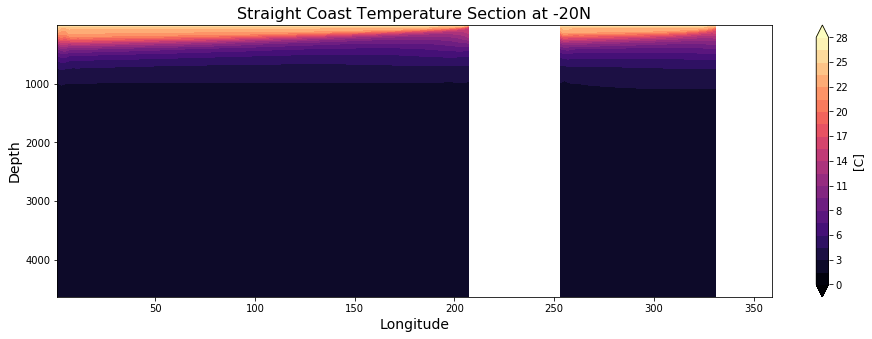

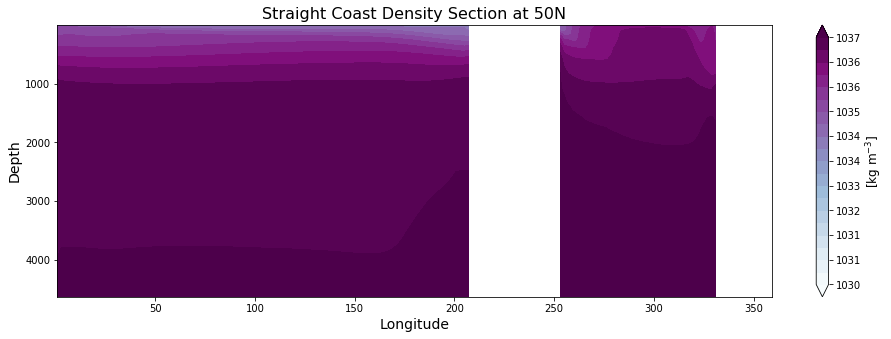

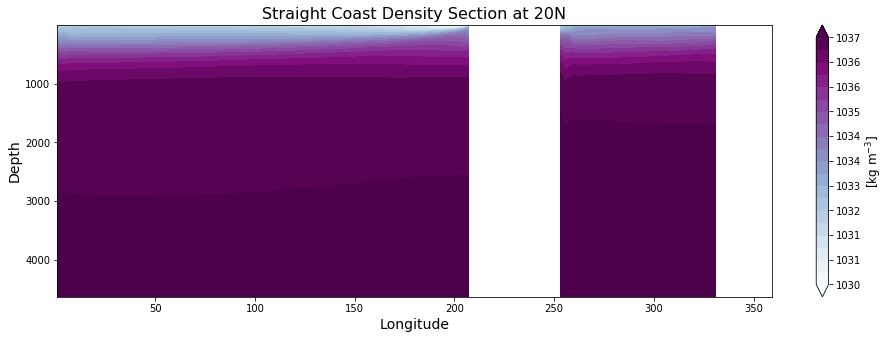

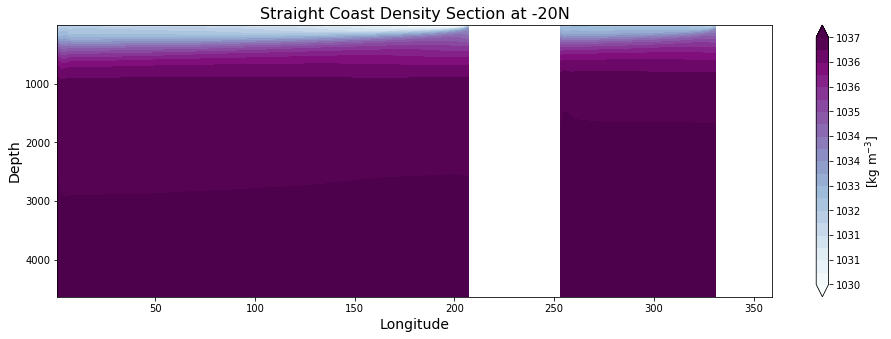

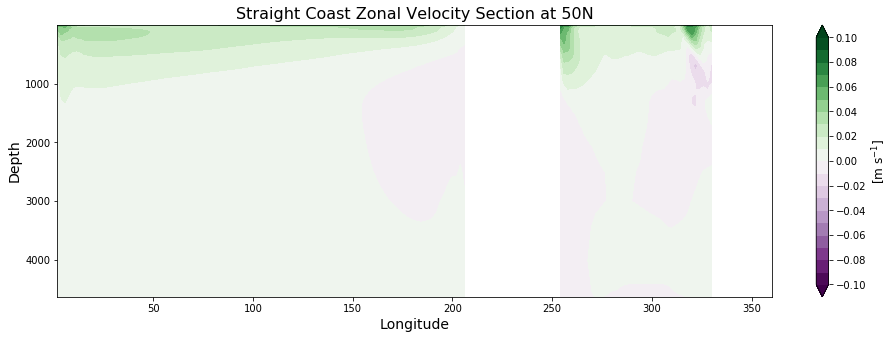

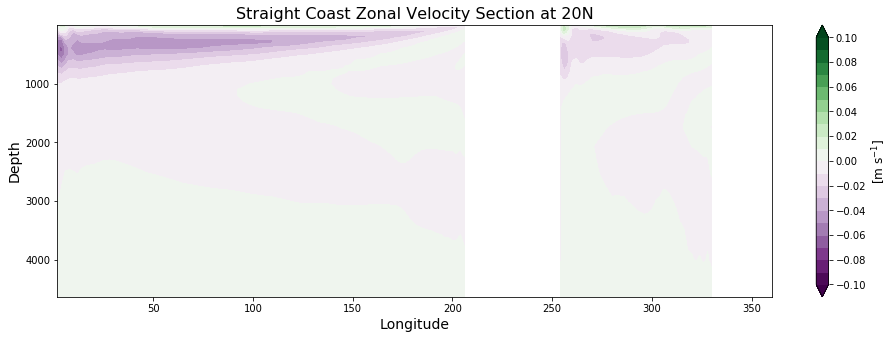

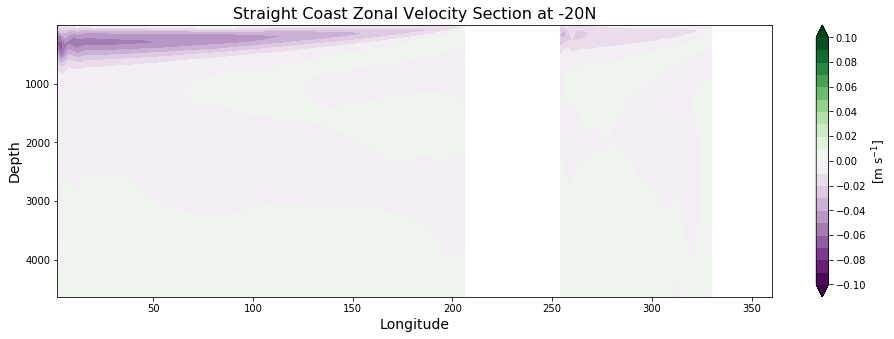

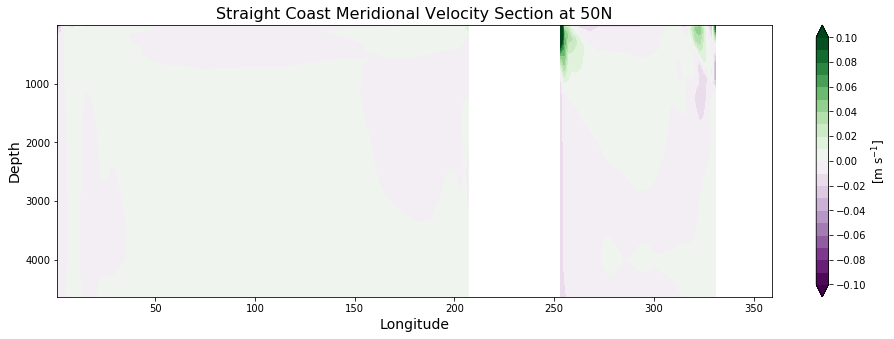

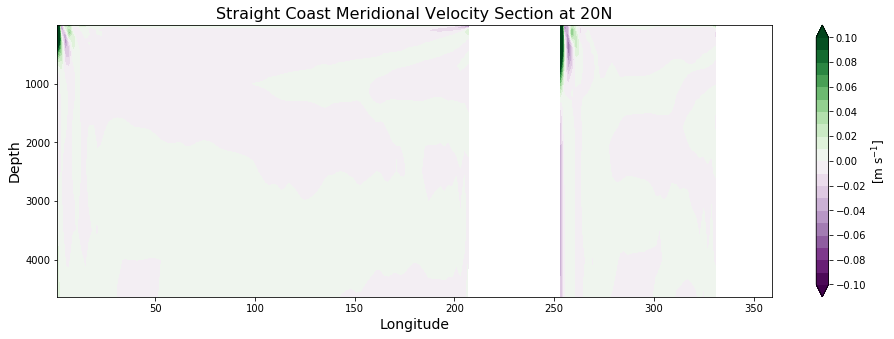

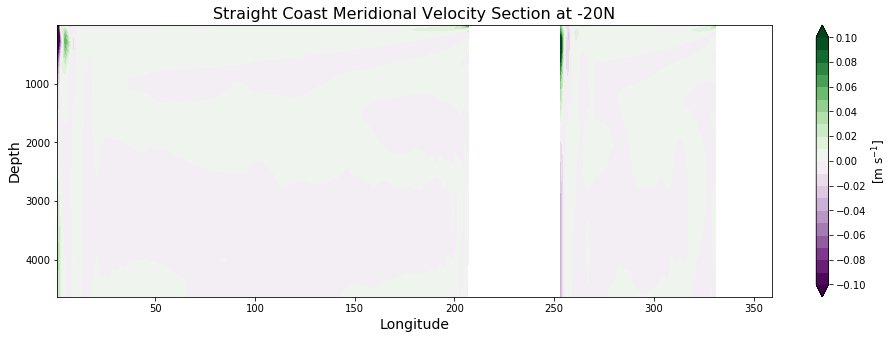

In [3]:
# Zonal sections for Straight Coast

plot_salt_section_zonal(dy_straight, 50, 5000, case_straight)
plot_salt_section_zonal(dy_straight, 20, 5000, case_straight)
plot_salt_section_zonal(dy_straight, -20, 5000, case_straight)

plot_temp_section_zonal(dy_straight, 50, 5000, case_straight)
plot_temp_section_zonal(dy_straight, 20, 5000, case_straight)
plot_temp_section_zonal(dy_straight, -20, 5000, case_straight)

plot_density_section_zonal(dy_straight, 50, 5000, case_straight)
plot_density_section_zonal(dy_straight, 20, 5000, case_straight)
plot_density_section_zonal(dy_straight, -20, 5000, case_straight)

plot_u_section_zonal(dy_straight, 50, 5000, case_straight)
plot_u_section_zonal(dy_straight, 20, 5000, case_straight)
plot_u_section_zonal(dy_straight, -20, 5000, case_straight)

plot_v_section_zonal(dy_straight, 50, 5000, case_straight)
plot_v_section_zonal(dy_straight, 20, 5000, case_straight)
plot_v_section_zonal(dy_straight, -20, 5000, case_straight)


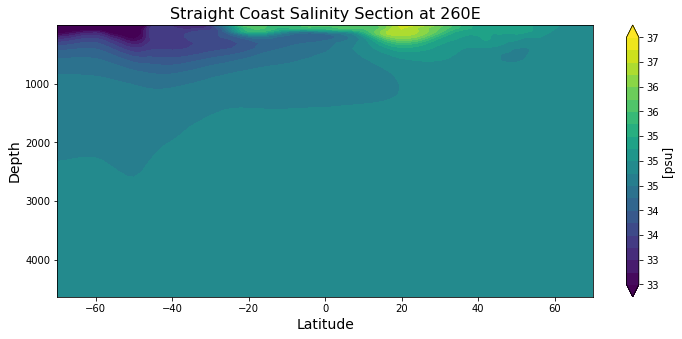

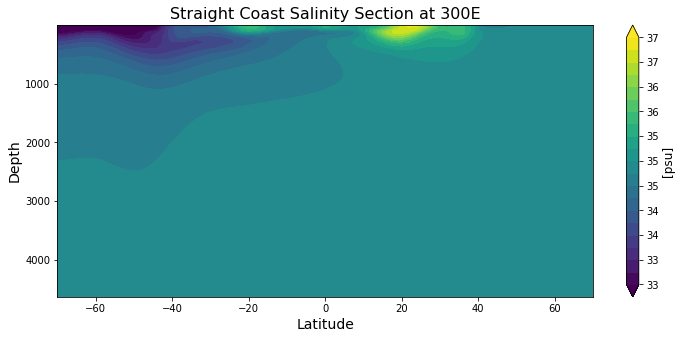

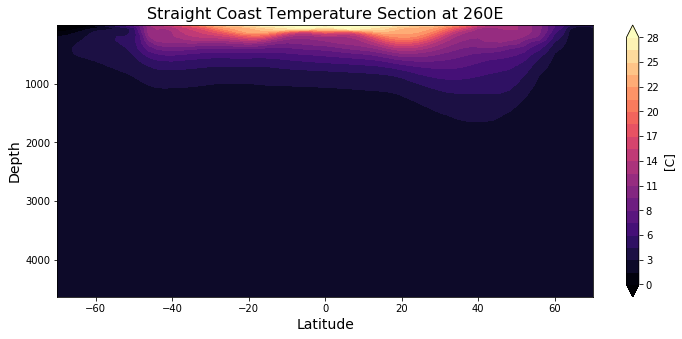

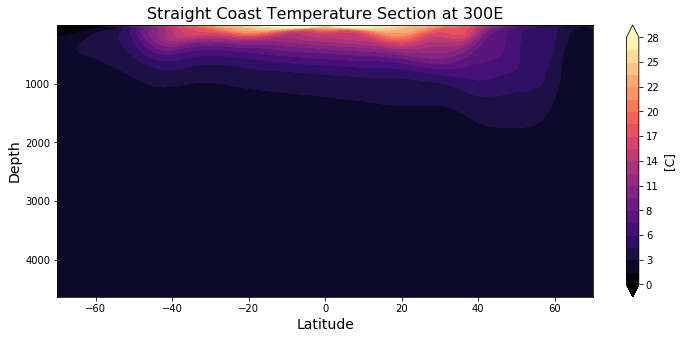

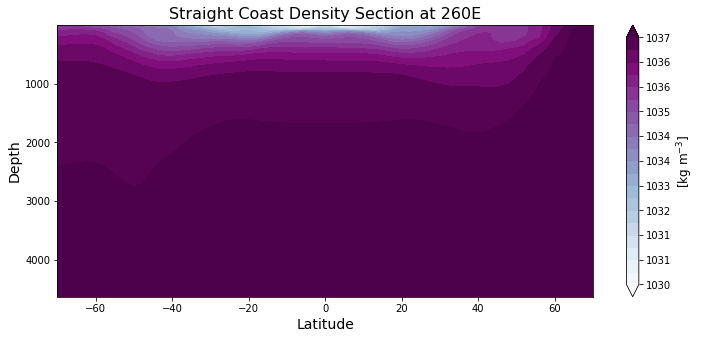

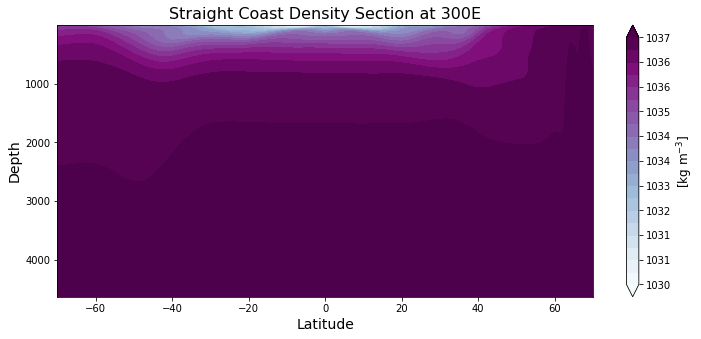

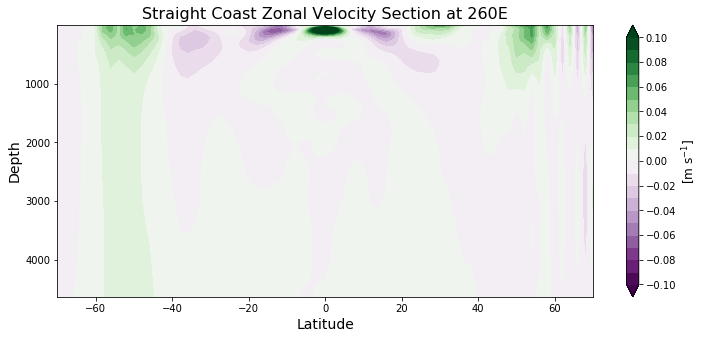

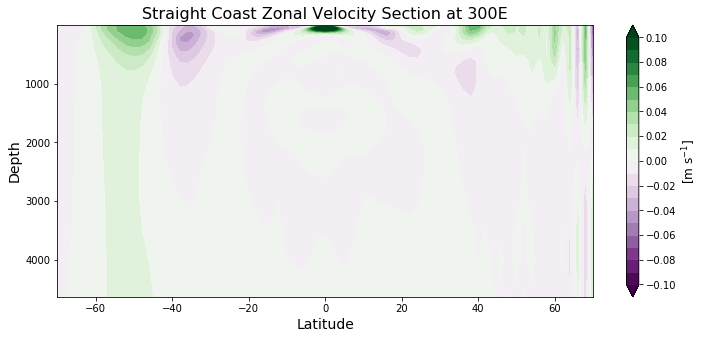

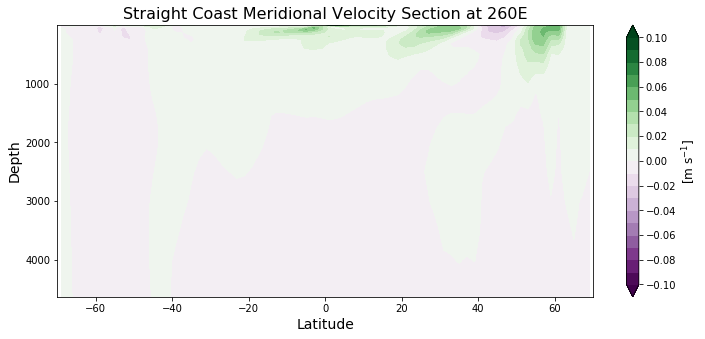

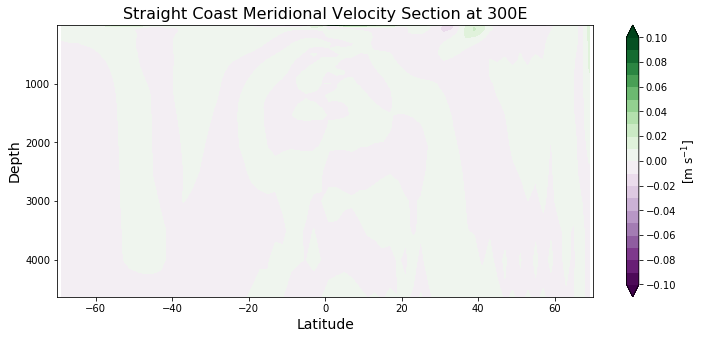

In [4]:
# These are all meridional sections for the small basin of Straight Coast

plot_salt_section(dy_straight, 260, 5000, case_straight)
plot_salt_section(dy_straight, 300, 5000, case_straight)

plot_temp_section(dy_straight, 260, 5000, case_straight)
plot_temp_section(dy_straight, 300, 5000, case_straight)

plot_density_section(dy_straight, 260, 5000, case_straight)
plot_density_section(dy_straight, 300, 5000, case_straight)

plot_u_section(dy_straight, 260, 5000, case_straight)
plot_u_section(dy_straight, 300, 5000, case_straight)

plot_v_section(dy_straight, 260, 5000, case_straight)
plot_v_section(dy_straight, 300, 5000, case_straight)



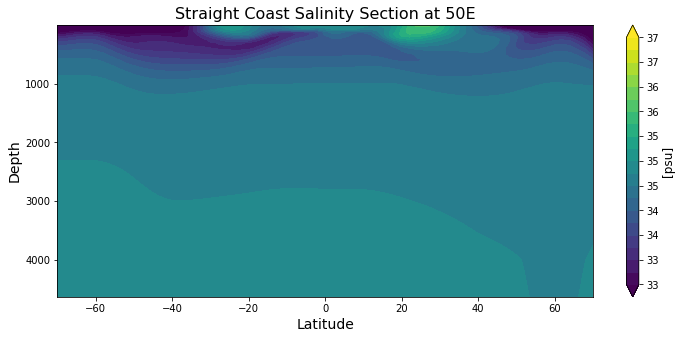

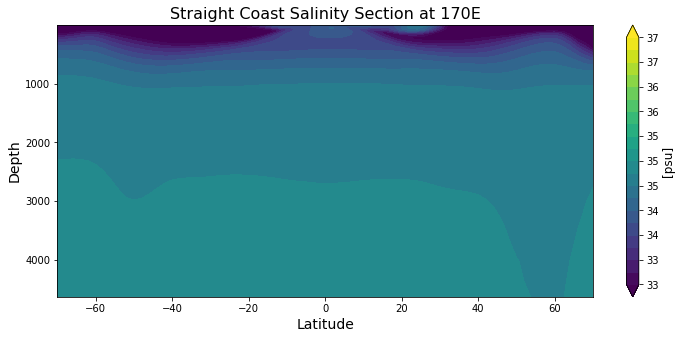

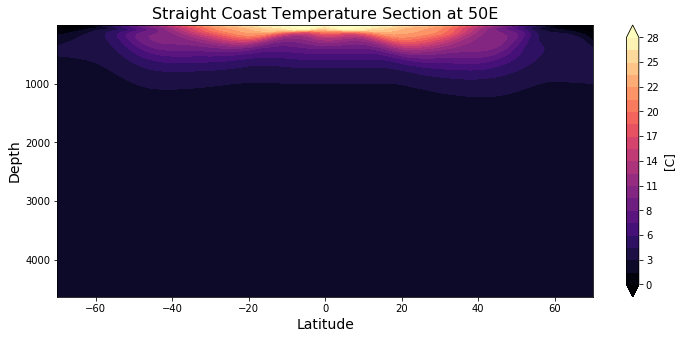

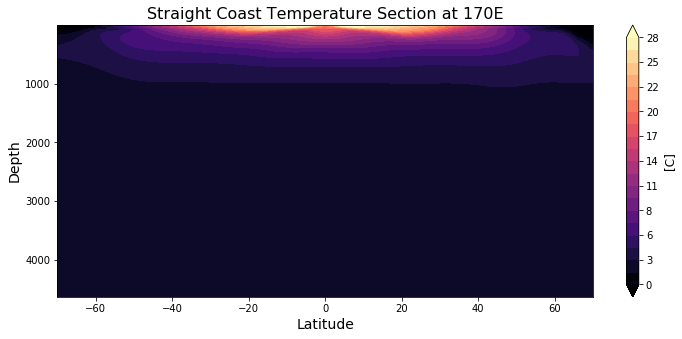

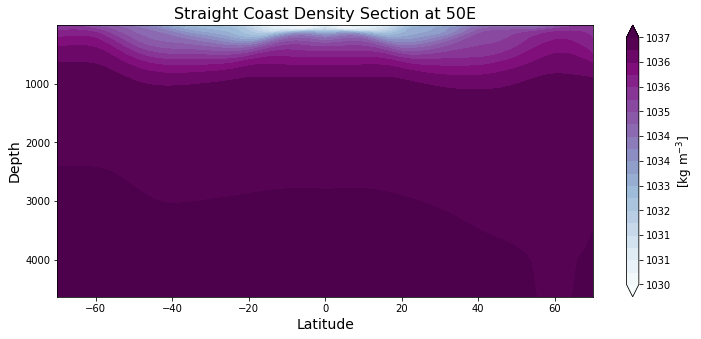

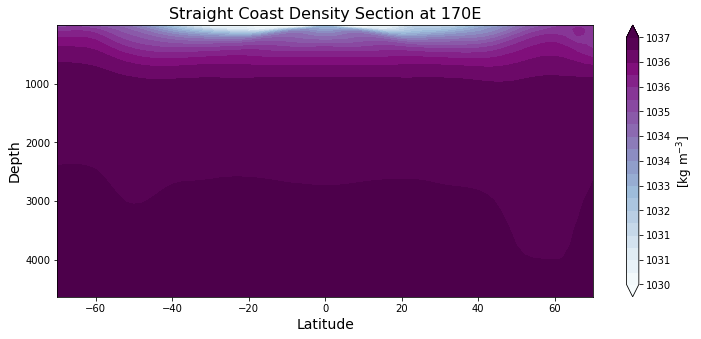

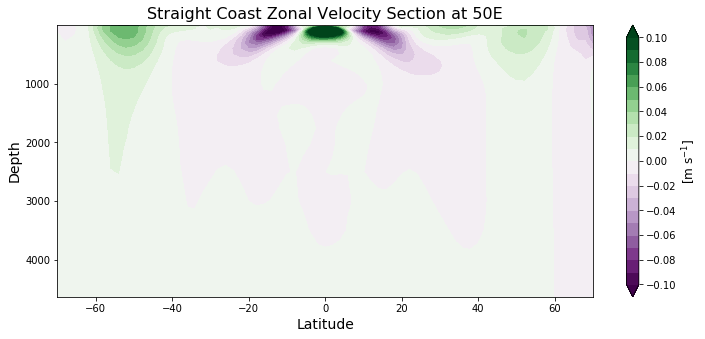

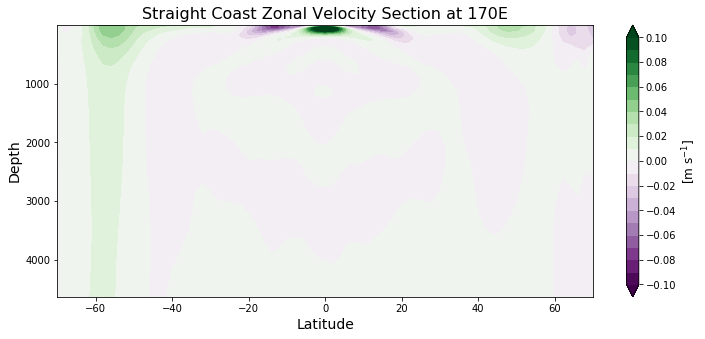

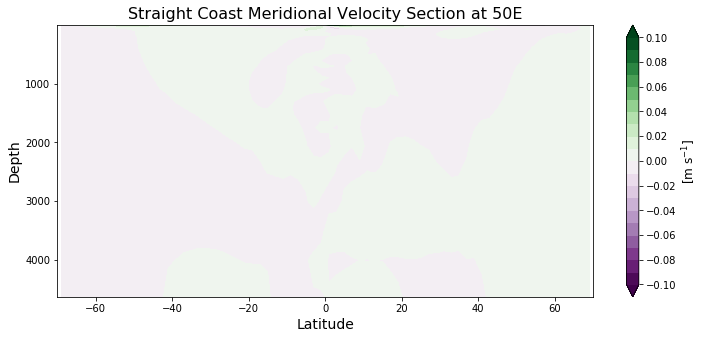

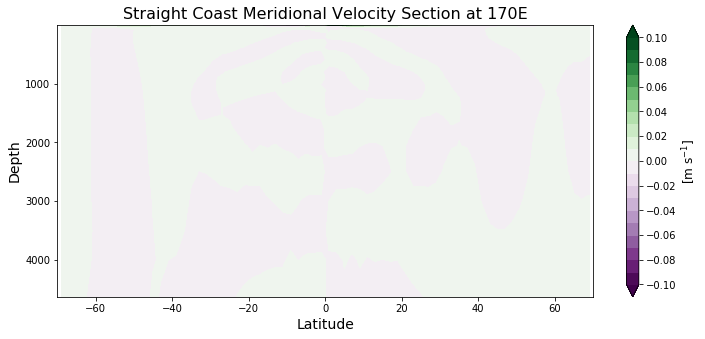

In [5]:
# These are meridional sections for the Straight Coast large basin

plot_salt_section(dy_straight, 50, 5000, case_straight)
plot_salt_section(dy_straight, 170, 5000, case_straight)

plot_temp_section(dy_straight, 50, 5000, case_straight)
plot_temp_section(dy_straight, 170, 5000, case_straight)

plot_density_section(dy_straight, 50, 5000, case_straight)
plot_density_section(dy_straight, 170, 5000, case_straight)

plot_u_section(dy_straight, 50, 5000, case_straight)
plot_u_section(dy_straight, 170, 5000, case_straight)

plot_v_section(dy_straight, 50, 5000, case_straight)
plot_v_section(dy_straight, 170, 5000, case_straight)


# Wide Coast Sections

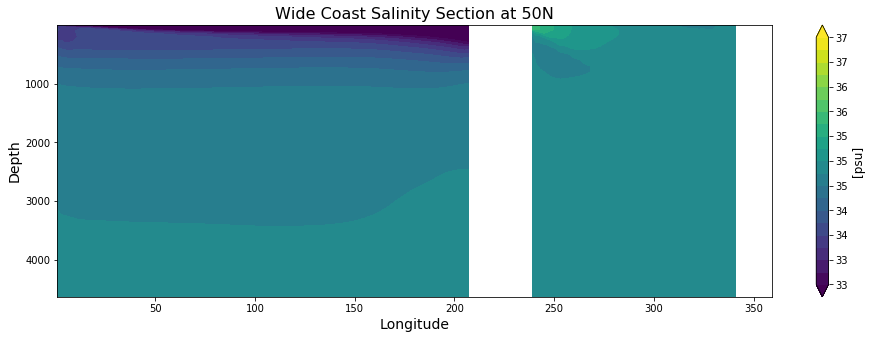

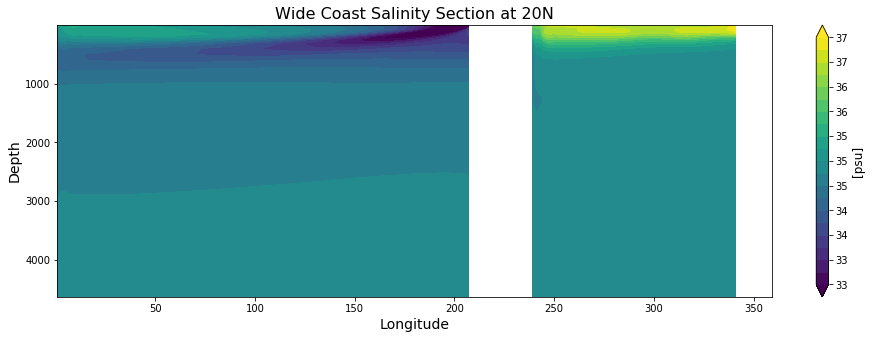

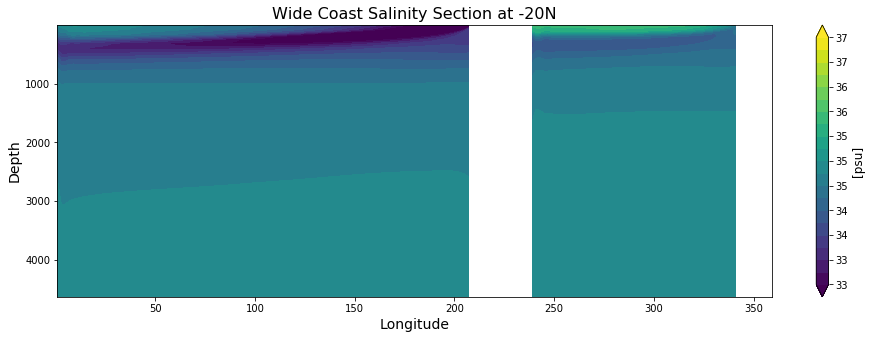

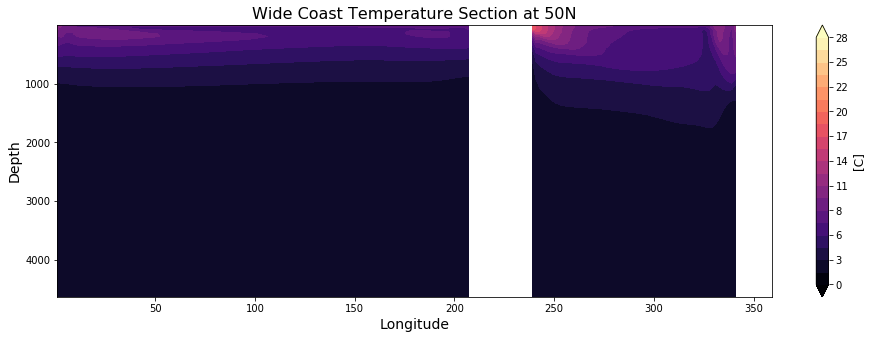

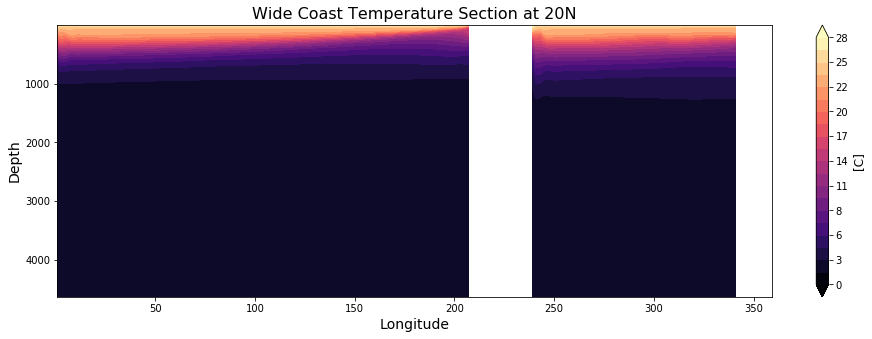

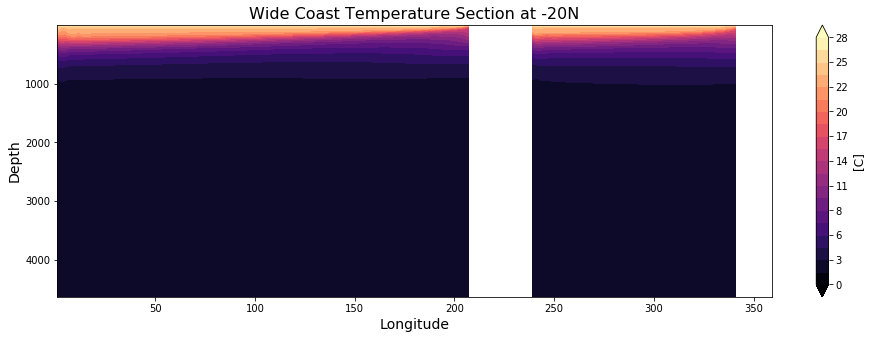

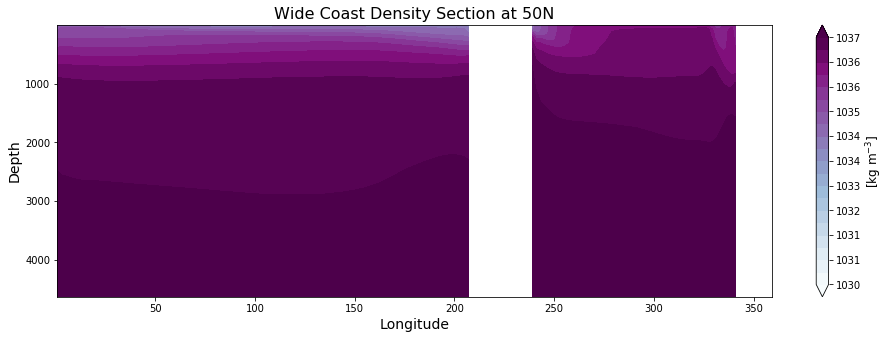

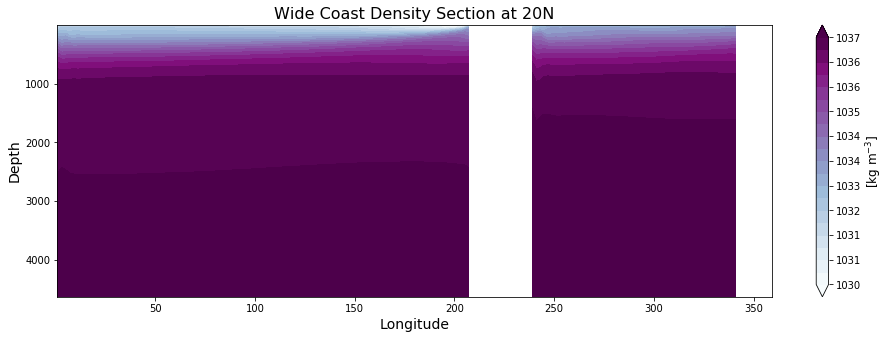

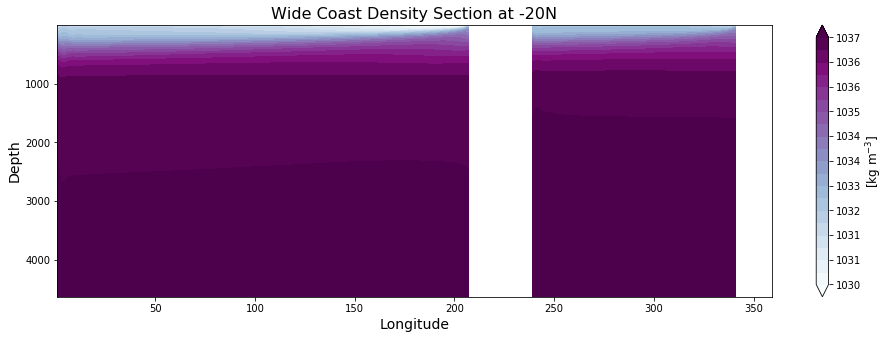

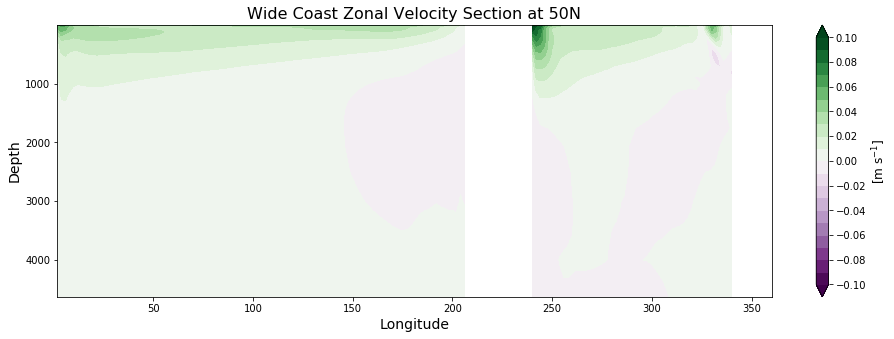

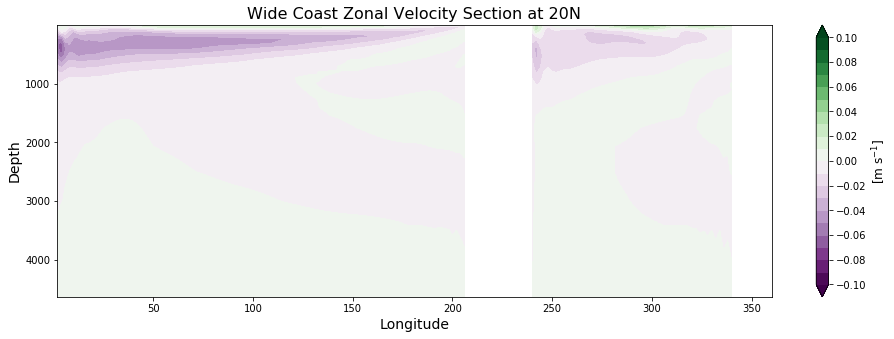

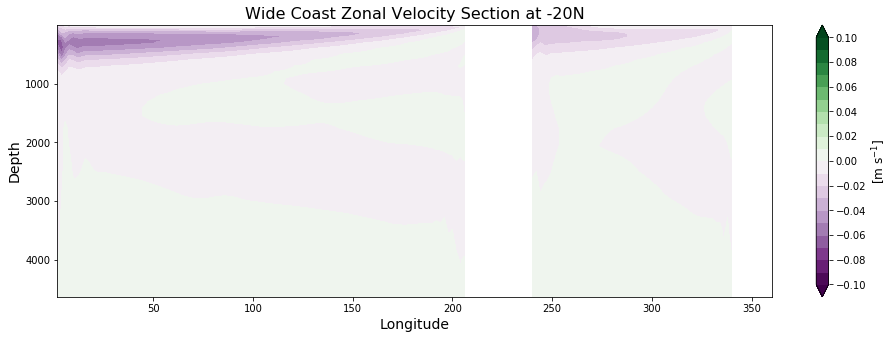

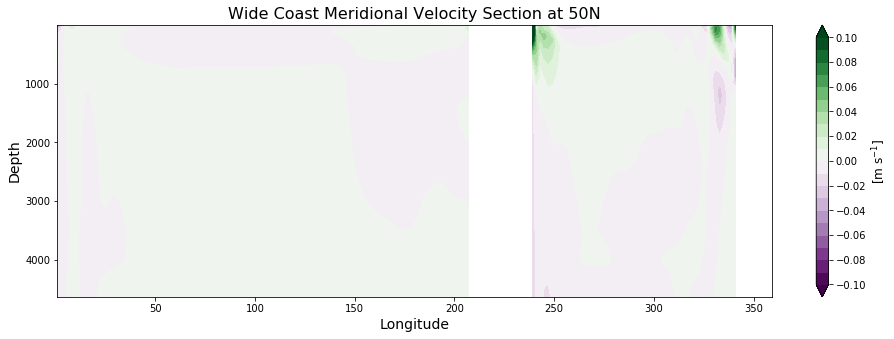

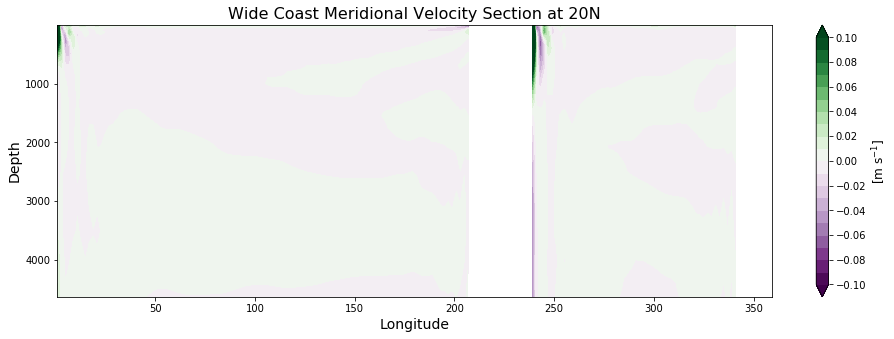

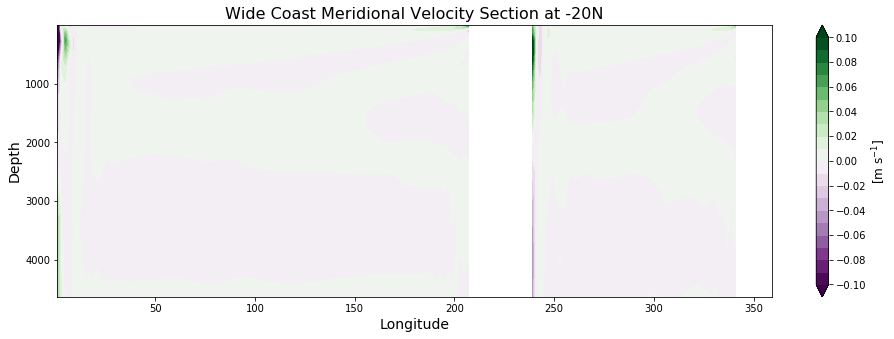

In [6]:
# Zonal Sections for Wide Coast

plot_salt_section_zonal(dy_wide, 50, 5000, case_wide)
plot_salt_section_zonal(dy_wide, 20, 5000, case_wide)
plot_salt_section_zonal(dy_wide, -20, 5000, case_wide)

plot_temp_section_zonal(dy_wide, 50, 5000, case_wide)
plot_temp_section_zonal(dy_wide, 20, 5000, case_wide)
plot_temp_section_zonal(dy_wide, -20, 5000, case_wide)

plot_density_section_zonal(dy_wide, 50, 5000, case_wide)
plot_density_section_zonal(dy_wide, 20, 5000, case_wide)
plot_density_section_zonal(dy_wide, -20, 5000, case_wide)

plot_u_section_zonal(dy_wide, 50, 5000, case_wide)
plot_u_section_zonal(dy_wide, 20, 5000, case_wide)
plot_u_section_zonal(dy_wide, -20, 5000, case_wide)

plot_v_section_zonal(dy_wide, 50, 5000, case_wide)
plot_v_section_zonal(dy_wide, 20, 5000, case_wide)
plot_v_section_zonal(dy_wide, -20, 5000, case_wide)


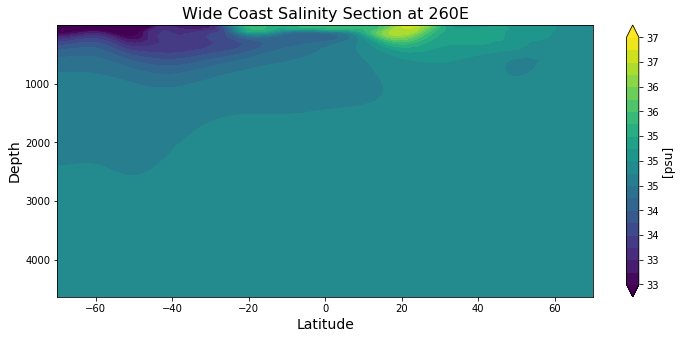

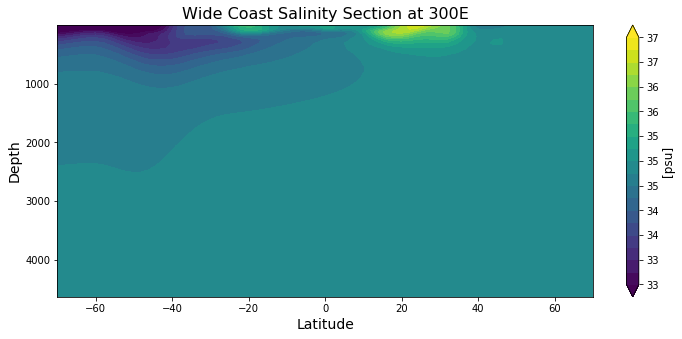

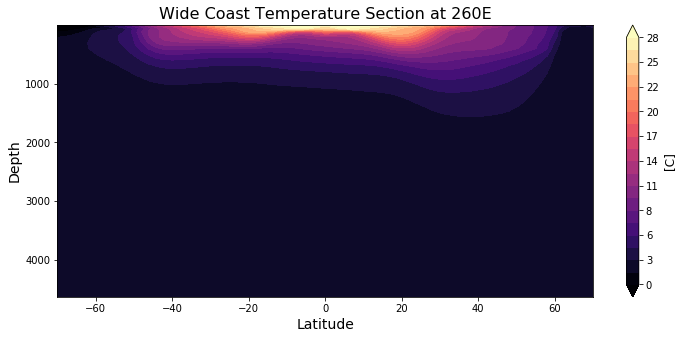

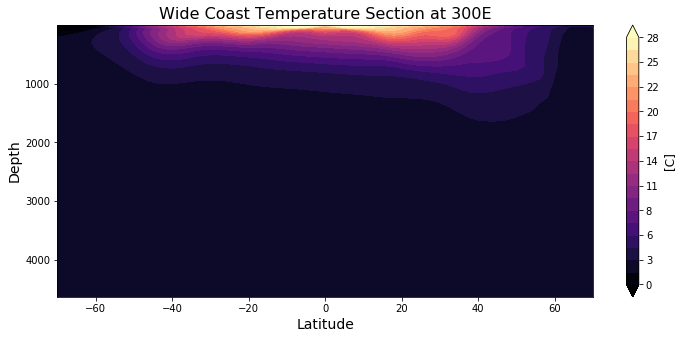

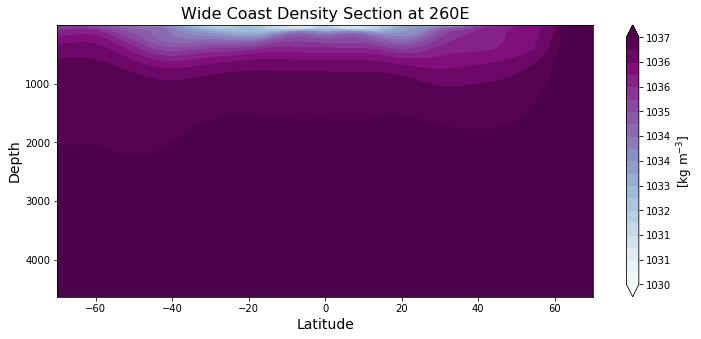

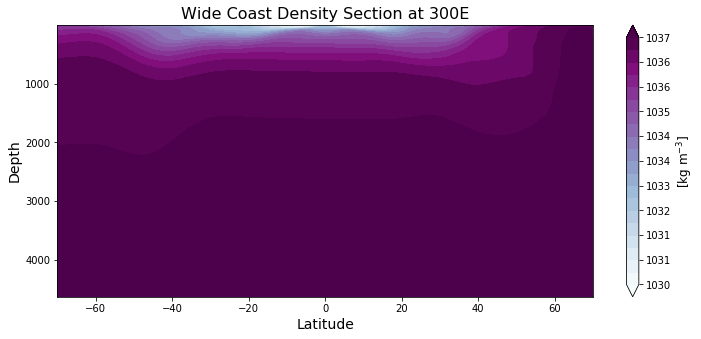

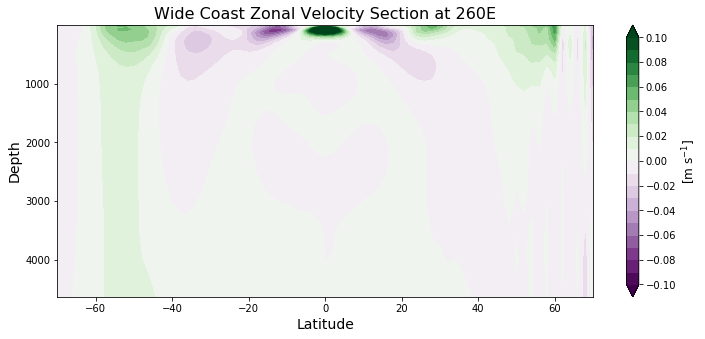

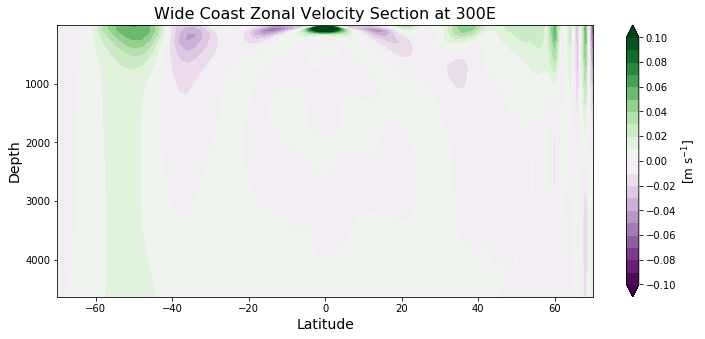

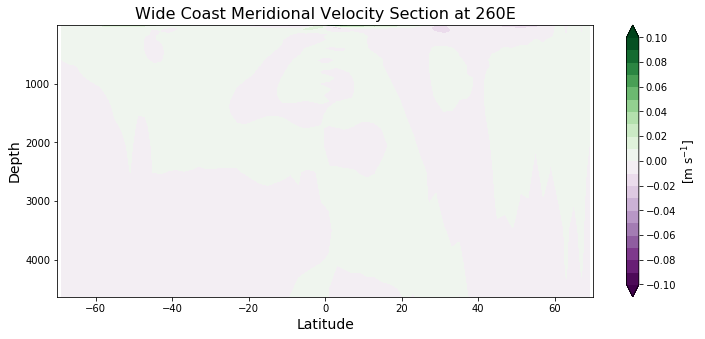

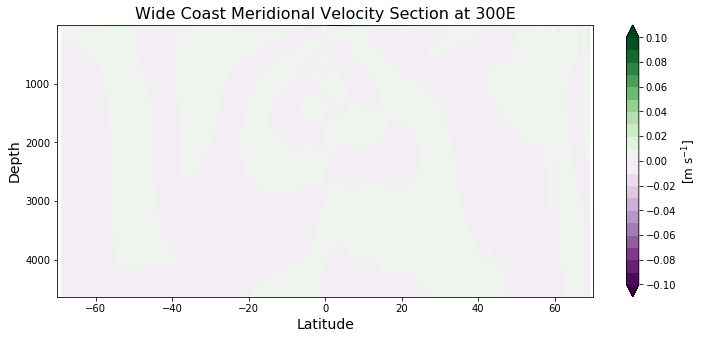

In [7]:
# These are all meridional sections for the small basin of Wide Coast

plot_salt_section(dy_wide, 260, 5000, case_wide)
plot_salt_section(dy_wide, 300, 5000, case_wide)

plot_temp_section(dy_wide, 260, 5000, case_wide)
plot_temp_section(dy_wide, 300, 5000, case_wide)

plot_density_section(dy_wide, 260, 5000, case_wide)
plot_density_section(dy_wide, 300, 5000, case_wide)

plot_u_section(dy_wide, 260, 5000, case_wide)
plot_u_section(dy_wide, 300, 5000, case_wide)

plot_v_section(dy_wide, 260, 5000, case_wide)
plot_v_section(dy_wide, 300, 5000, case_wide)


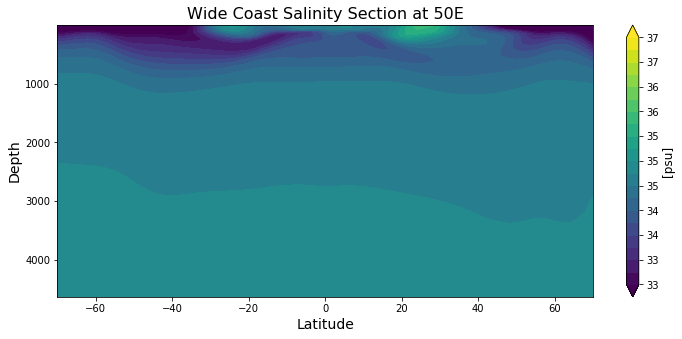

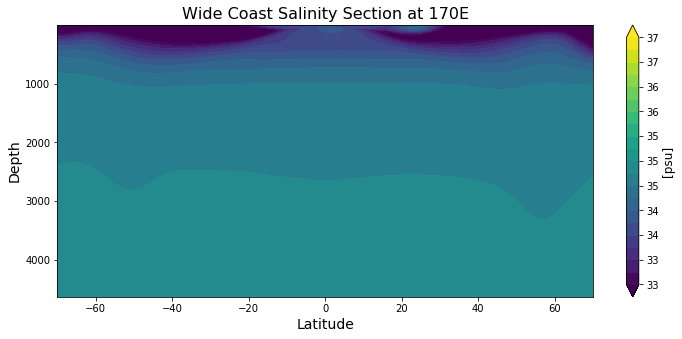

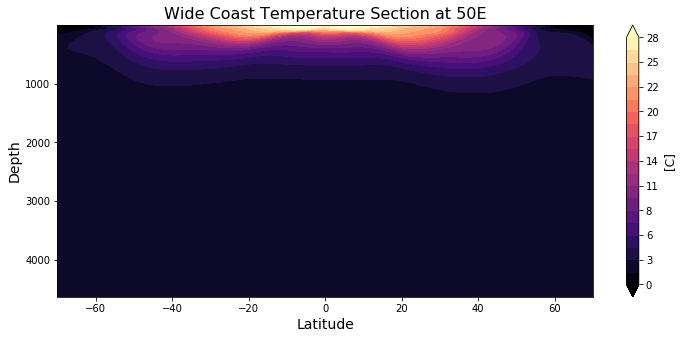

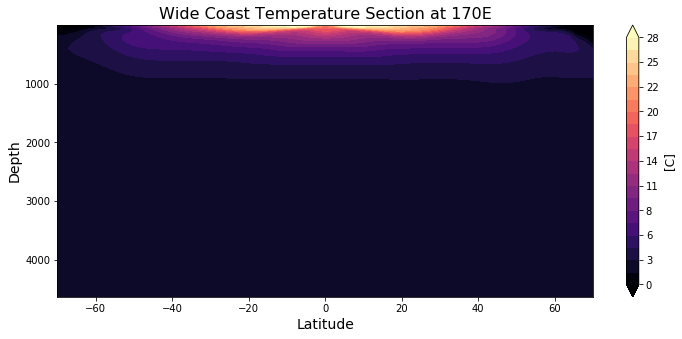

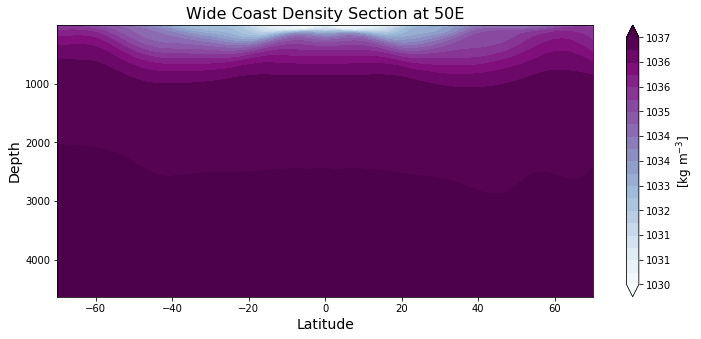

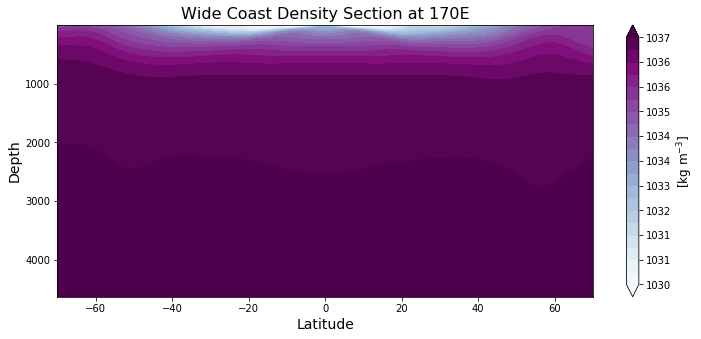

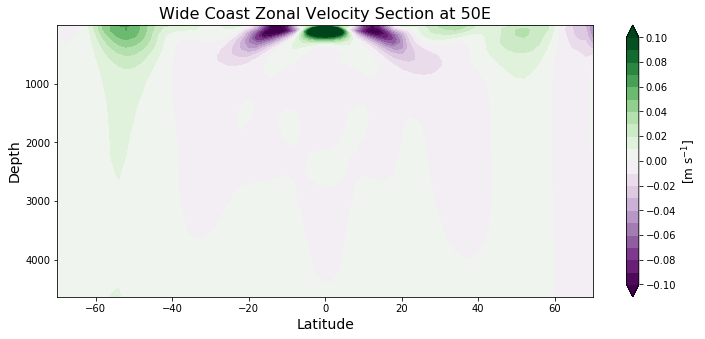

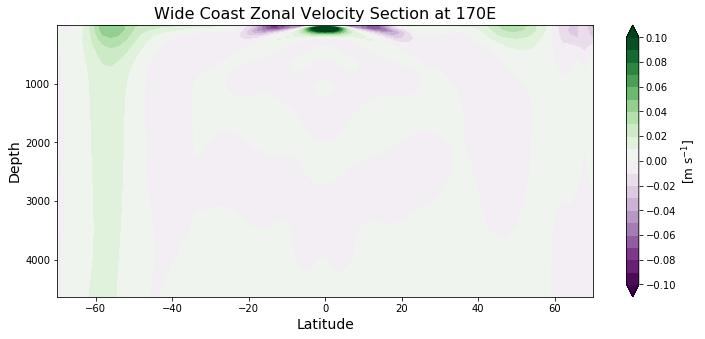

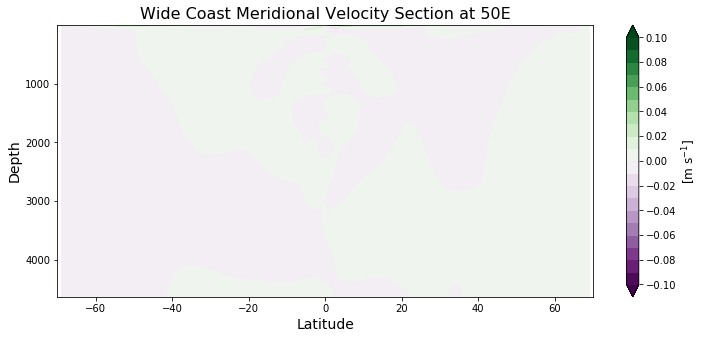

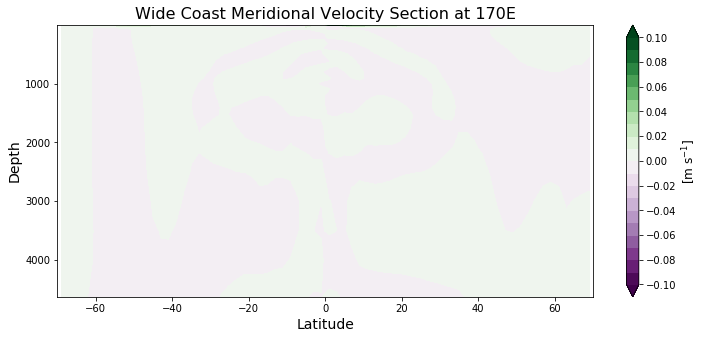

In [8]:
# These are all meridional sections for the small basin of Wide Coast

plot_salt_section(dy_wide, 50, 5000, case_wide)
plot_salt_section(dy_wide, 170, 5000, case_wide)

plot_temp_section(dy_wide, 50, 5000, case_wide)
plot_temp_section(dy_wide, 170, 5000, case_wide)

plot_density_section(dy_wide, 50, 5000, case_wide)
plot_density_section(dy_wide, 170, 5000, case_wide)

plot_u_section(dy_wide, 50, 5000, case_wide)
plot_u_section(dy_wide, 170, 5000, case_wide)

plot_v_section(dy_wide, 50, 5000, case_wide)
plot_v_section(dy_wide, 170, 5000, case_wide)


# Both Coast Sections

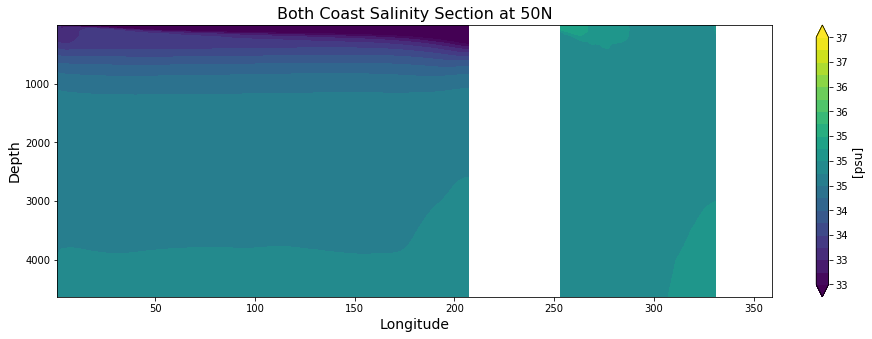

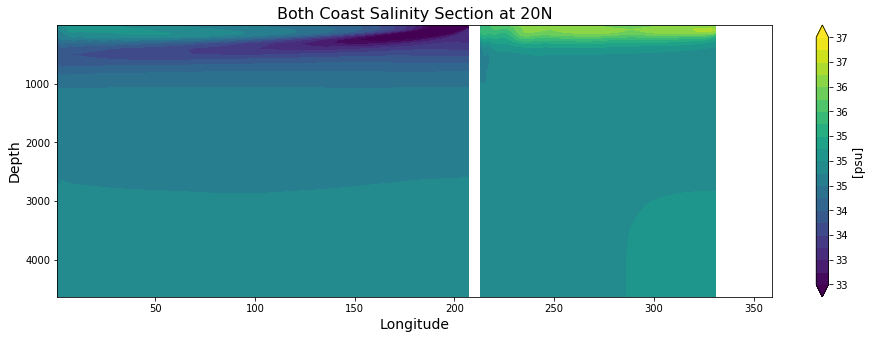

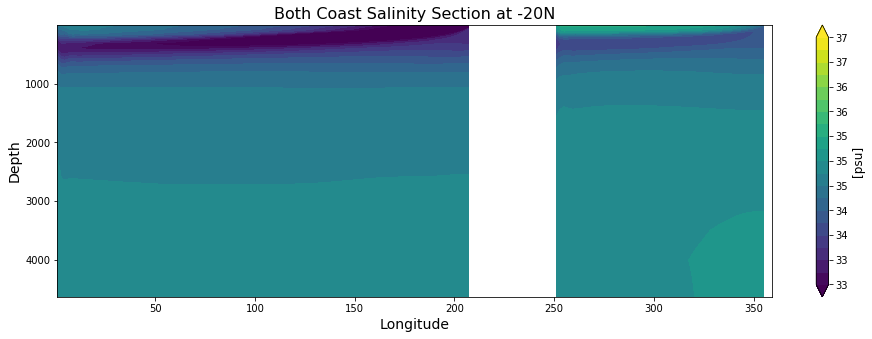

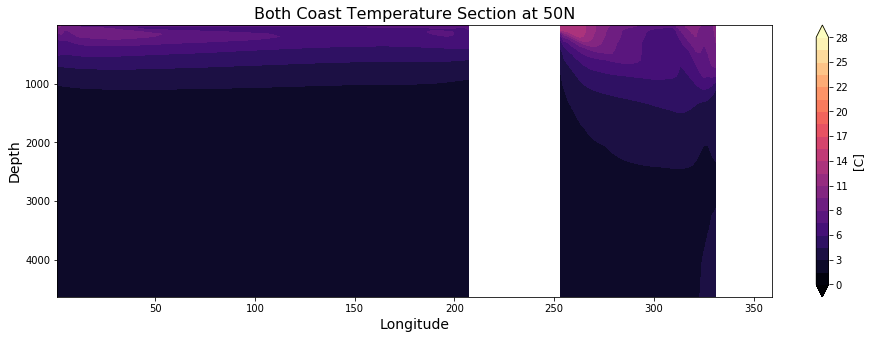

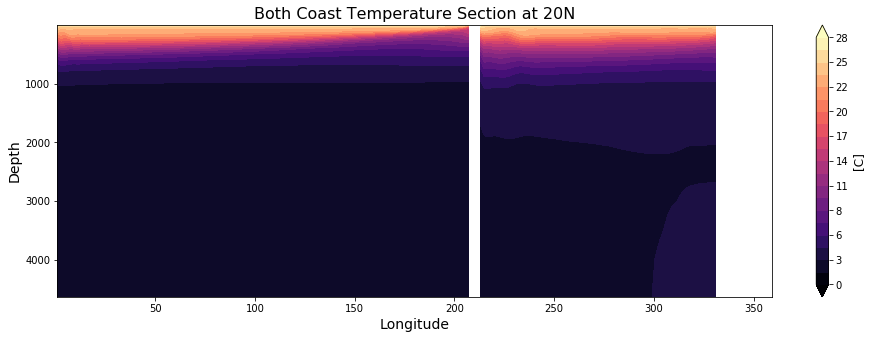

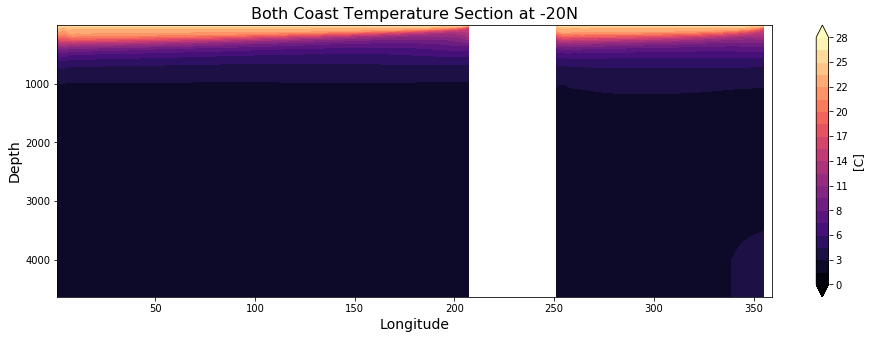

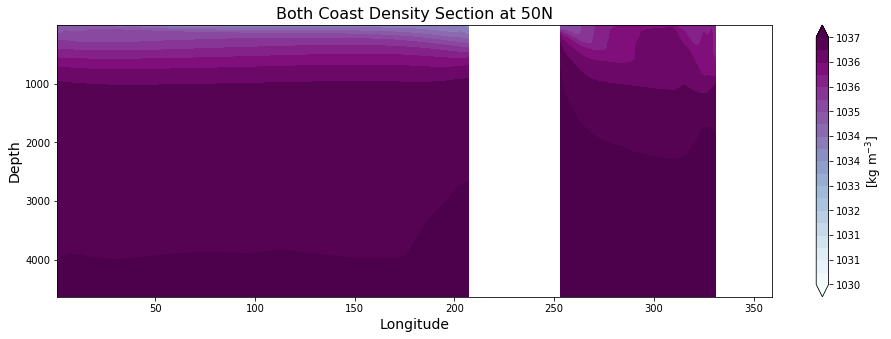

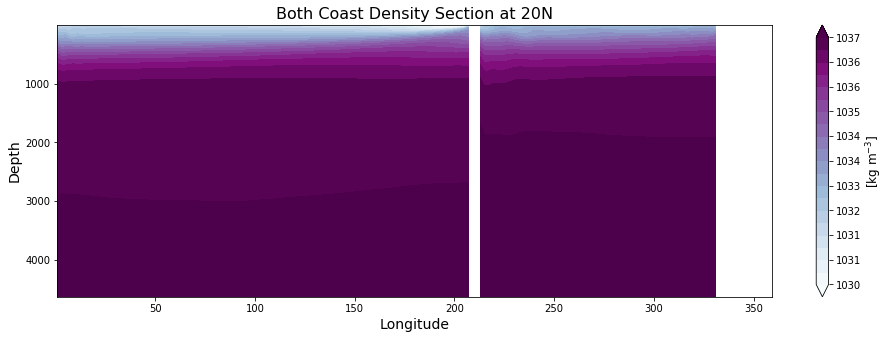

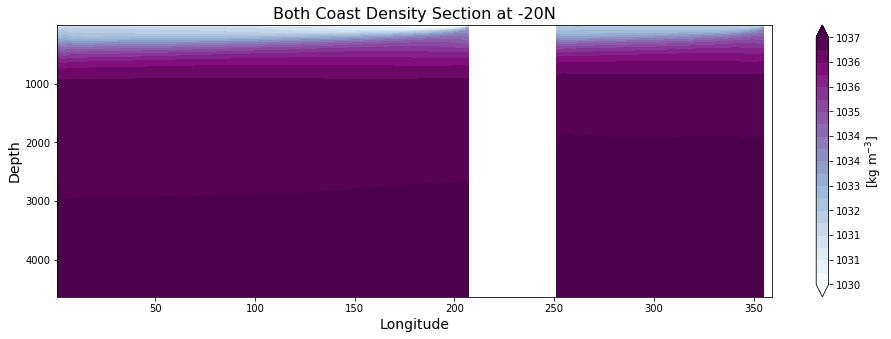

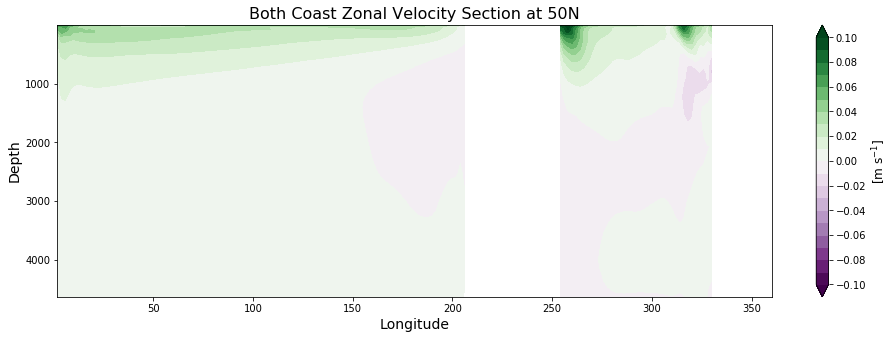

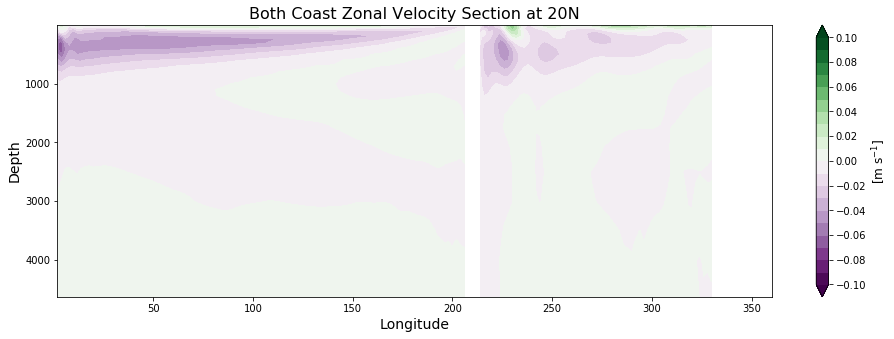

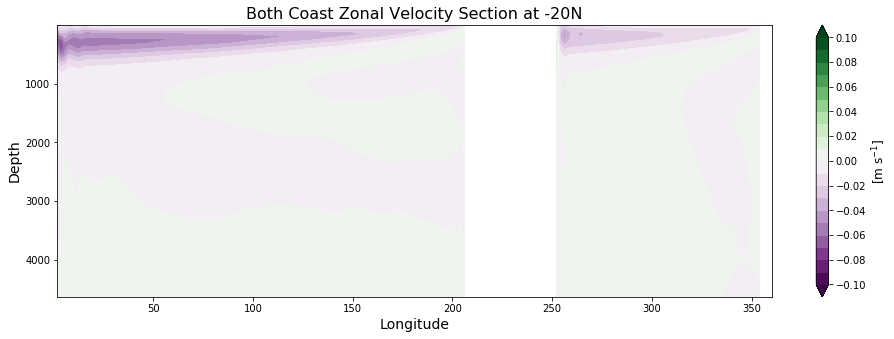

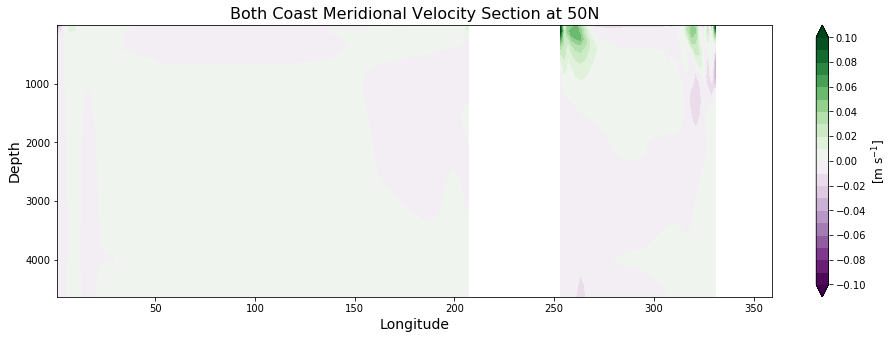

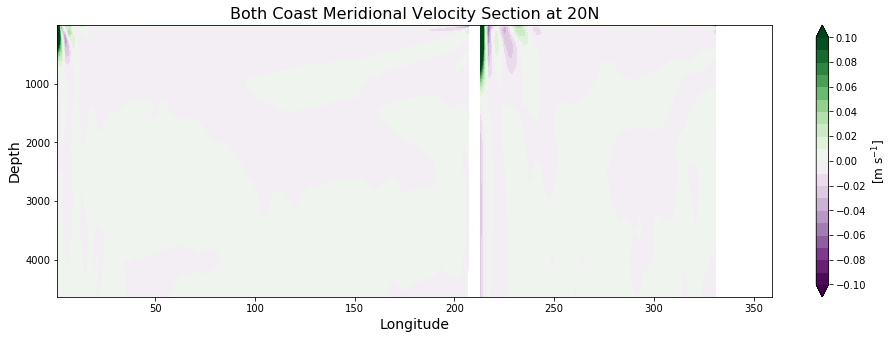

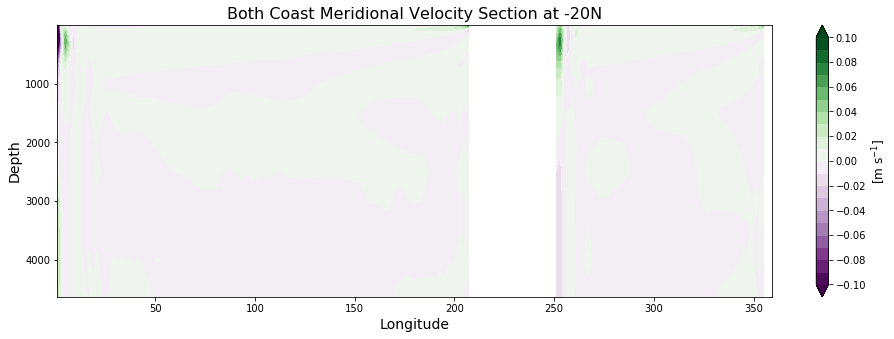

In [9]:
# Zonal Sections for Both Coast

plot_salt_section_zonal(dy_both, 50, 5000, case_both)
plot_salt_section_zonal(dy_both, 20, 5000, case_both)
plot_salt_section_zonal(dy_both, -20, 5000, case_both)

plot_temp_section_zonal(dy_both, 50, 5000, case_both)
plot_temp_section_zonal(dy_both, 20, 5000, case_both)
plot_temp_section_zonal(dy_both, -20, 5000, case_both)

plot_density_section_zonal(dy_both, 50, 5000, case_both)
plot_density_section_zonal(dy_both, 20, 5000, case_both)
plot_density_section_zonal(dy_both, -20, 5000, case_both)

plot_u_section_zonal(dy_both, 50, 5000, case_both)
plot_u_section_zonal(dy_both, 20, 5000, case_both)
plot_u_section_zonal(dy_both, -20, 5000, case_both)

plot_v_section_zonal(dy_both, 50, 5000, case_both)
plot_v_section_zonal(dy_both, 20, 5000, case_both)
plot_v_section_zonal(dy_both, -20, 5000, case_both)


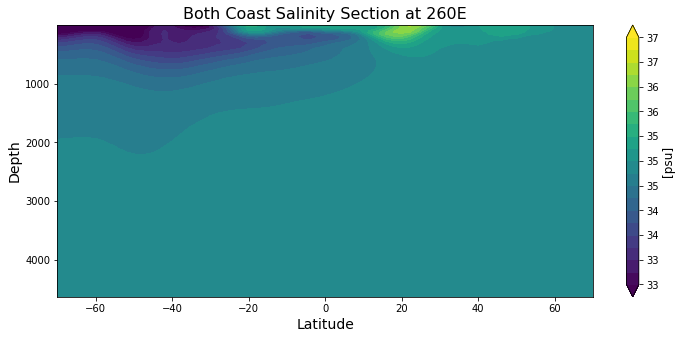

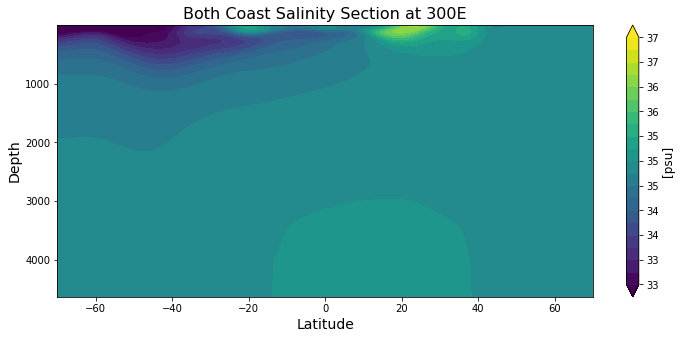

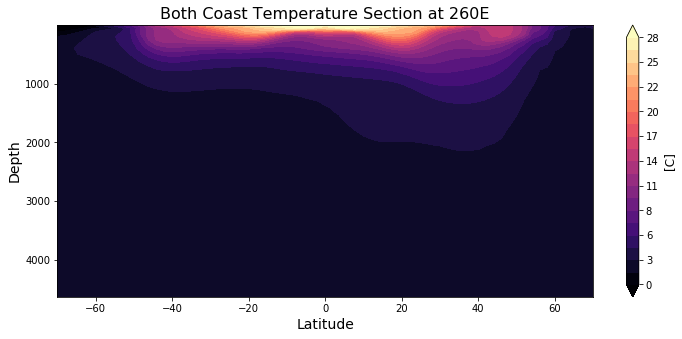

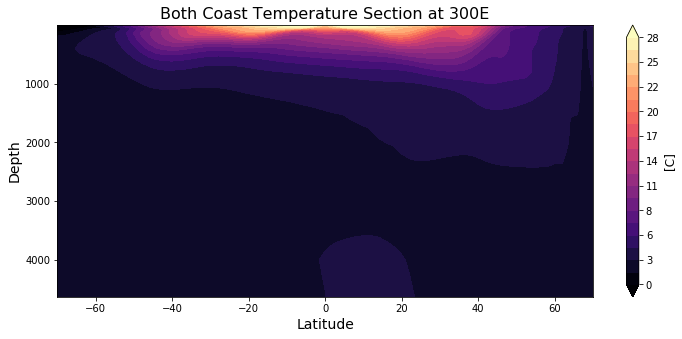

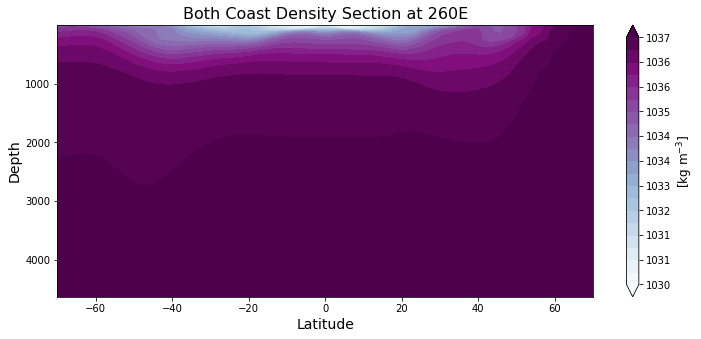

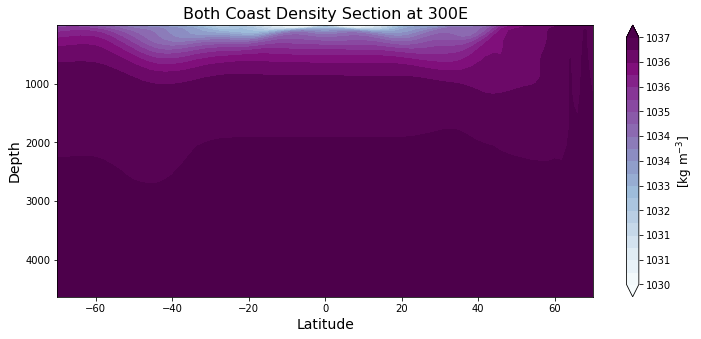

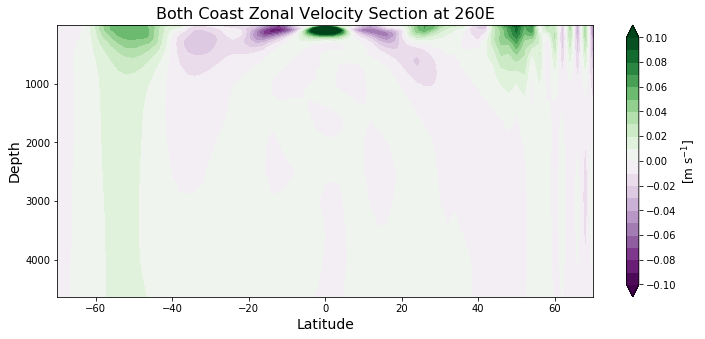

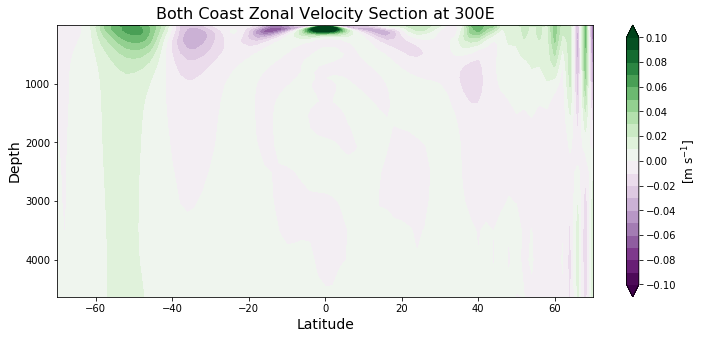

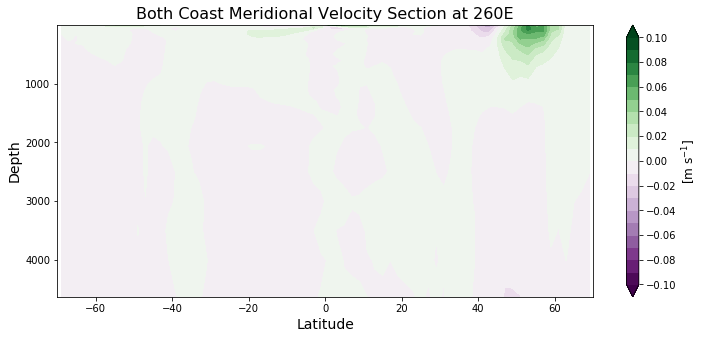

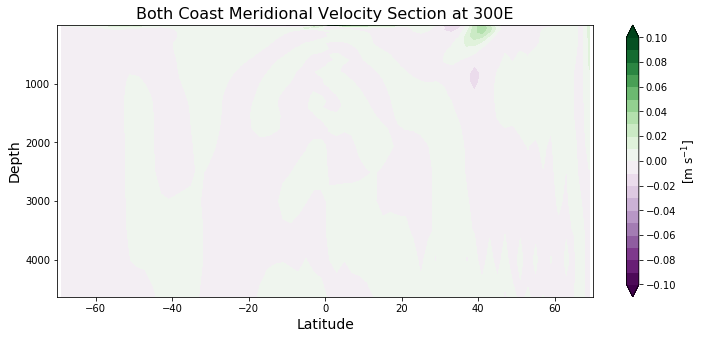

In [10]:
# Meridional sections for the small basin of Both Coast

plot_salt_section(dy_both, 260, 5000, case_both)
plot_salt_section(dy_both, 300, 5000, case_both)

plot_temp_section(dy_both, 260, 5000, case_both)
plot_temp_section(dy_both, 300, 5000, case_both)

plot_density_section(dy_both, 260, 5000, case_both)
plot_density_section(dy_both, 300, 5000, case_both)

plot_u_section(dy_both, 260, 5000, case_both)
plot_u_section(dy_both, 300, 5000, case_both)

plot_v_section(dy_both, 260, 5000, case_both)
plot_v_section(dy_both, 300, 5000, case_both)


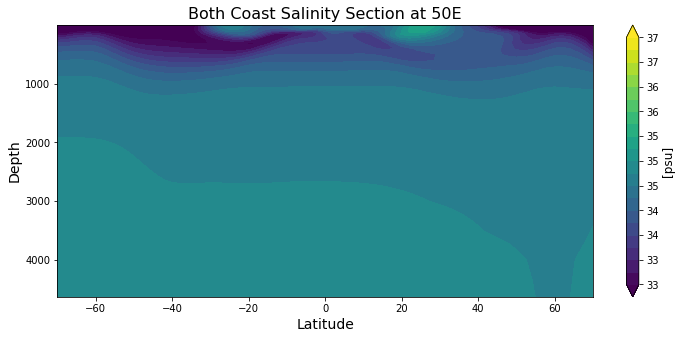

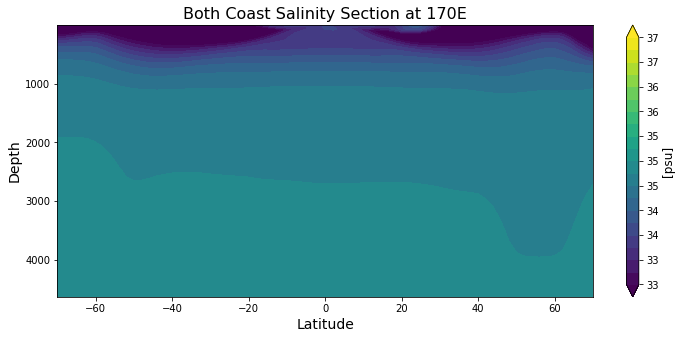

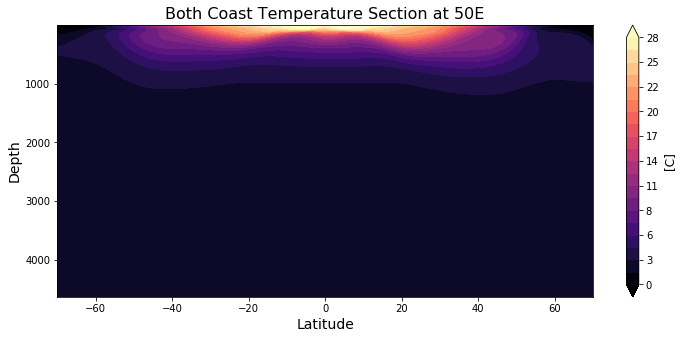

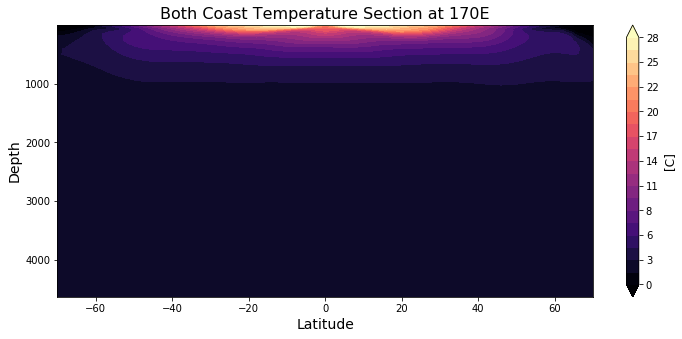

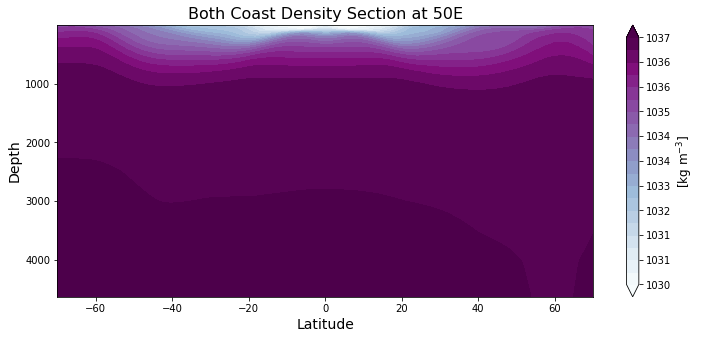

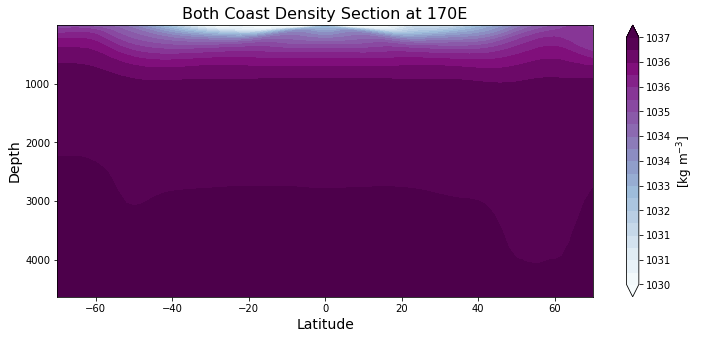

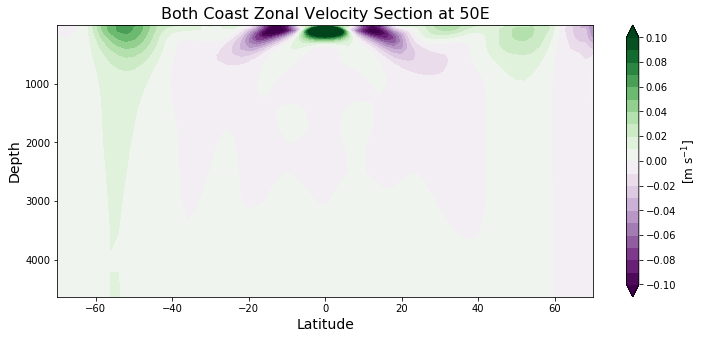

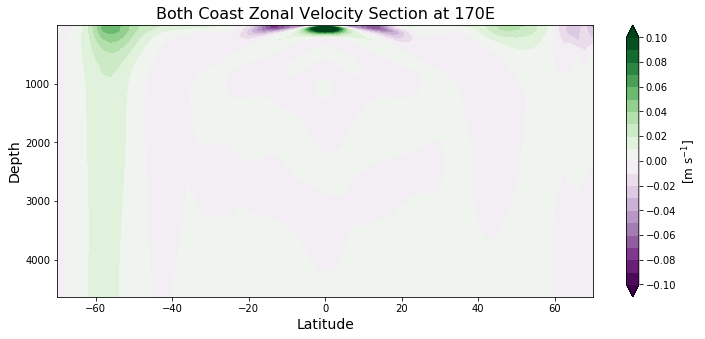

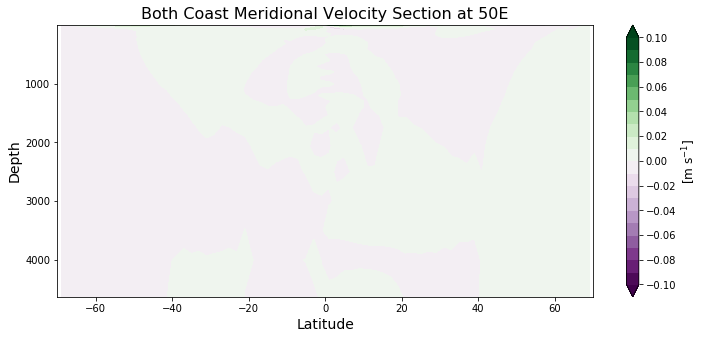

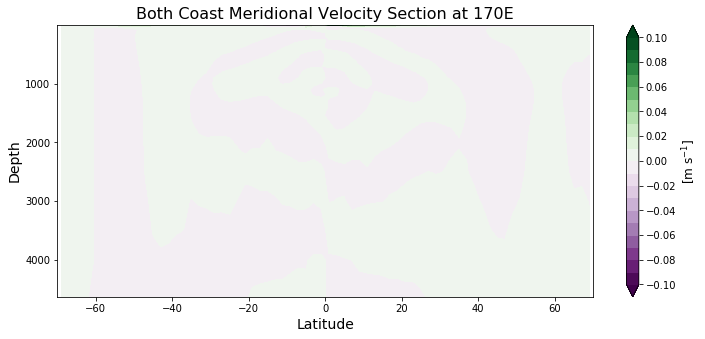

In [11]:
# Meridional sections for the Both Coast large basin

plot_salt_section(dy_both, 50, 5000, case_both)
plot_salt_section(dy_both, 170, 5000, case_both)

plot_temp_section(dy_both, 50, 5000, case_both)
plot_temp_section(dy_both, 170, 5000, case_both)

plot_density_section(dy_both, 50, 5000, case_both)
plot_density_section(dy_both, 170, 5000, case_both)

plot_u_section(dy_both, 50, 5000, case_both)
plot_u_section(dy_both, 170, 5000, case_both)

plot_v_section(dy_both, 50, 5000, case_both)
plot_v_section(dy_both, 170, 5000, case_both)

# America Coast Sections

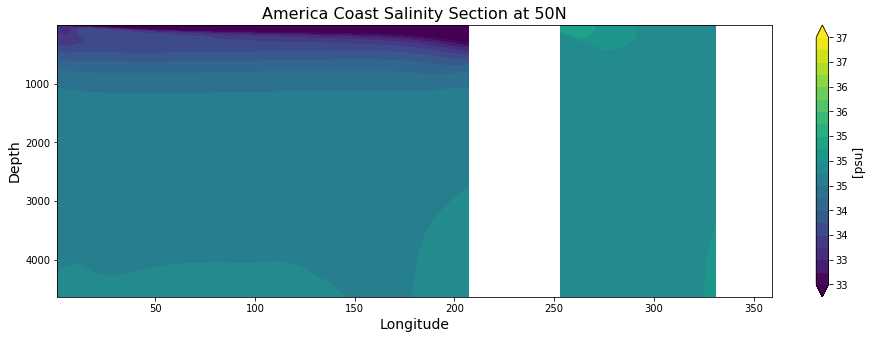

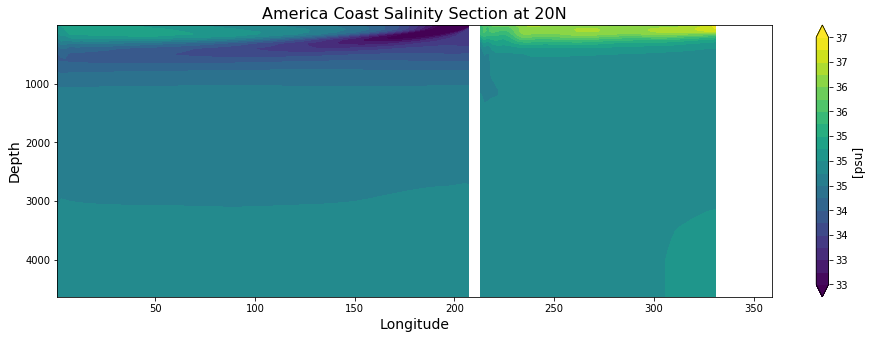

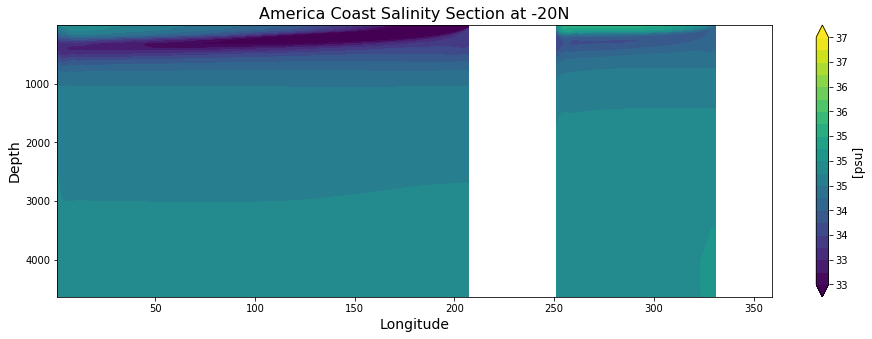

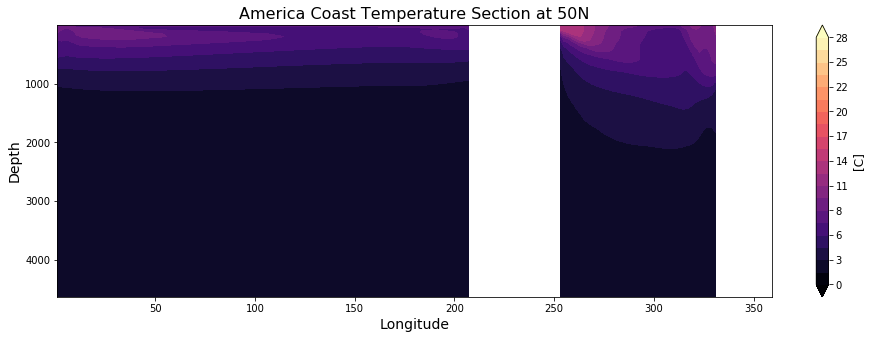

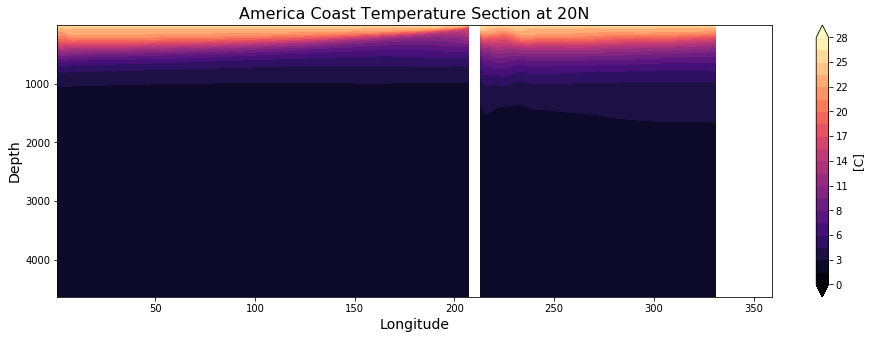

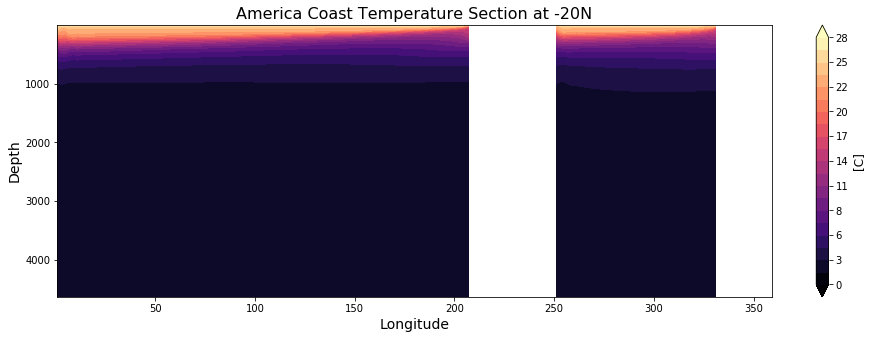

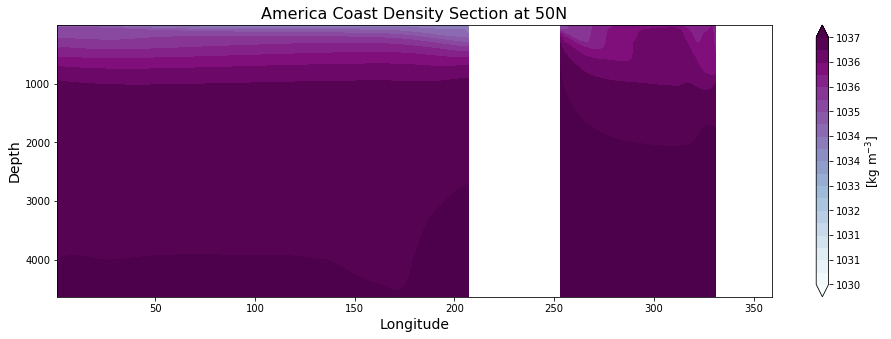

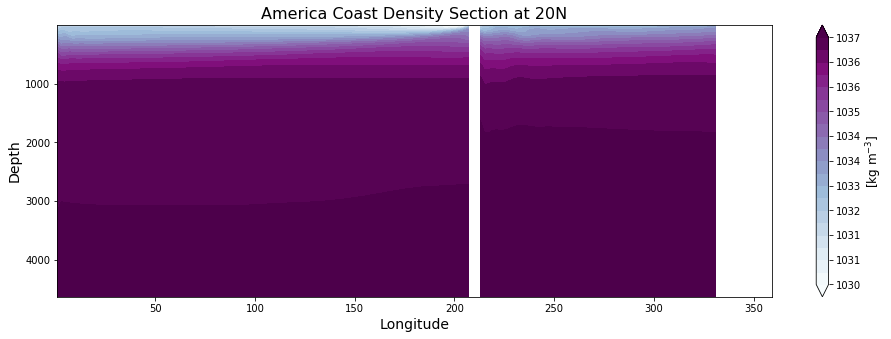

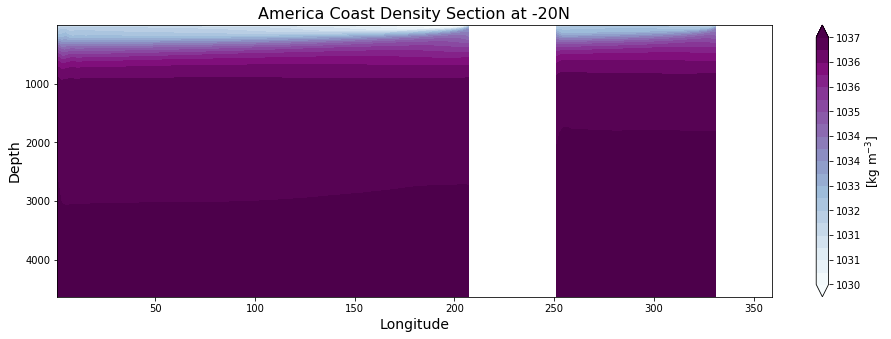

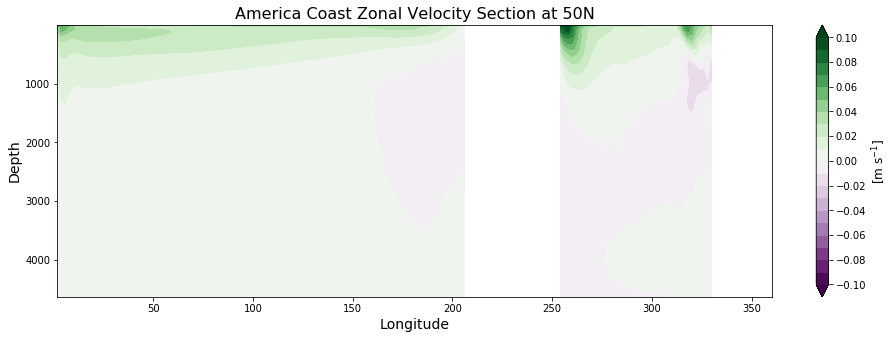

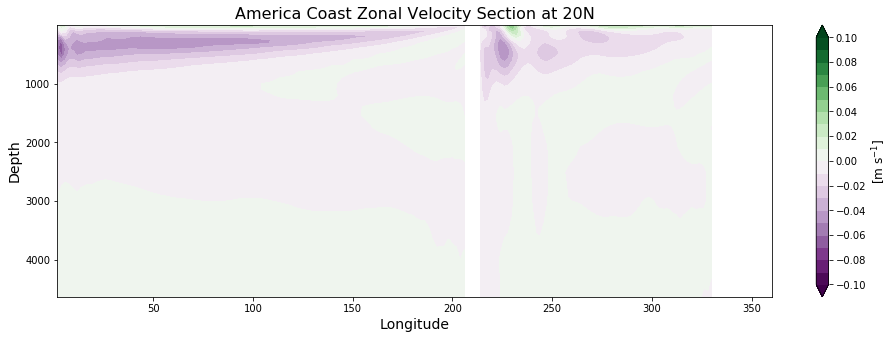

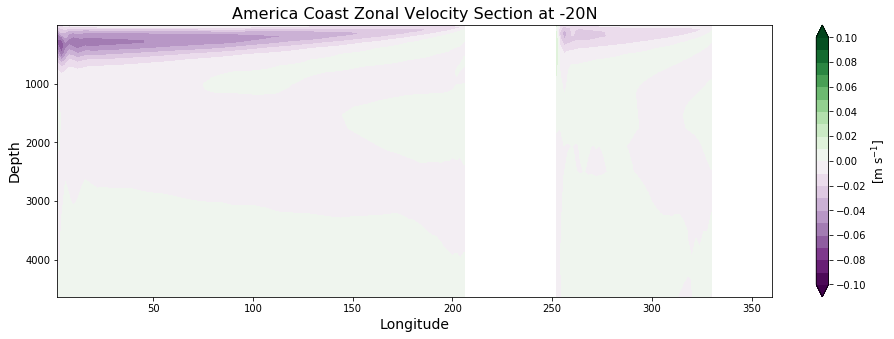

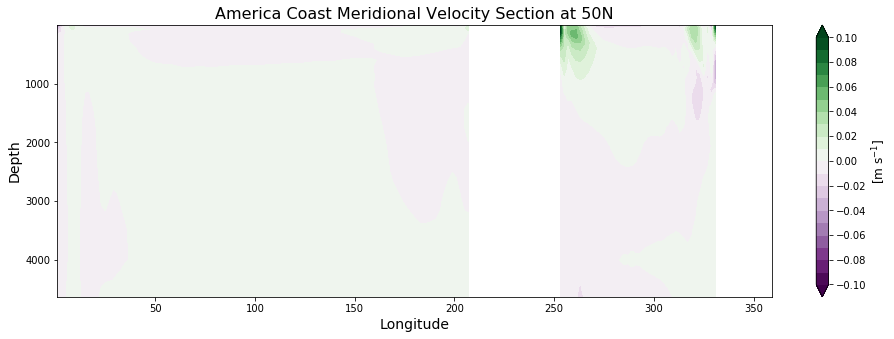

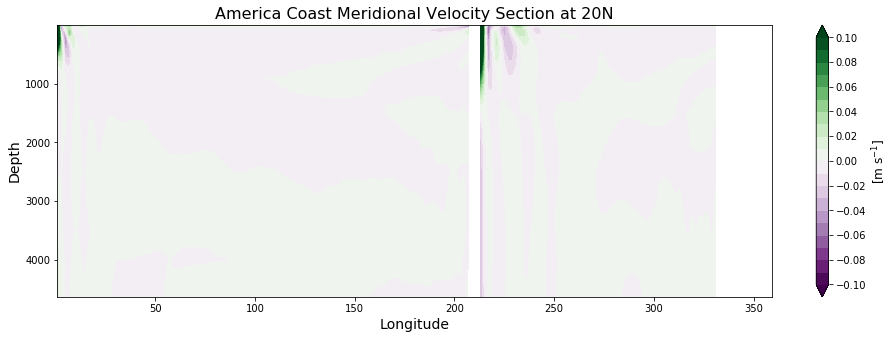

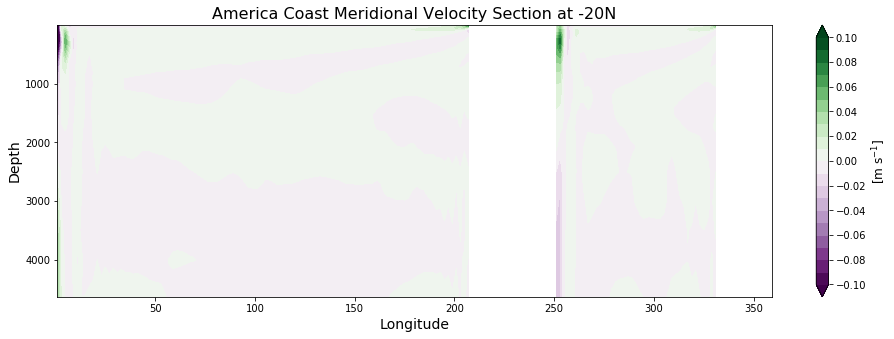

In [12]:
# Zonal sections America Coast

plot_salt_section_zonal(dy_am, 50, 5000, case_am)
plot_salt_section_zonal(dy_am, 20, 5000, case_am)
plot_salt_section_zonal(dy_am, -20, 5000, case_am)

plot_temp_section_zonal(dy_am, 50, 5000, case_am)
plot_temp_section_zonal(dy_am, 20, 5000, case_am)
plot_temp_section_zonal(dy_am, -20, 5000, case_am)

plot_density_section_zonal(dy_am, 50, 5000, case_am)
plot_density_section_zonal(dy_am, 20, 5000, case_am)
plot_density_section_zonal(dy_am, -20, 5000, case_am)

plot_u_section_zonal(dy_am, 50, 5000, case_am)
plot_u_section_zonal(dy_am, 20, 5000, case_am)
plot_u_section_zonal(dy_am, -20, 5000, case_am)

plot_v_section_zonal(dy_am, 50, 5000, case_am)
plot_v_section_zonal(dy_am, 20, 5000, case_am)
plot_v_section_zonal(dy_am, -20, 5000, case_am)

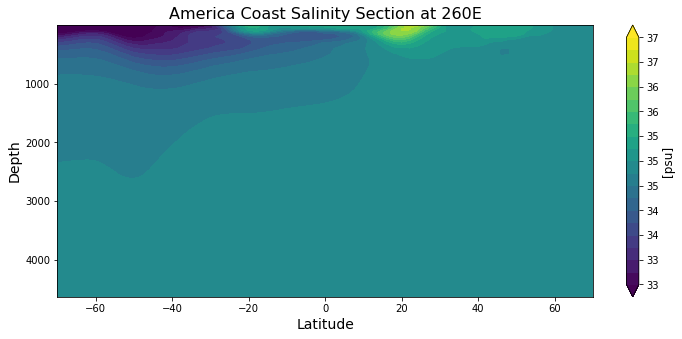

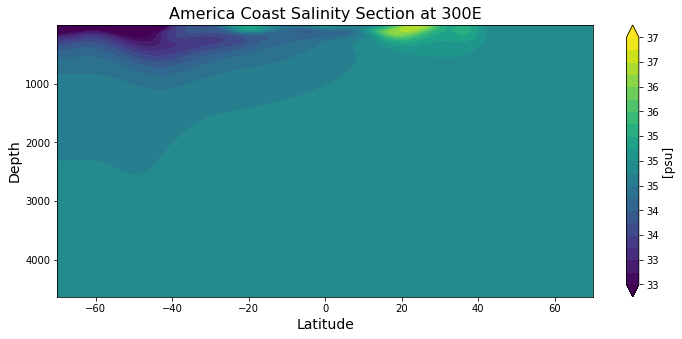

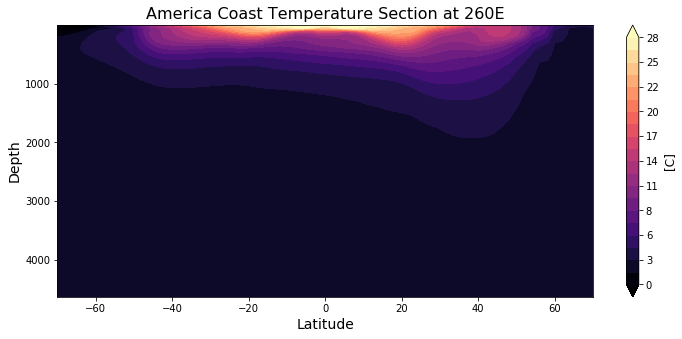

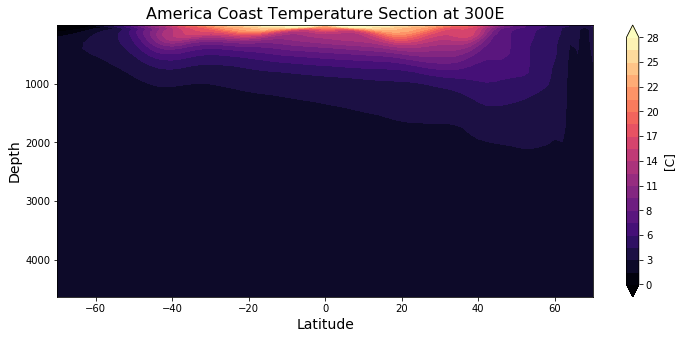

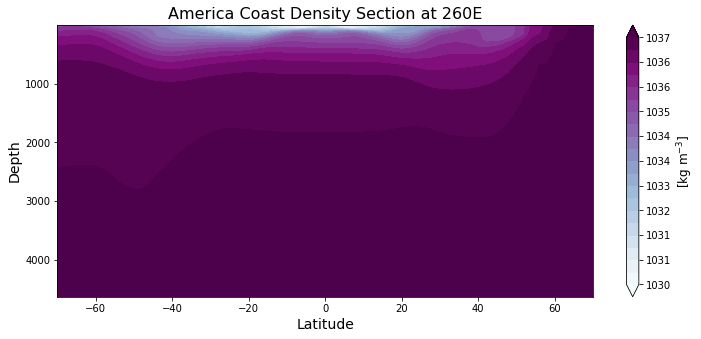

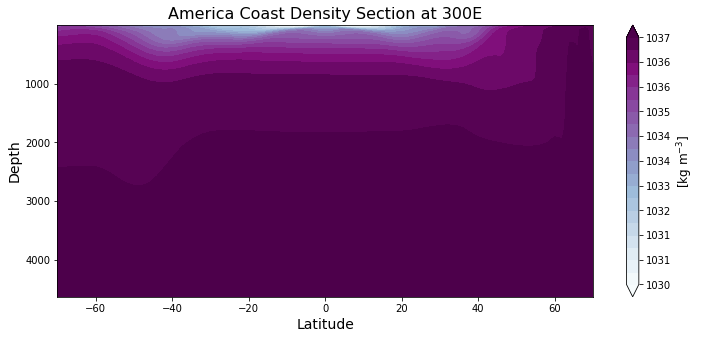

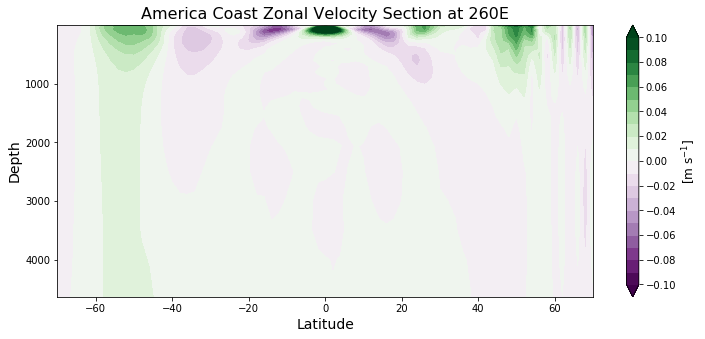

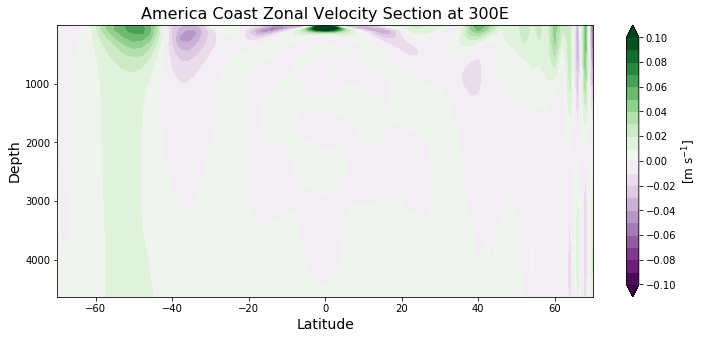

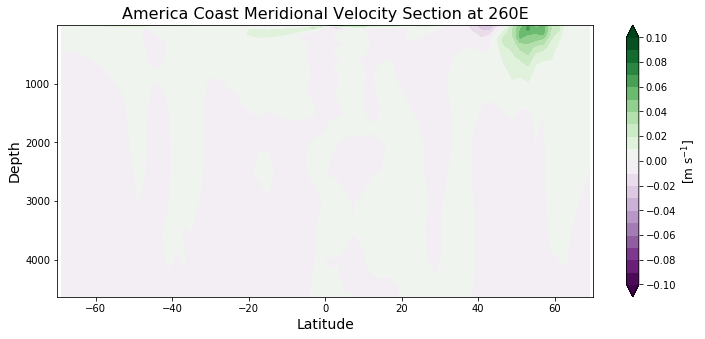

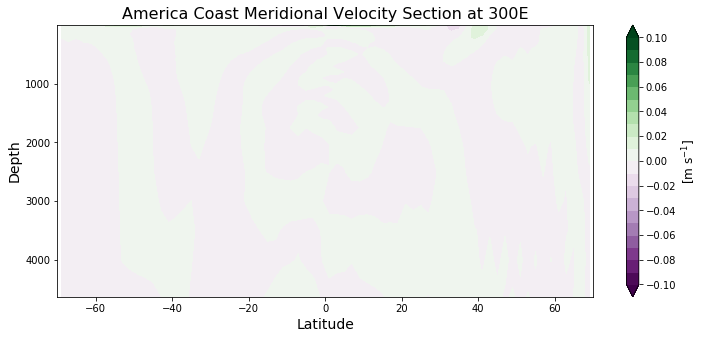

In [13]:
# Meridional sections for the America Coast small basin

plot_salt_section(dy_am, 260, 5000, case_am)
plot_salt_section(dy_am, 300, 5000, case_am)

plot_temp_section(dy_am, 260, 5000, case_am)
plot_temp_section(dy_am, 300, 5000, case_am)

plot_density_section(dy_am, 260, 5000, case_am)
plot_density_section(dy_am, 300, 5000, case_am)

plot_u_section(dy_am, 260, 5000, case_am)
plot_u_section(dy_am, 300, 5000, case_am)

plot_v_section(dy_am, 260, 5000, case_am)
plot_v_section(dy_am, 300, 5000, case_am)

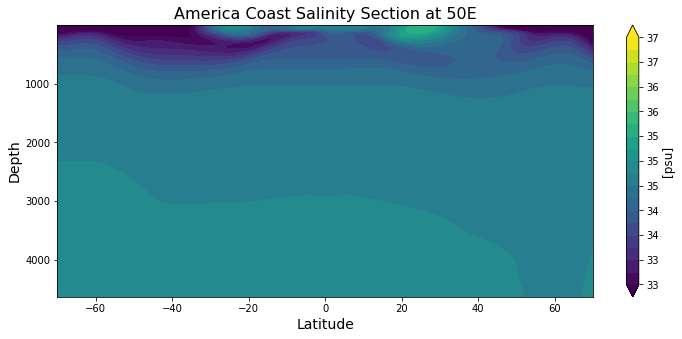

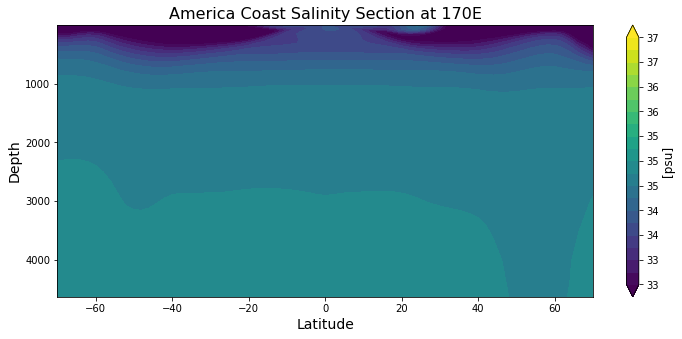

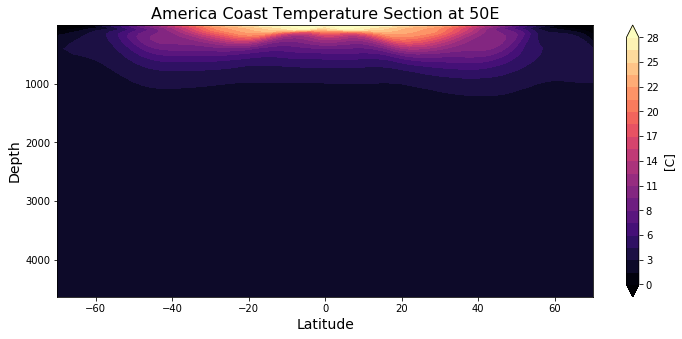

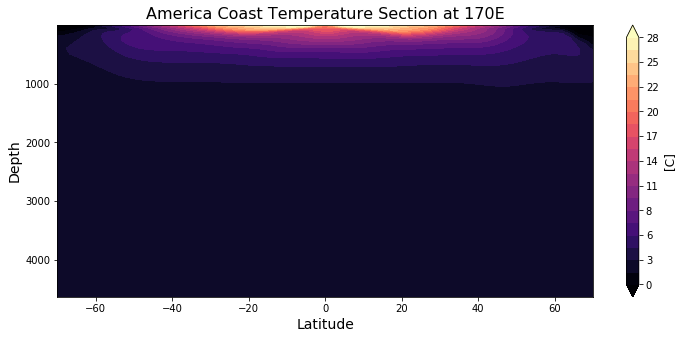

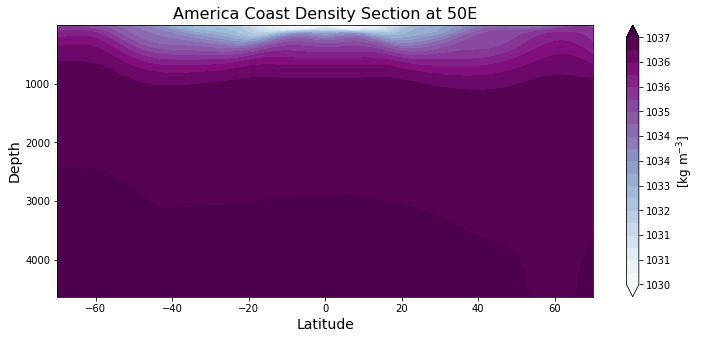

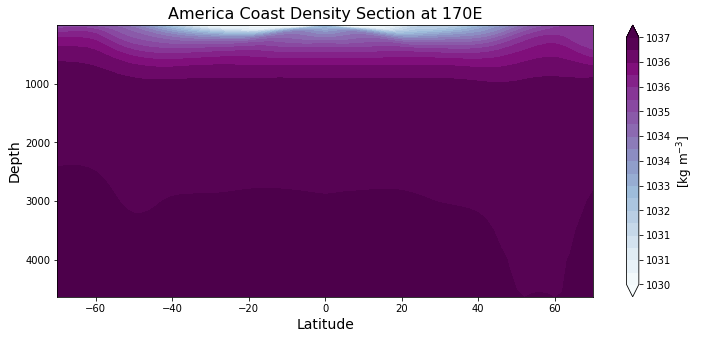

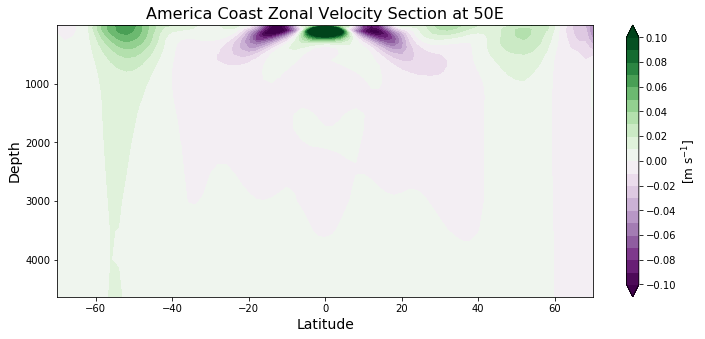

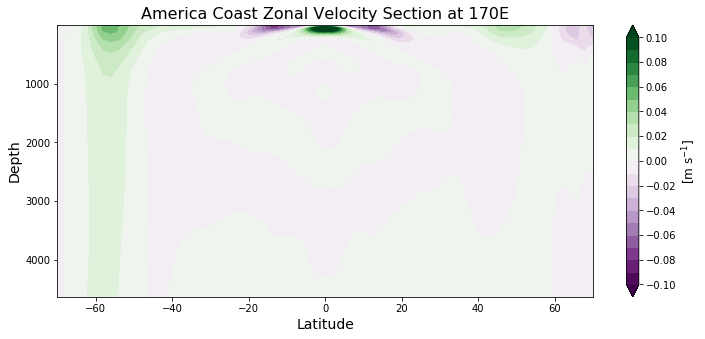

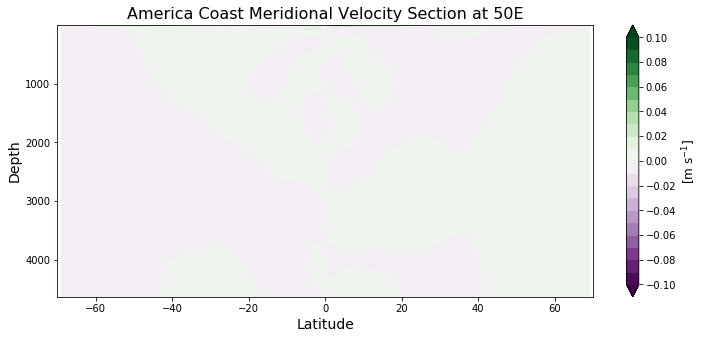

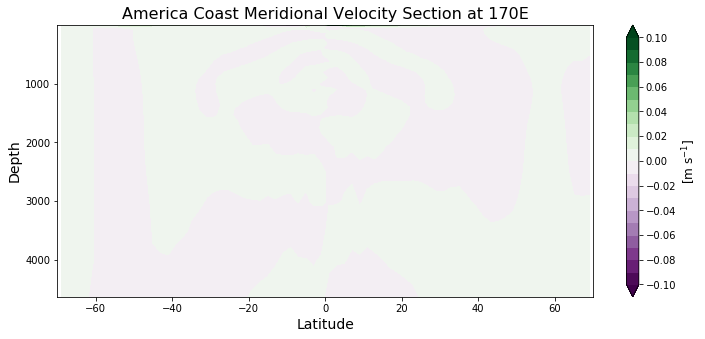

In [14]:
# Meridional sections for the America Coast large basin

plot_salt_section(dy_am, 50, 5000, case_am)
plot_salt_section(dy_am, 170, 5000, case_am)

plot_temp_section(dy_am, 50, 5000, case_am)
plot_temp_section(dy_am, 170, 5000, case_am)

plot_density_section(dy_am, 50, 5000, case_am)
plot_density_section(dy_am, 170, 5000, case_am)

plot_u_section(dy_am, 50, 5000, case_am)
plot_u_section(dy_am, 170, 5000, case_am)

plot_v_section(dy_am, 50, 5000, case_am)
plot_v_section(dy_am, 170, 5000, case_am)

# Africa Coast Sections

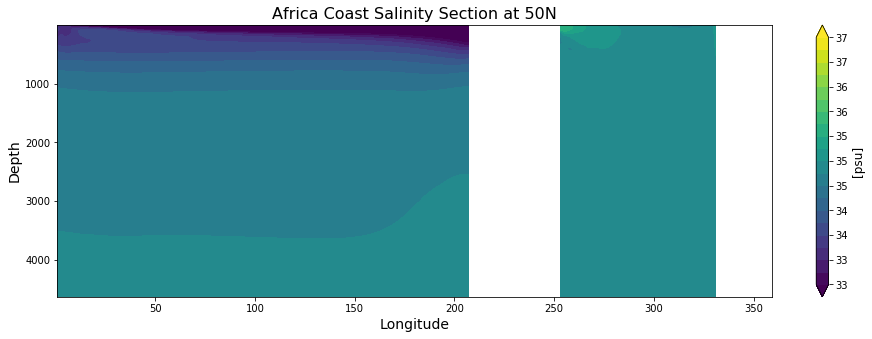

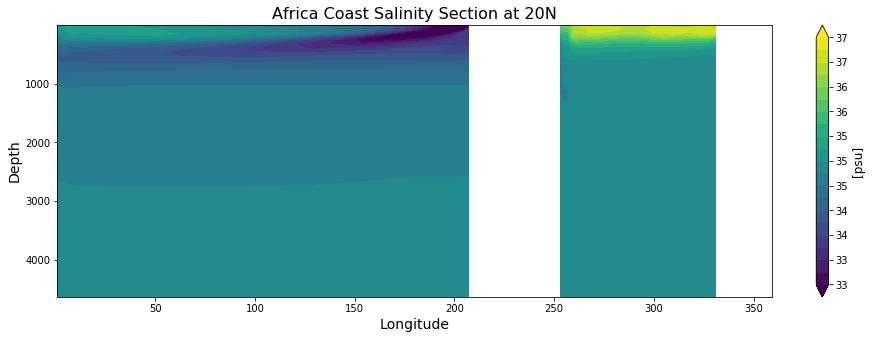

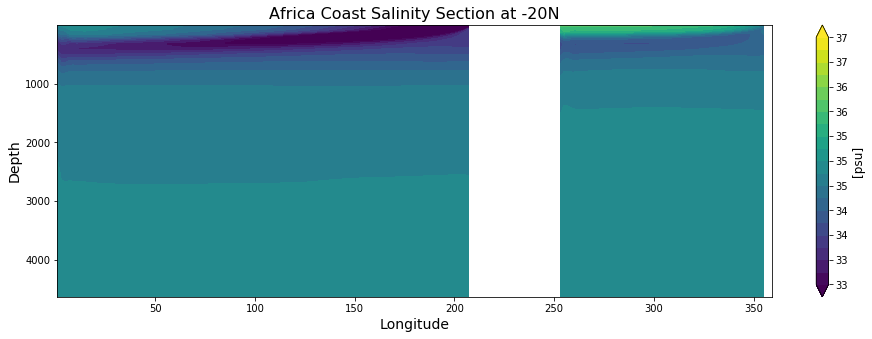

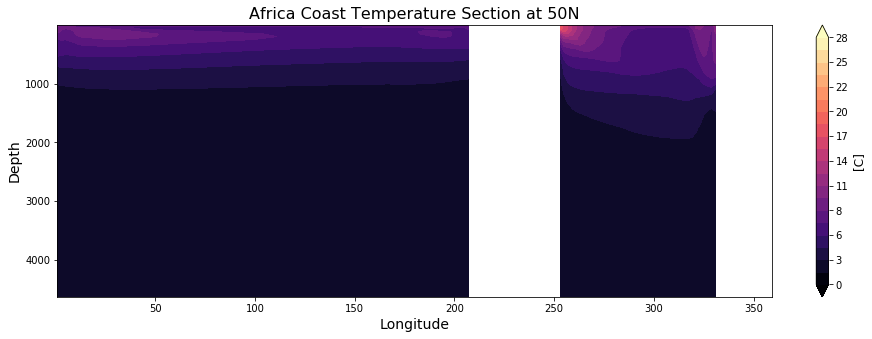

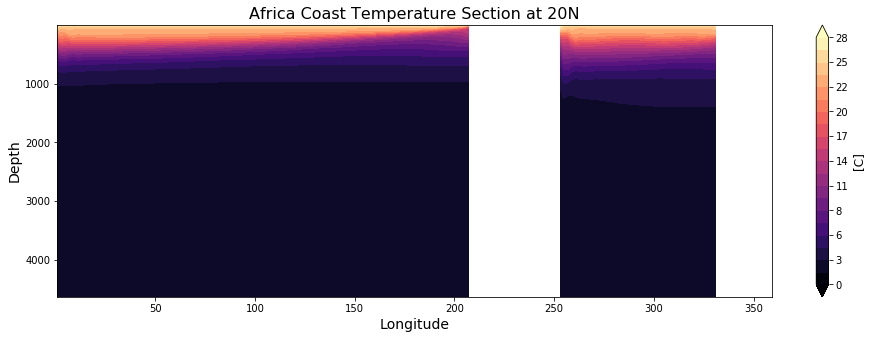

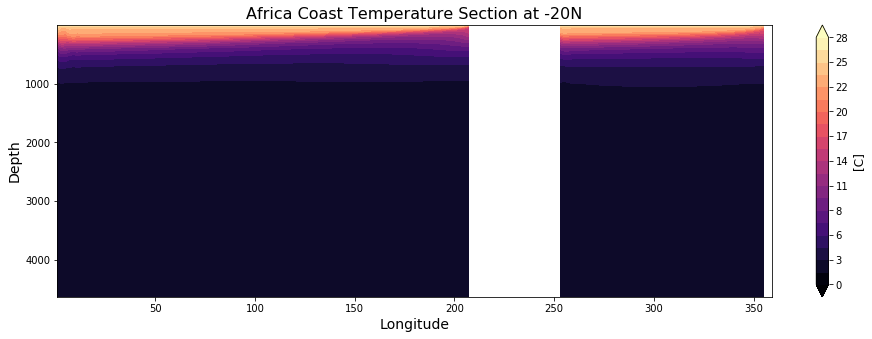

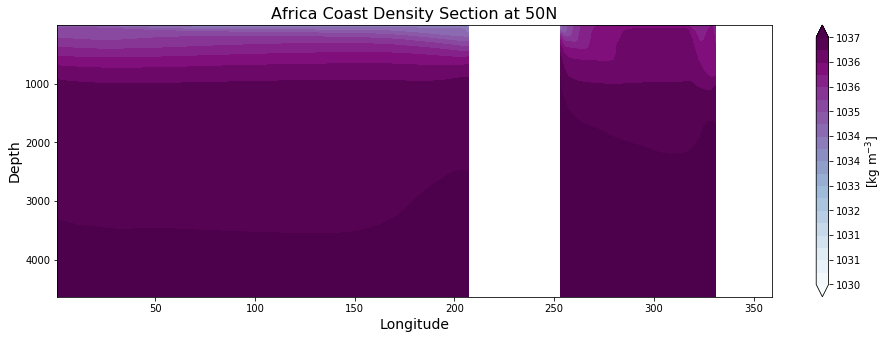

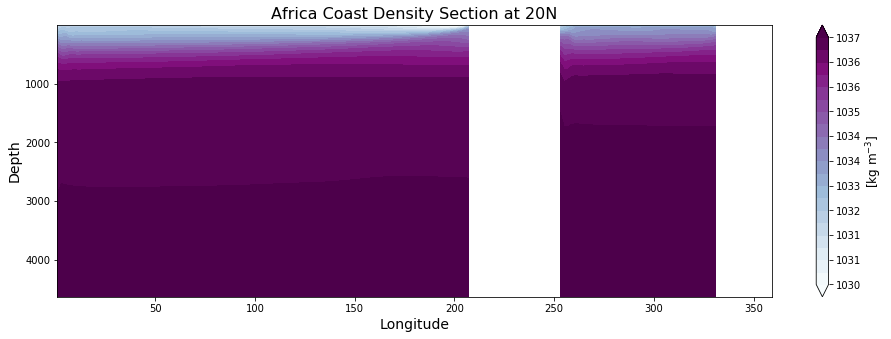

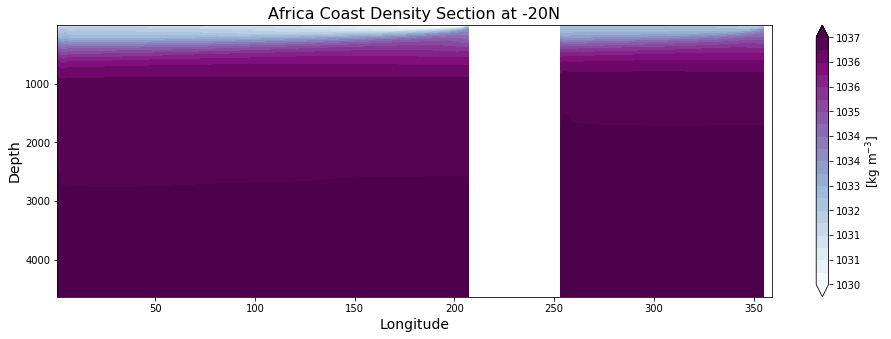

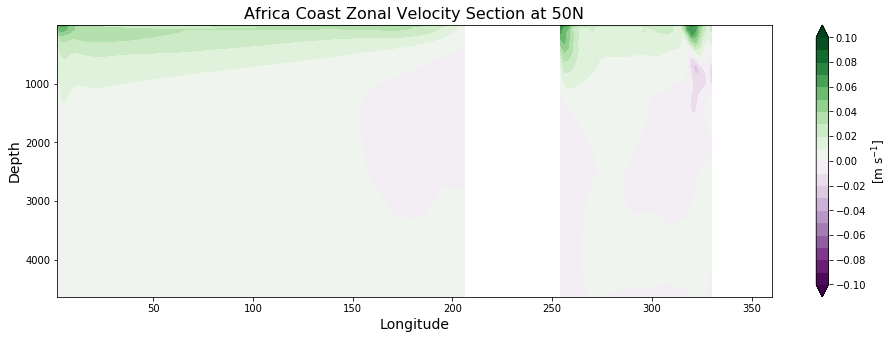

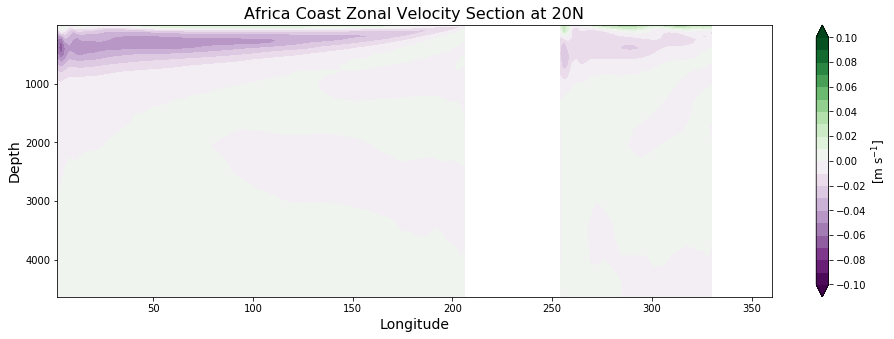

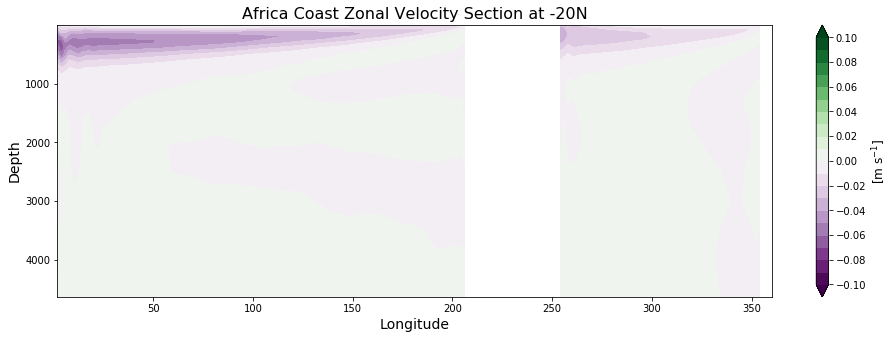

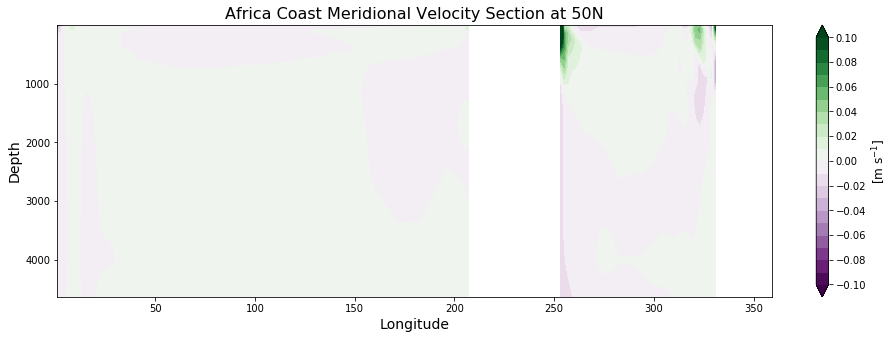

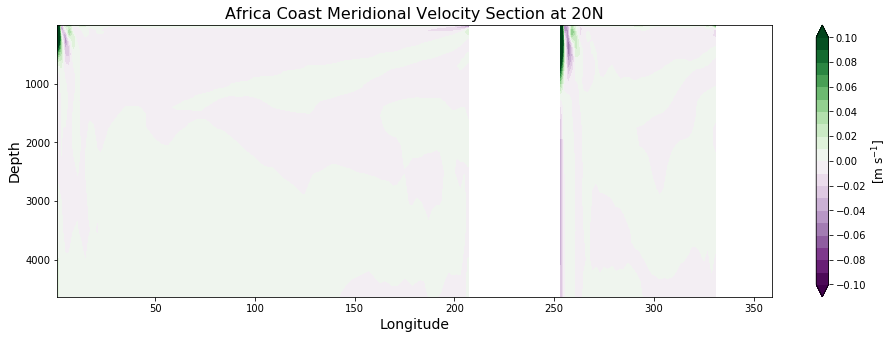

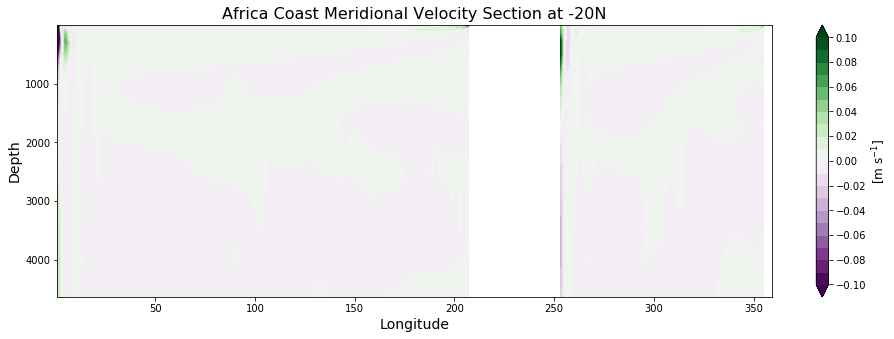

In [15]:
# Zonal sections Africa Coast

plot_salt_section_zonal(dy_af, 50, 5000, case_af)
plot_salt_section_zonal(dy_af, 20, 5000, case_af)
plot_salt_section_zonal(dy_af, -20, 5000, case_af)

plot_temp_section_zonal(dy_af, 50, 5000, case_af)
plot_temp_section_zonal(dy_af, 20, 5000, case_af)
plot_temp_section_zonal(dy_af, -20, 5000, case_af)

plot_density_section_zonal(dy_af, 50, 5000, case_af)
plot_density_section_zonal(dy_af, 20, 5000, case_af)
plot_density_section_zonal(dy_af, -20, 5000, case_af)

plot_u_section_zonal(dy_af, 50, 5000, case_af)
plot_u_section_zonal(dy_af, 20, 5000, case_af)
plot_u_section_zonal(dy_af, -20, 5000, case_af)

plot_v_section_zonal(dy_af, 50, 5000, case_af)
plot_v_section_zonal(dy_af, 20, 5000, case_af)
plot_v_section_zonal(dy_af, -20, 5000, case_af)

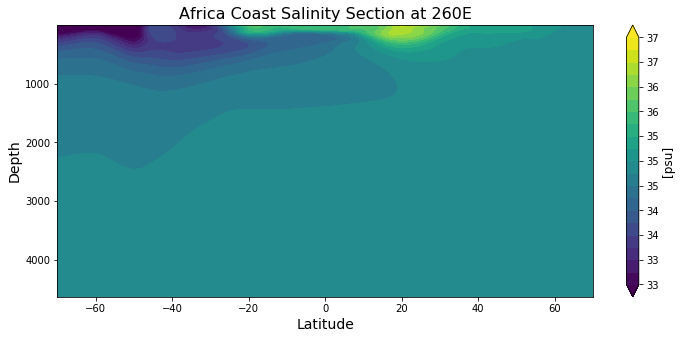

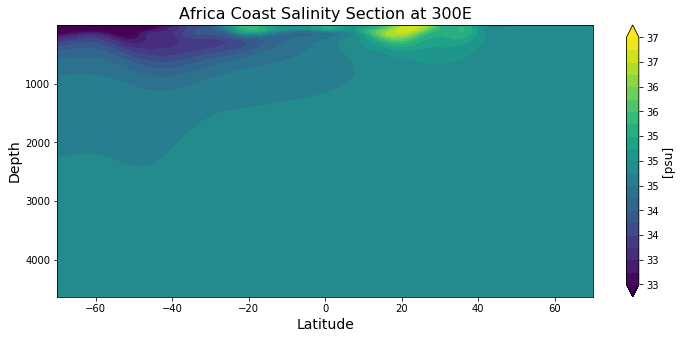

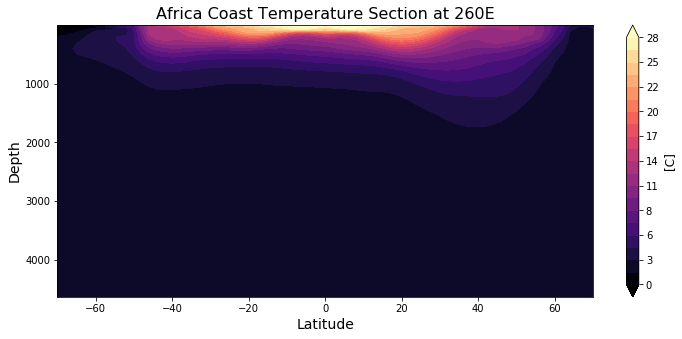

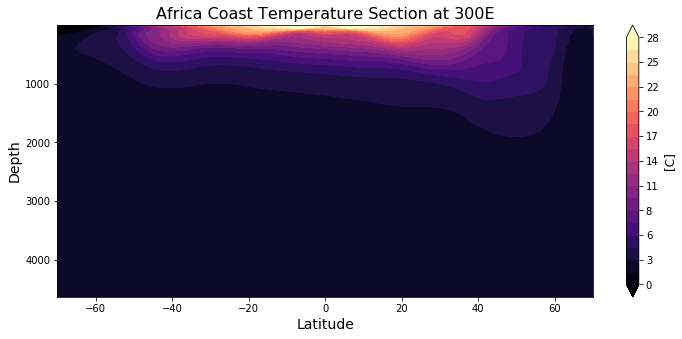

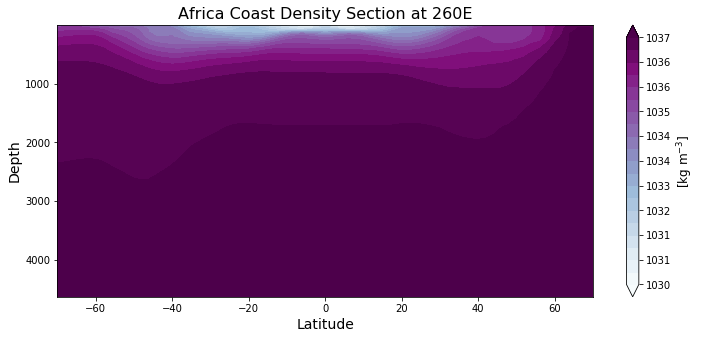

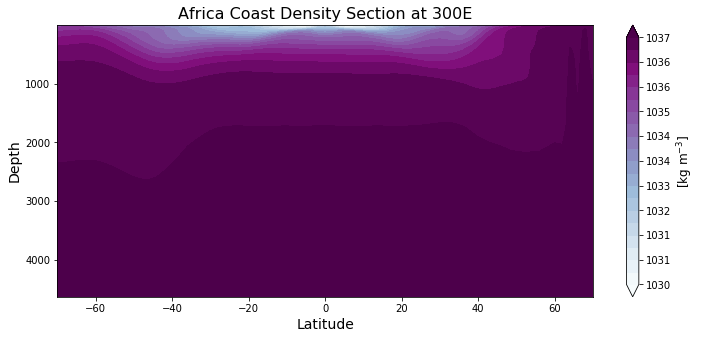

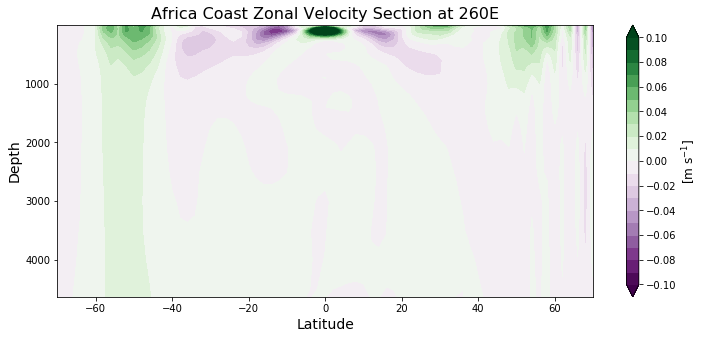

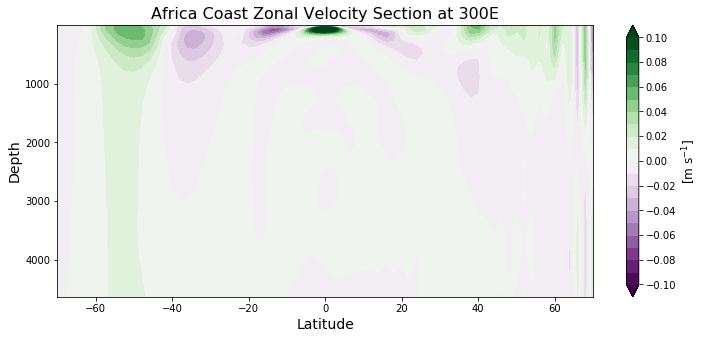

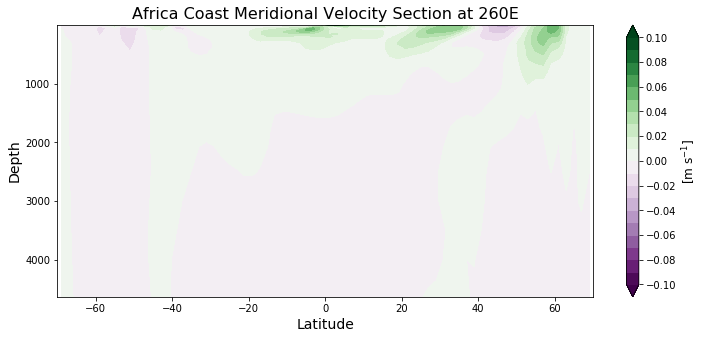

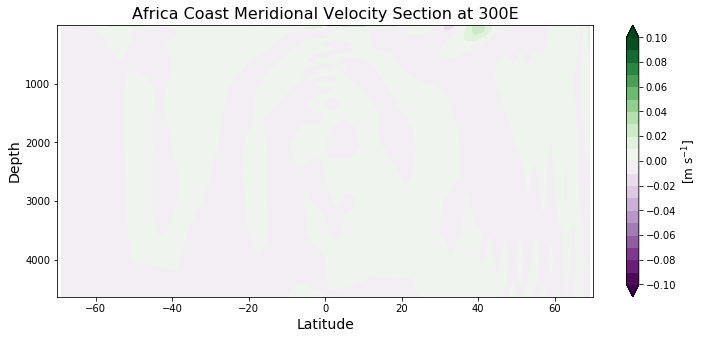

In [16]:
# Meridional sections for the Africa Coast small basin

plot_salt_section(dy_af, 260, 5000, case_af)
plot_salt_section(dy_af, 300, 5000, case_af)

plot_temp_section(dy_af, 260, 5000, case_af)
plot_temp_section(dy_af, 300, 5000, case_af)

plot_density_section(dy_af, 260, 5000, case_af)
plot_density_section(dy_af, 300, 5000, case_af)

plot_u_section(dy_af, 260, 5000, case_af)
plot_u_section(dy_af, 300, 5000, case_af)

plot_v_section(dy_af, 260, 5000, case_af)
plot_v_section(dy_af, 300, 5000, case_af)

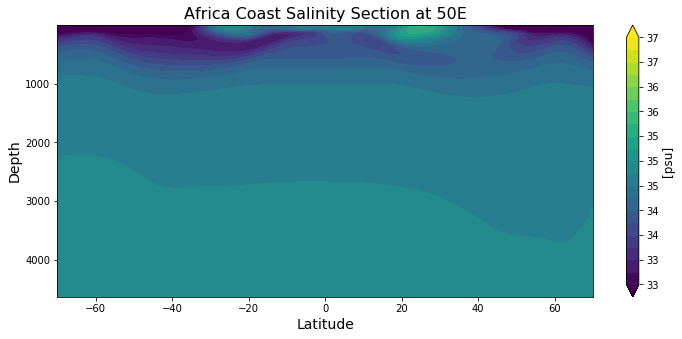

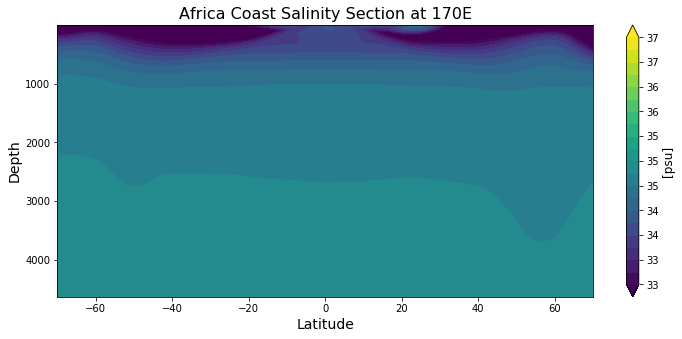

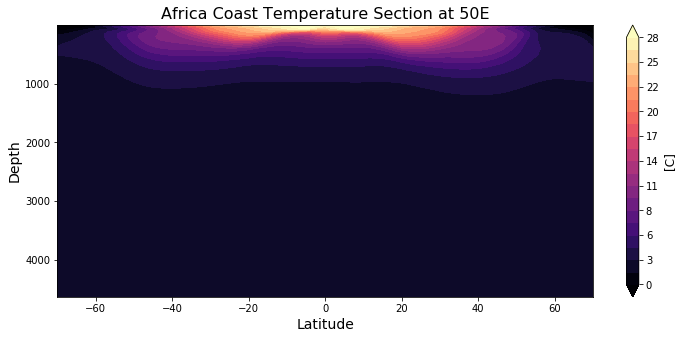

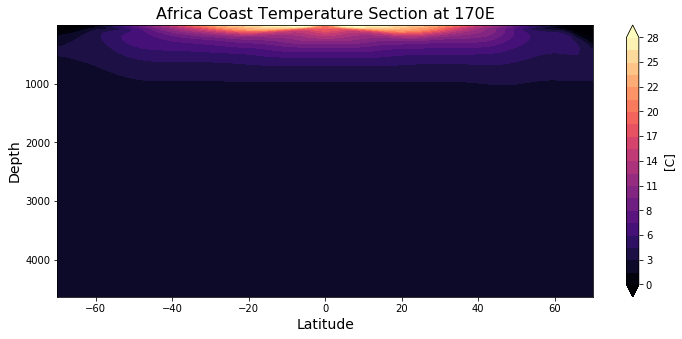

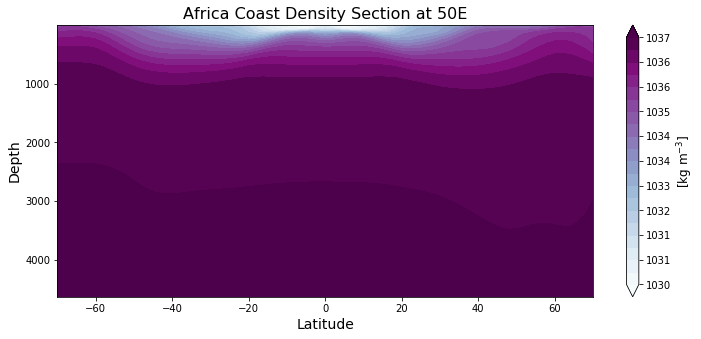

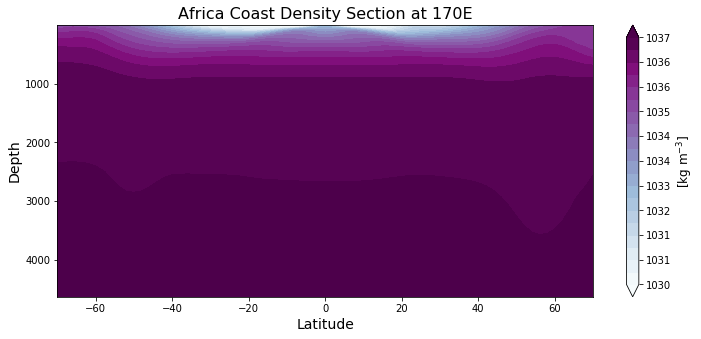

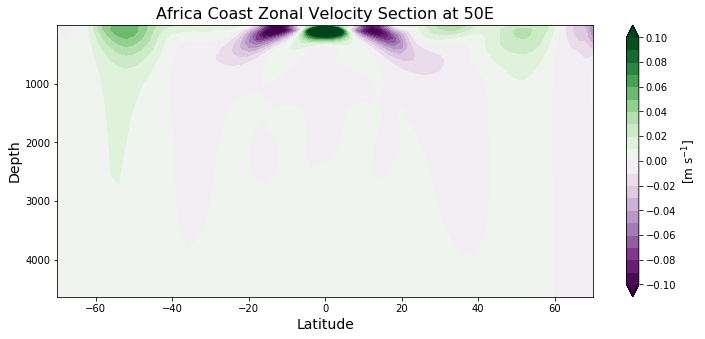

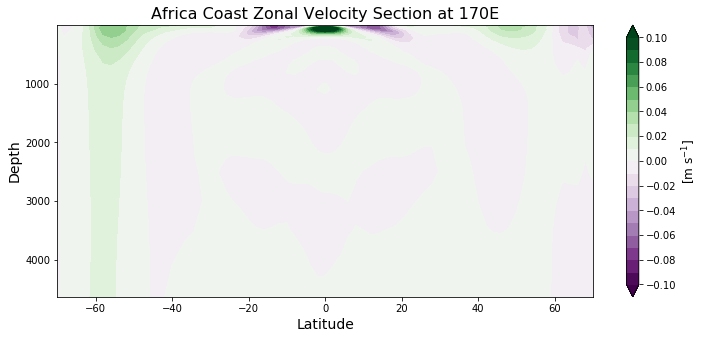

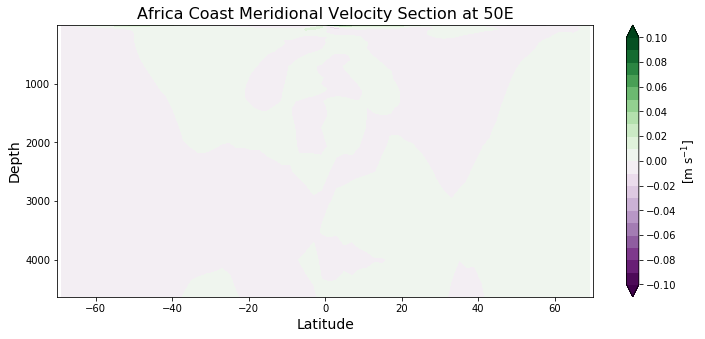

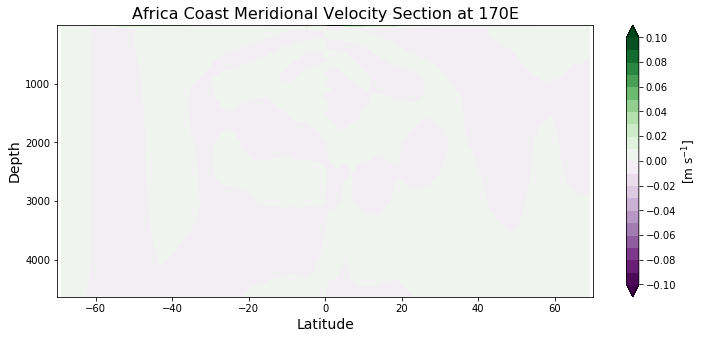

In [17]:
# Meridional sections for the Africa Coast large basin

plot_salt_section(dy_af, 50, 5000, case_af)
plot_salt_section(dy_af, 170, 5000, case_af)

plot_temp_section(dy_af, 50, 5000, case_af)
plot_temp_section(dy_af, 170, 5000, case_af)

plot_density_section(dy_af, 50, 5000, case_af)
plot_density_section(dy_af, 170, 5000, case_af)

plot_u_section(dy_af, 50, 5000, case_af)
plot_u_section(dy_af, 170, 5000, case_af)

plot_v_section(dy_af, 50, 5000, case_af)
plot_v_section(dy_af, 170, 5000, case_af)

# Anomaly from Straight Coast Plots Below

In [18]:
# More functions for difference plots

def plot_salt_section_diff(dataset, lon, z, case_name):
    t = np.linspace(-1, 1, 11, endpoint=True)
    b = np.linspace(-1, 1, 21, endpoint=True)
    
    fig, ax = plt.subplots(figsize=(12,5))
    cf = ax.contourf(dataset.yh, dataset.zl.sel(zl=slice(0,z)), 
                     (dataset.so.sel(xh=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time')-
                     dy_straight.so.sel(xh=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time')),
                     b, cmap='BrBG_r', extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{} - Straight Coast'.format(case_name)+' '+'Salinity Section at'+' '+'{}'.format(lon)+'E', 
                 fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t)
    cbar.ax.set_ylabel('[psu]', fontsize=12)
#     plt.savefig(fig_path+'{}_salt_section_{}.png'.format(basin, lon))
    plt.show()
    return

def plot_temp_section_diff(dataset, lon, z, case_name):
    t = np.linspace(-3, 3, 11, endpoint=True)
    b = np.linspace(-3, 3, 21, endpoint=True)

    fig, ax = plt.subplots(figsize=(12,5))
    cf = ax.contourf(dataset.yh, dataset.zl.sel(zl=slice(0,z)), 
                     (dataset.thetao.sel(xh=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time') - 
                     dy_straight.thetao.sel(xh=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time')), 
                     b, cmap='RdBu_r', extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{} - Straight Coast'.format(case_name)+' '+'Temperature Section at'+' '+'{}'.format(lon)+'E', 
                 fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel('[C]', fontsize=12)
    plt.show()
    return

def plot_density_section_diff(dataset, lon, z, case_name):
    t = np.linspace(-0.5, 0.5, 11, endpoint=True)
    b = np.linspace(-0.5, 0.5, 21, endpoint=True)

    density = calc_sigma_wright(dataset.so.sel(xh=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                                dataset.thetao.sel(xh=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                                press=2000)
    density_straight = calc_sigma_wright(dy_straight.so.sel(xh=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                                dy_straight.thetao.sel(xh=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                                press=2000)
    
    fig, ax = plt.subplots(figsize=(12,5))
    cf = ax.contourf(dataset.yh, dataset.zl.sel(zl=slice(0,z)), 
                     density - density_straight, 
                     b, cmap='PiYG_r', extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{} - Straight Coast'.format(case_name)+' '+'Density Section at'+' '+'{}'.format(lon)+'E', 
                 fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t)
    cbar.ax.set_ylabel('[kg m$^{-3}$]', fontsize=12)
    plt.show()
    return

def plot_u_section_diff(dataset, lon, z, case_name):
    t = np.linspace(-0.05, 0.05, 11, endpoint=True)
    b = np.linspace(-0.05, 0.05, 21, endpoint=True)

    fig, ax = plt.subplots(figsize=(12,5))
    cf = ax.contourf(dataset.yh, dataset.zl.sel(zl=slice(0,z)), 
                     (dataset.uo.sel(xq=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time') - 
                     dy_straight.uo.sel(xq=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time')), 
                     b, cmap='PuOr_r', extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{} - Straight Coast'.format(case_name)+' '+'U Section at'+' '+'{}'.format(lon)+'E', 
                 fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t)
    cbar.ax.set_ylabel('[m s$^{-1}$]', fontsize=12)
    plt.show()
    return

def plot_v_section_diff(dataset, lon, z, case_name):
    t = np.linspace(-0.05, 0.05, 11, endpoint=True)
    b = np.linspace(-0.05, 0.05, 21, endpoint=True)

    fig, ax = plt.subplots(figsize=(12,5))
    cf = ax.contourf(dataset.yq, dataset.zl.sel(zl=slice(0,z)), 
                     (dataset.vo.sel(xh=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time') - 
                     dy_straight.vo.sel(xh=lon, method='nearest').sel(zl=slice(0,z)).mean(dim='time')), 
                     b, cmap='PuOr_r', extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{} - Straight Coast'.format(case_name)+' '+'V Section at'+' '+'{}'.format(lon)+'E', 
                 fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t)
    cbar.ax.set_ylabel('[m s$^{-1}$]', fontsize=12)
    plt.show()
    return


# Functions for Zonal Sections

def plot_salt_section_zonal_diff(dataset, lat, z, case_name):
    t = np.linspace(-1, 1, 11, endpoint=True)
    b = np.linspace(-1, 1, 21, endpoint=True)
    
    fig, ax = plt.subplots(figsize=(16,5))
    cf = ax.contourf(dataset.xh, dataset.zl.sel(zl=slice(0,z)), 
                     (dataset.so.sel(yh=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time') - 
                     dy_straight.so.sel(yh=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time')),
                     b, cmap='BrBG_r', extend='both')
    ax.invert_yaxis()
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    ax.set_title('{} - Straight Coast'.format(case_name)+' '+'Salinity Section at'+' '+'{}'.format(lat)+'N', 
                 fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t,)
    cbar.ax.set_ylabel('[psu]', fontsize=12)
    plt.show()
    return

def plot_temp_section_zonal_diff(dataset, lat, z, case_name):
    t = np.linspace(-3, 3, 11, endpoint=True)
    b = np.linspace(-3, 3, 21, endpoint=True)
    
    fig, ax = plt.subplots(figsize=(16,5))
    cf = ax.contourf(dataset.xh, dataset.zl.sel(zl=slice(0,z)), 
                     (dataset.thetao.sel(yh=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time') - 
                      dy_straight.thetao.sel(yh=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time')), 
                     b, cmap='RdBu_r', extend='both')
    ax.invert_yaxis()
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    ax.set_title('{} - Straight Coast'.format(case_name)+' '+'Temperature Section at'+' '+'{}'.format(lat)+'N', 
                 fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel('[C]', fontsize=12)
    plt.show()
    return

def plot_density_section_zonal_diff(dataset, lat, z, case_name):
    t = np.linspace(-0.5, 0.5, 11, endpoint=True)
    b = np.linspace(-0.5, 0.5, 21, endpoint=True)

    density = calc_sigma_wright(dataset.so.sel(yh=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                                dataset.thetao.sel(yh=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                                press=2000)
    density_straight = calc_sigma_wright(dy_straight.so.sel(yh=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                                dy_straight.thetao.sel(yh=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time'), 
                                press=2000)
    
    fig, ax = plt.subplots(figsize=(16,5))
    cf = ax.contourf(dataset.xh, dataset.zl.sel(zl=slice(0,z)), 
                     density - density_straight, 
                     b, cmap='PiYG_r', extend='both')
    ax.invert_yaxis()
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    ax.set_title('{} - Straight Coast'.format(case_name)+' '+'Density Section at'+' '+'{}'.format(lat)+'N', 
                 fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t)
    cbar.ax.set_ylabel('[kg m$^{-3}$]', fontsize=12)
    plt.show()
    return

def plot_u_section_zonal_diff(dataset, lat, z, case_name):
    t = np.linspace(-0.05, 0.05, 11, endpoint=True)
    b = np.linspace(-0.05, 0.05, 21, endpoint=True)

    fig, ax = plt.subplots(figsize=(16,5))
    cf = ax.contourf(dataset.xq, dataset.zl.sel(zl=slice(0,z)), 
                     (dataset.uo.sel(yh=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time') - 
                     dy_straight.uo.sel(yh=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time')), 
                     b, cmap='PuOr_r', extend='both')
    ax.invert_yaxis()
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    ax.set_title('{} - Straight Coast'.format(case_name)+' '+'U Section at'+' '+'{}'.format(lat)+'N', 
                 fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t)
    cbar.ax.set_ylabel('[m s$^{-1}$]', fontsize=12)
    plt.show()
    return

def plot_v_section_zonal_diff(dataset, lat, z, case_name):
    t = np.linspace(-0.05, 0.05, 11, endpoint=True)
    b = np.linspace(-0.05, 0.05, 21, endpoint=True)

    fig, ax = plt.subplots(figsize=(16,5))
    cf = ax.contourf(dataset.xh, dataset.zl.sel(zl=slice(0,z)), 
                     (dataset.vo.sel(yq=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time') - 
                      dy_straight.vo.sel(yq=lat, method='nearest').sel(zl=slice(0,z)).mean(dim='time')), 
                     b, cmap='PuOr_r', extend='both')
    ax.invert_yaxis()
    plt.ylabel('Depth', fontsize=14), plt.xlabel('Longitude', fontsize=14)
    ax.set_title('{} - Straight Coast'.format(case_name)+' '+'V Section at'+' '+'{}'.format(lat)+'N', 
                 fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t)
    cbar.ax.set_ylabel('[m s$^{-1}$]', fontsize=12)
    plt.show()
    return

# Wide Coast - Straight Coast

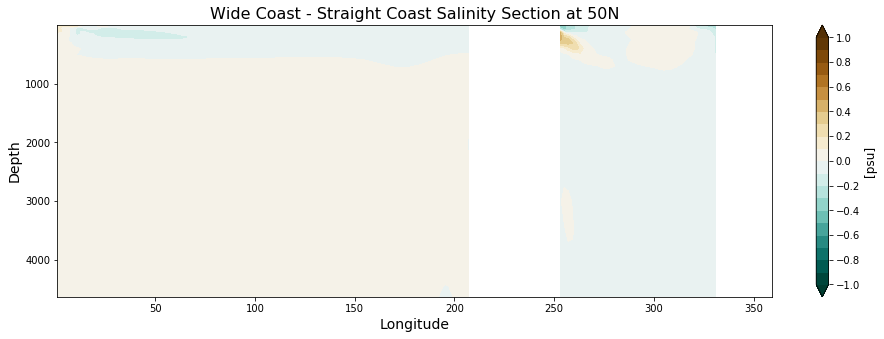

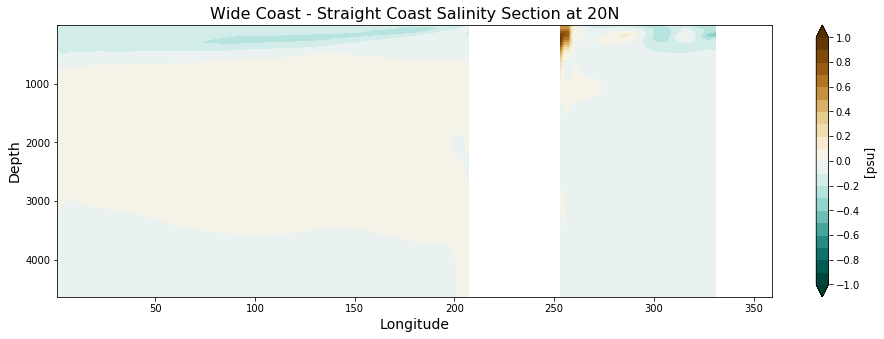

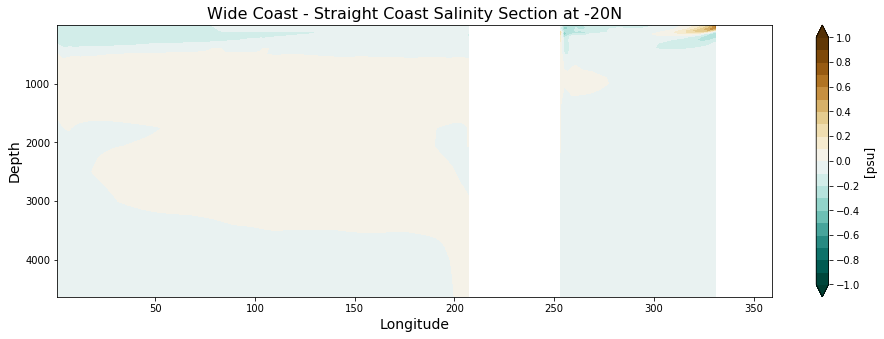

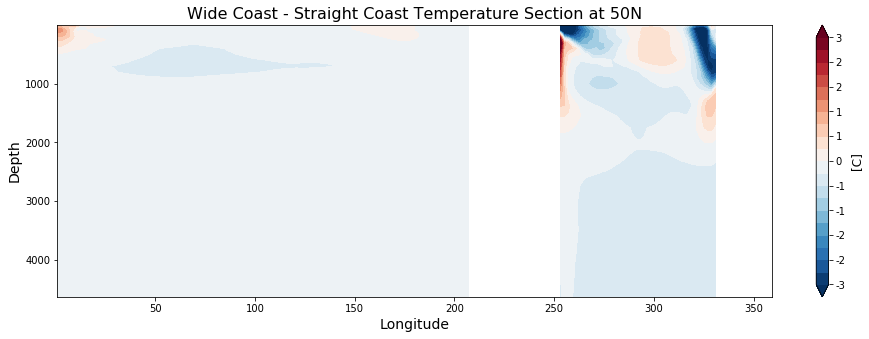

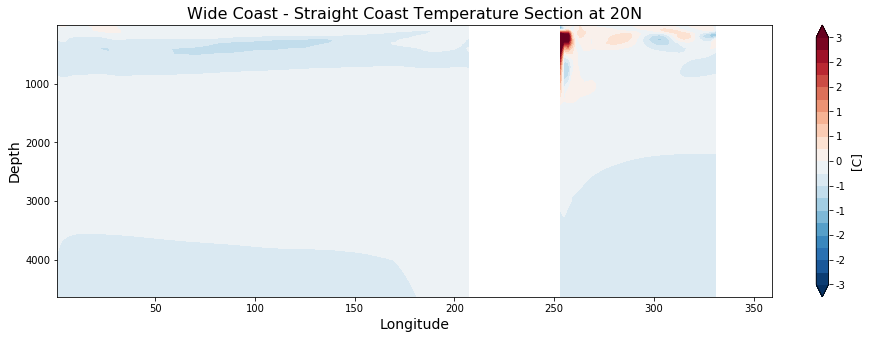

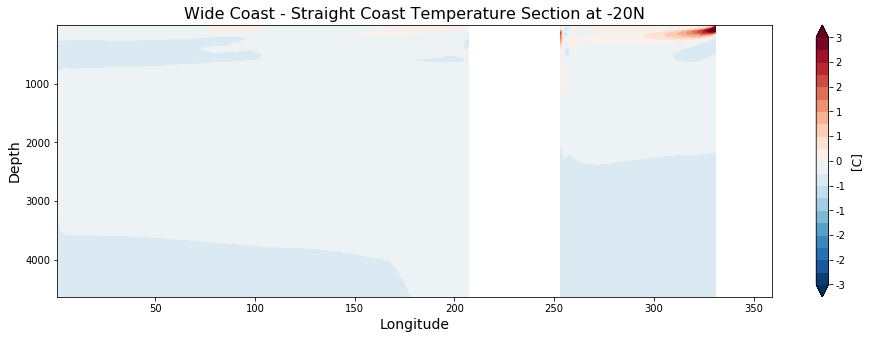

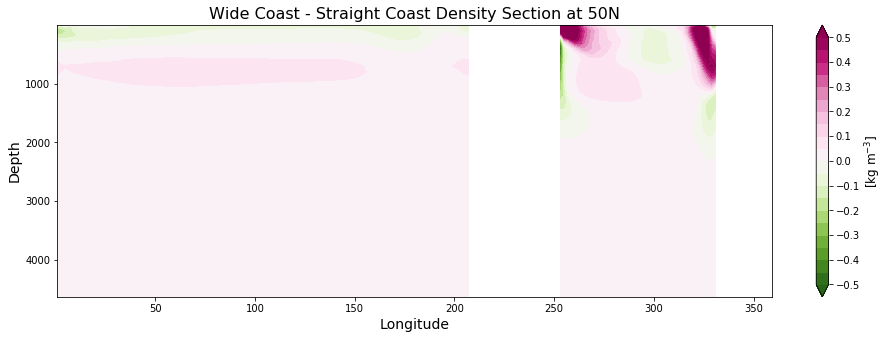

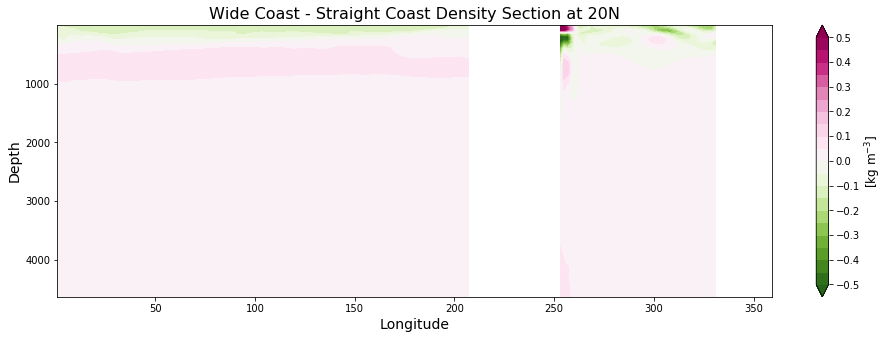

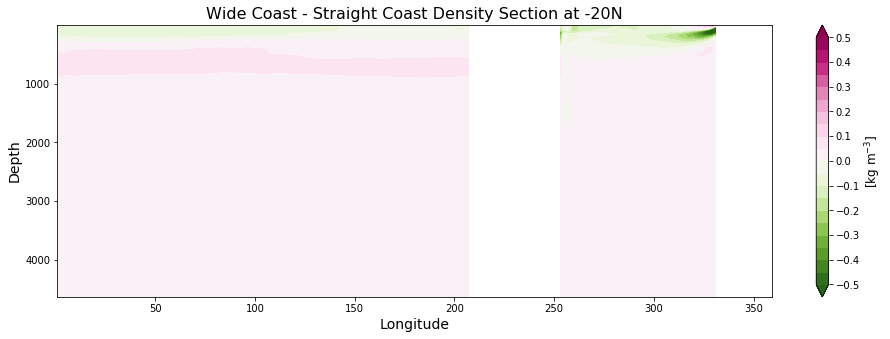

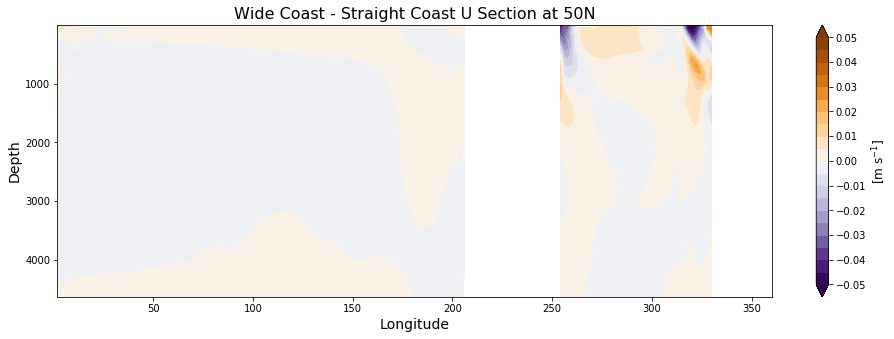

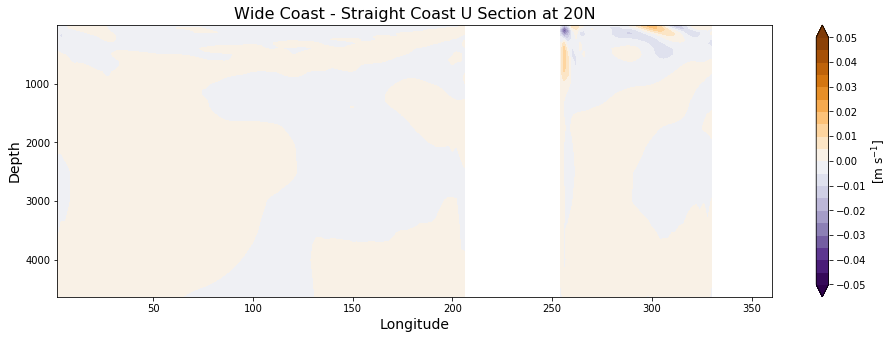

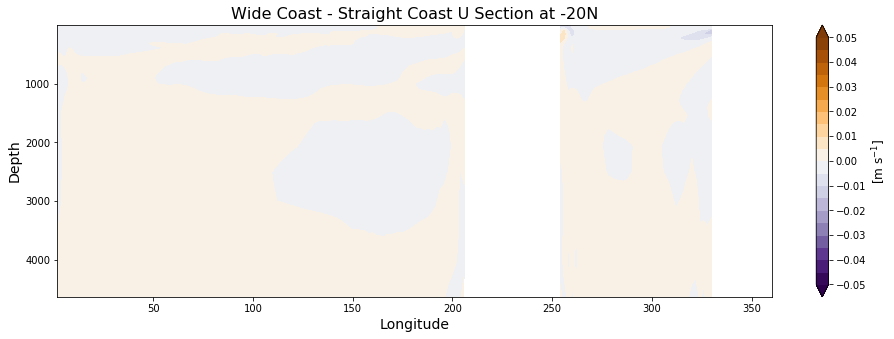

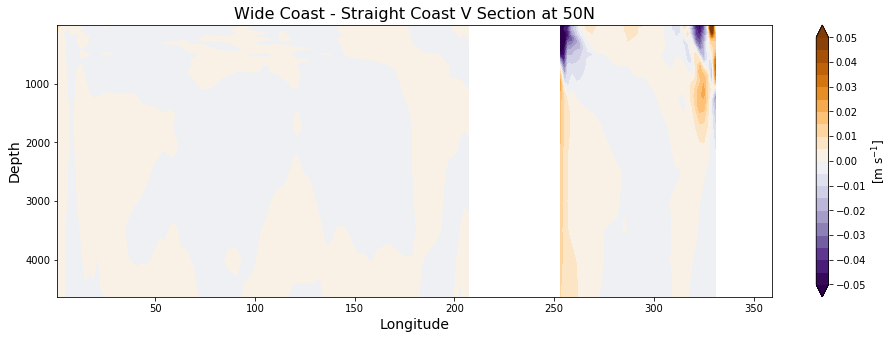

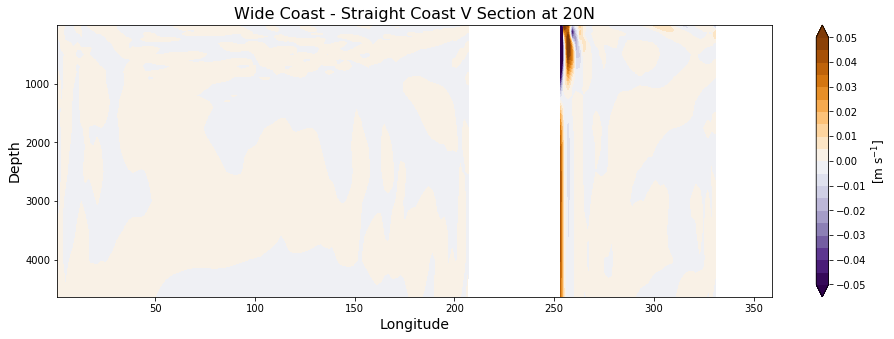

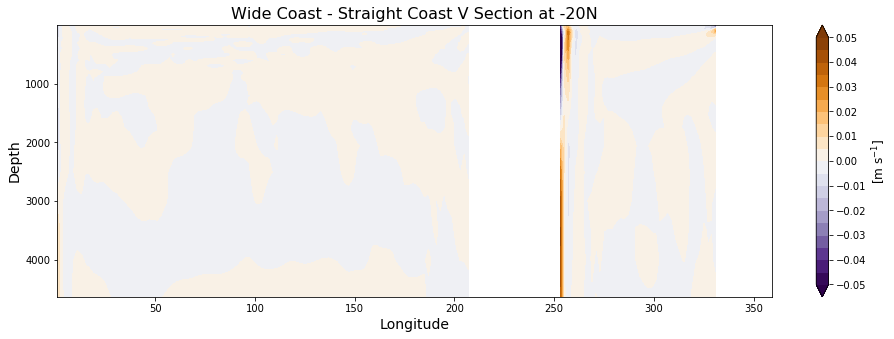

In [19]:
# Zonal Sections for Wide Coast - Straight Coast

plot_salt_section_zonal_diff(dy_wide, 50, 5000, case_wide)
plot_salt_section_zonal_diff(dy_wide, 20, 5000, case_wide)
plot_salt_section_zonal_diff(dy_wide, -20, 5000, case_wide)

plot_temp_section_zonal_diff(dy_wide, 50, 5000, case_wide)
plot_temp_section_zonal_diff(dy_wide, 20, 5000, case_wide)
plot_temp_section_zonal_diff(dy_wide, -20, 5000, case_wide)

plot_density_section_zonal_diff(dy_wide, 50, 5000, case_wide)
plot_density_section_zonal_diff(dy_wide, 20, 5000, case_wide)
plot_density_section_zonal_diff(dy_wide, -20, 5000, case_wide)

plot_u_section_zonal_diff(dy_wide, 50, 5000, case_wide)
plot_u_section_zonal_diff(dy_wide, 20, 5000, case_wide)
plot_u_section_zonal_diff(dy_wide, -20, 5000, case_wide)

plot_v_section_zonal_diff(dy_wide, 50, 5000, case_wide)
plot_v_section_zonal_diff(dy_wide, 20, 5000, case_wide)
plot_v_section_zonal_diff(dy_wide, -20, 5000, case_wide)

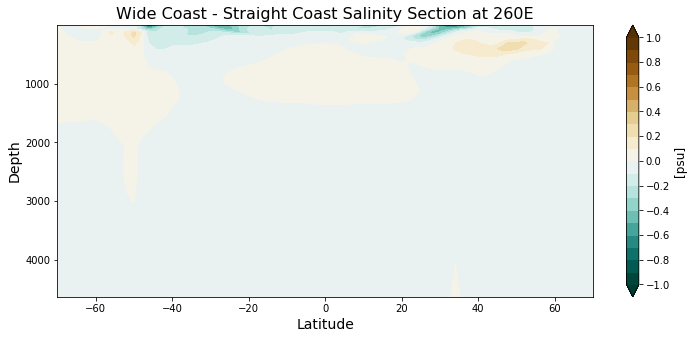

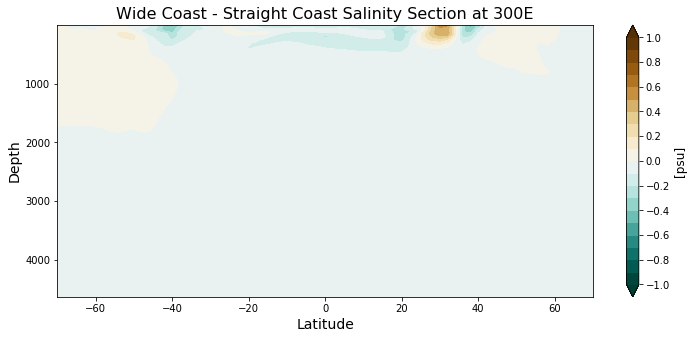

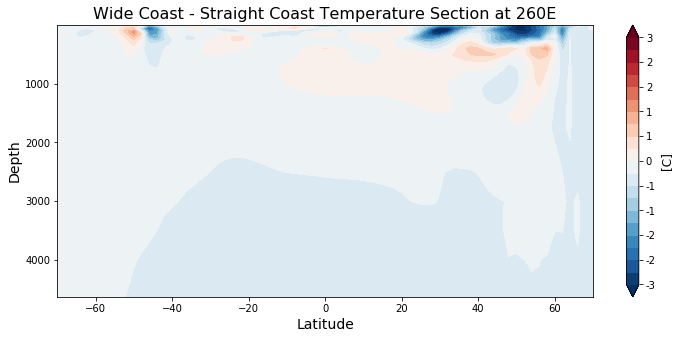

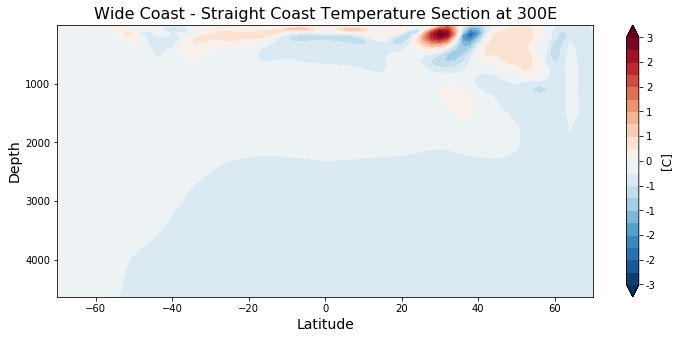

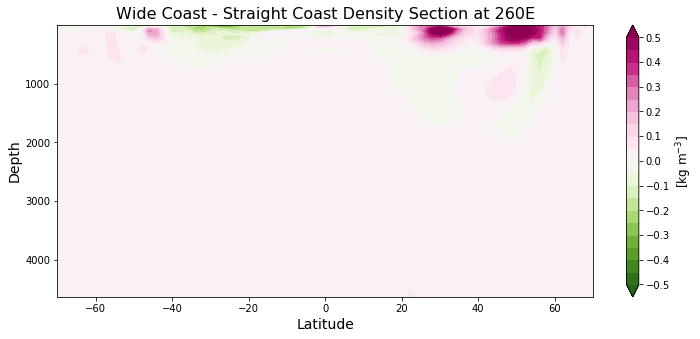

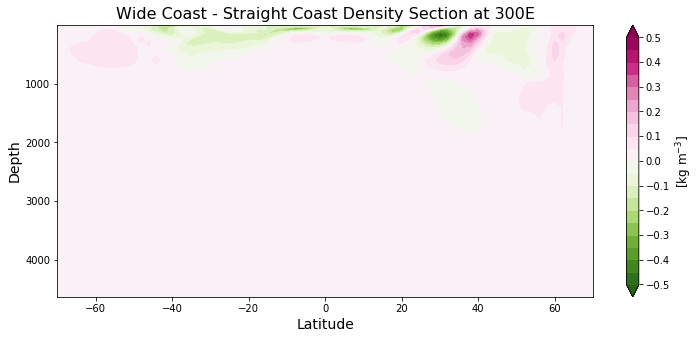

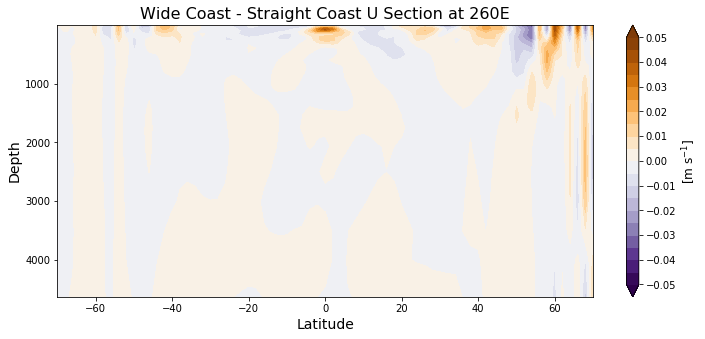

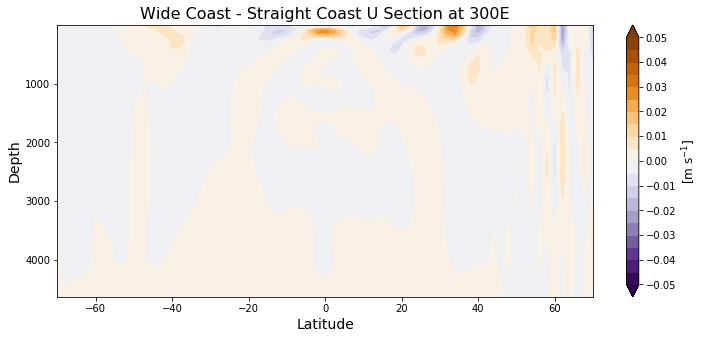

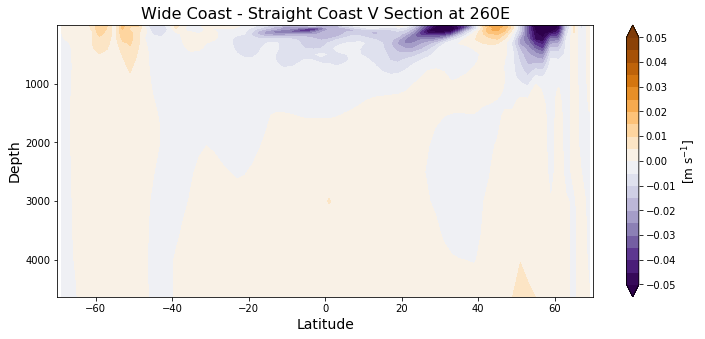

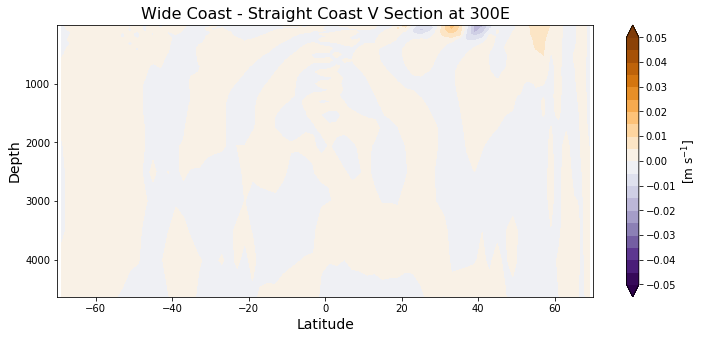

In [20]:
# Zonal sections for the Wide Coast - Straight Coast small basin

plot_salt_section_diff(dy_wide, 260, 5000, case_wide)
plot_salt_section_diff(dy_wide, 300, 5000, case_wide)

plot_temp_section_diff(dy_wide, 260, 5000, case_wide)
plot_temp_section_diff(dy_wide, 300, 5000, case_wide)

plot_density_section_diff(dy_wide, 260, 5000, case_wide)
plot_density_section_diff(dy_wide, 300, 5000, case_wide)

plot_u_section_diff(dy_wide, 260, 5000, case_wide)
plot_u_section_diff(dy_wide, 300, 5000, case_wide)

plot_v_section_diff(dy_wide, 260, 5000, case_wide)
plot_v_section_diff(dy_wide, 300, 5000, case_wide)

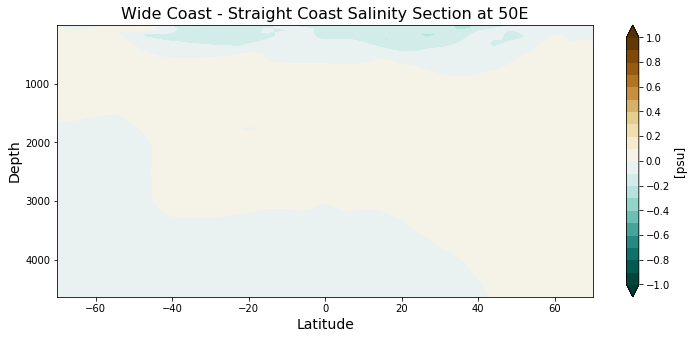

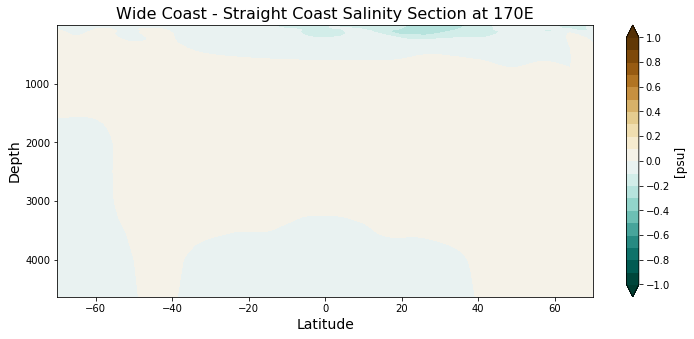

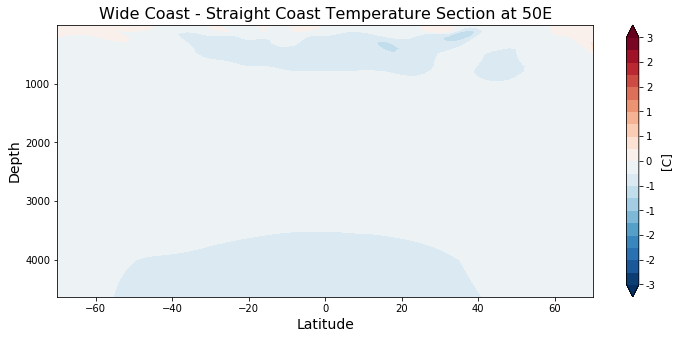

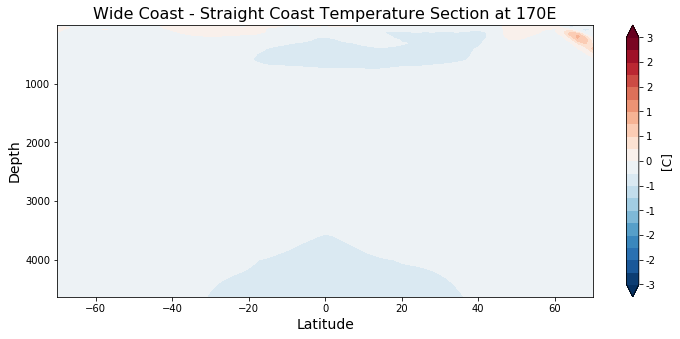

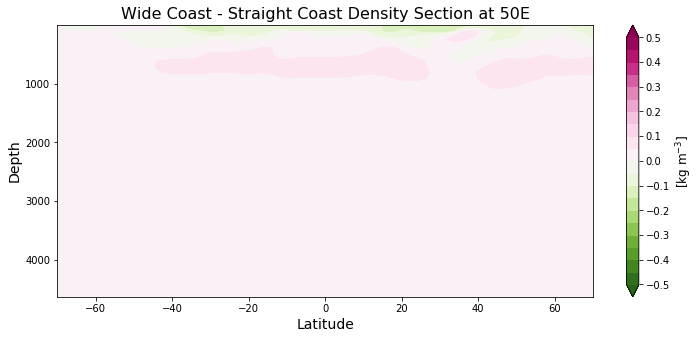

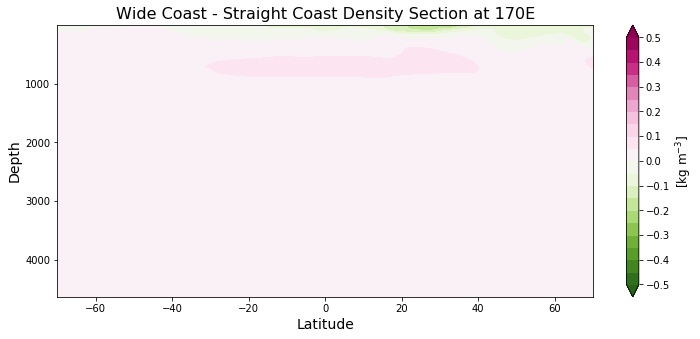

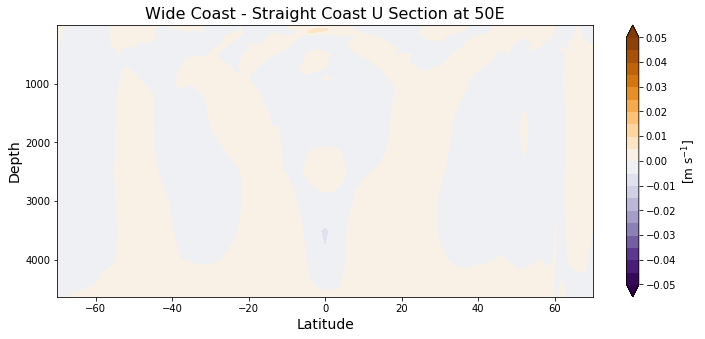

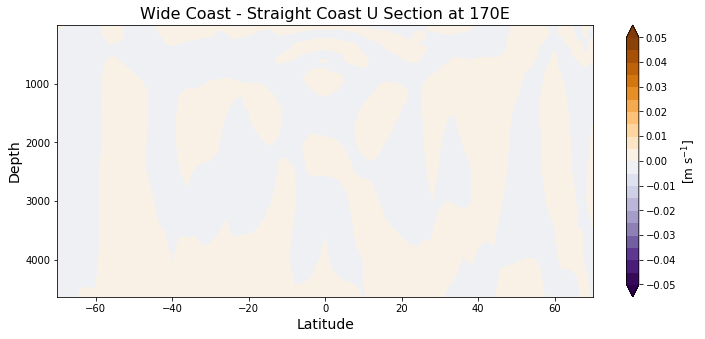

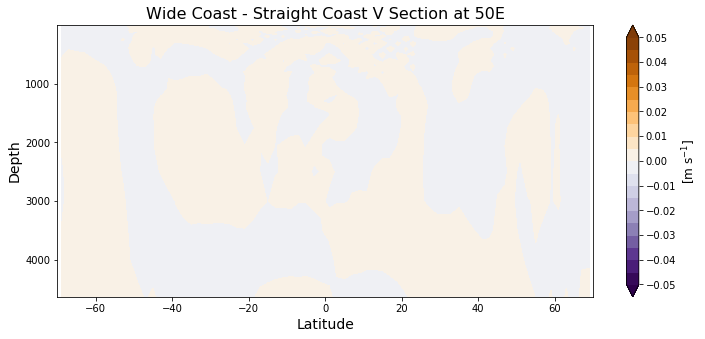

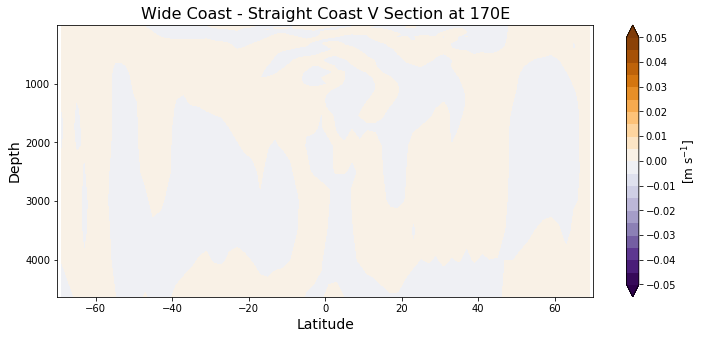

In [21]:
# Meridional sections for the Wide Coast - Straight Coast large basin

plot_salt_section_diff(dy_wide, 50, 5000, case_wide)
plot_salt_section_diff(dy_wide, 170, 5000, case_wide)

plot_temp_section_diff(dy_wide, 50, 5000, case_wide)
plot_temp_section_diff(dy_wide, 170, 5000, case_wide)

plot_density_section_diff(dy_wide, 50, 5000, case_wide)
plot_density_section_diff(dy_wide, 170, 5000, case_wide)

plot_u_section_diff(dy_wide, 50, 5000, case_wide)
plot_u_section_diff(dy_wide, 170, 5000, case_wide)

plot_v_section_diff(dy_wide, 50, 5000, case_wide)
plot_v_section_diff(dy_wide, 170, 5000, case_wide)

# Both Coast - Straight Coast

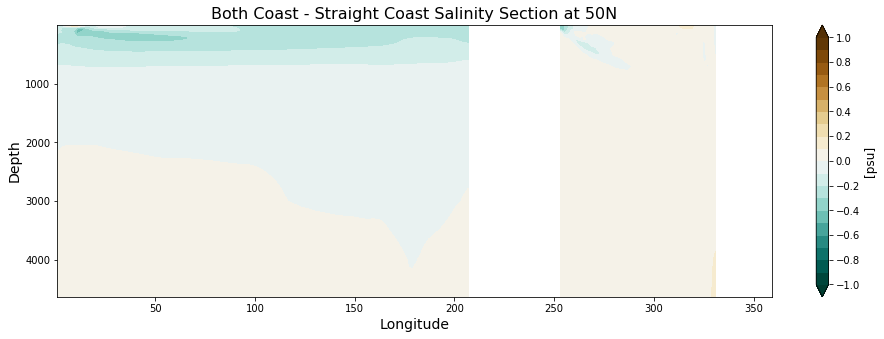

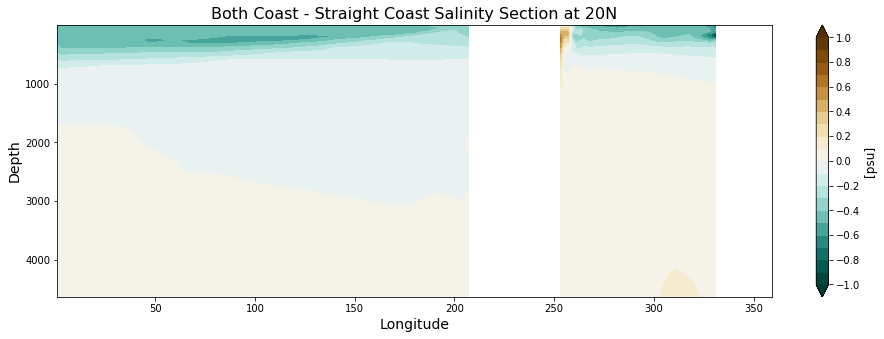

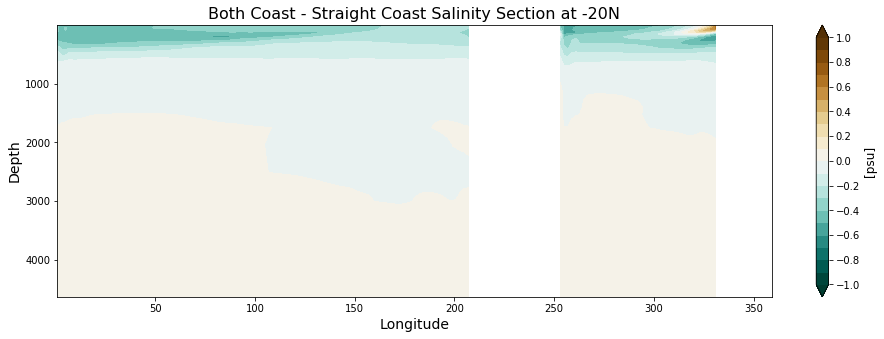

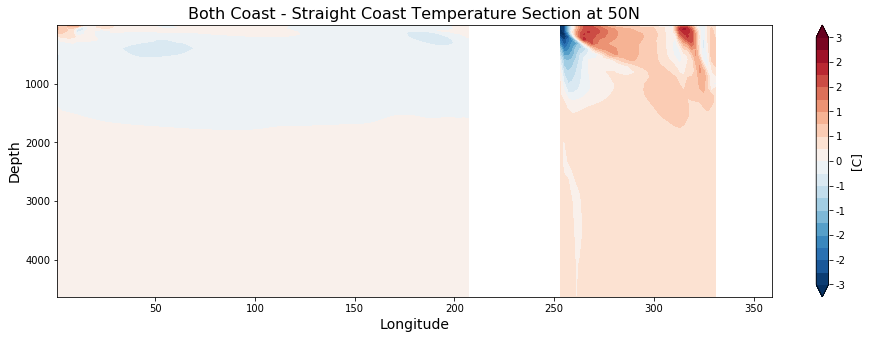

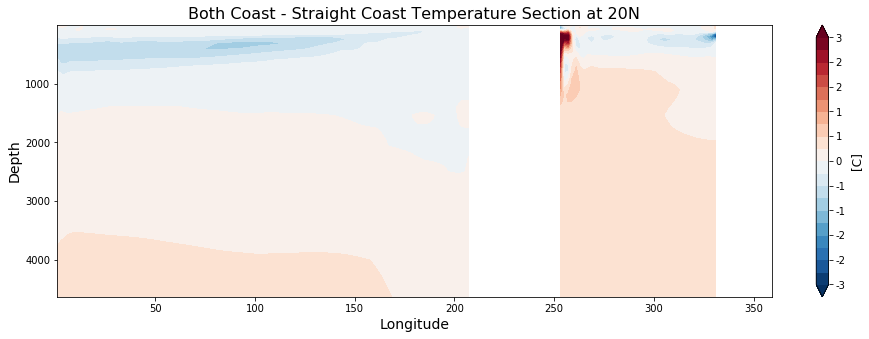

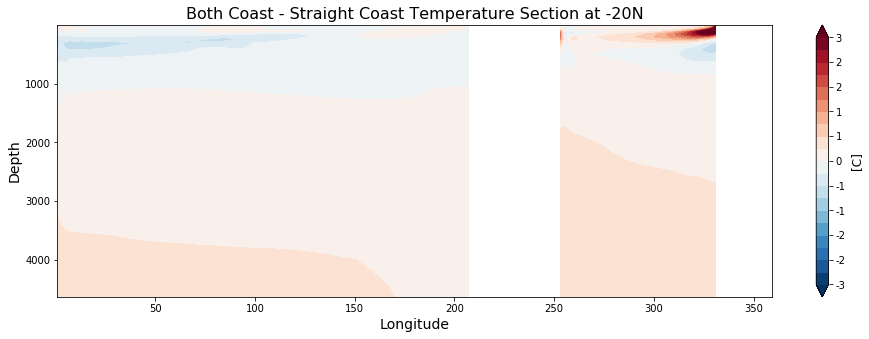

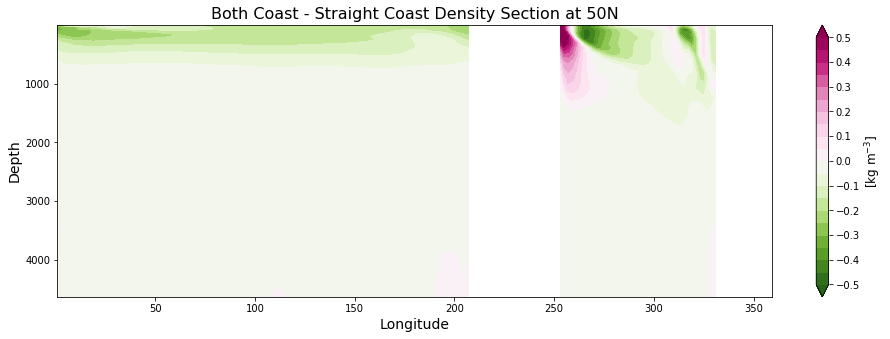

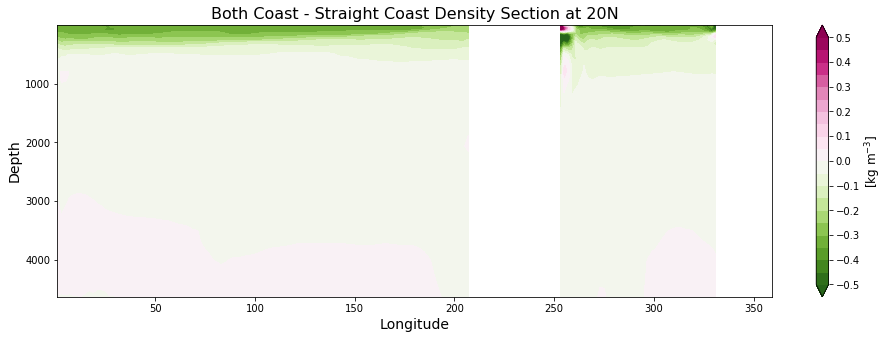

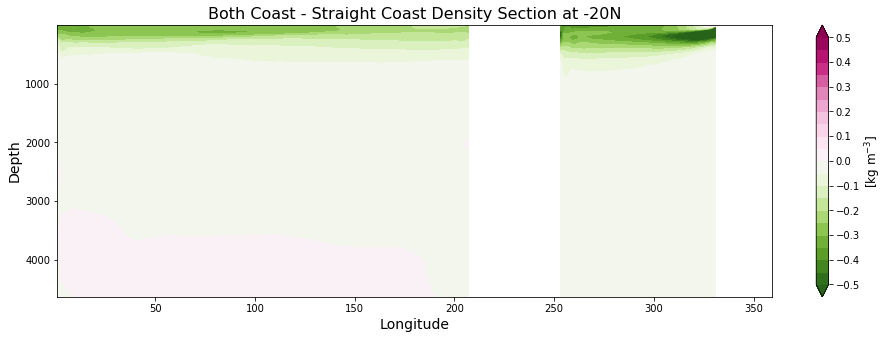

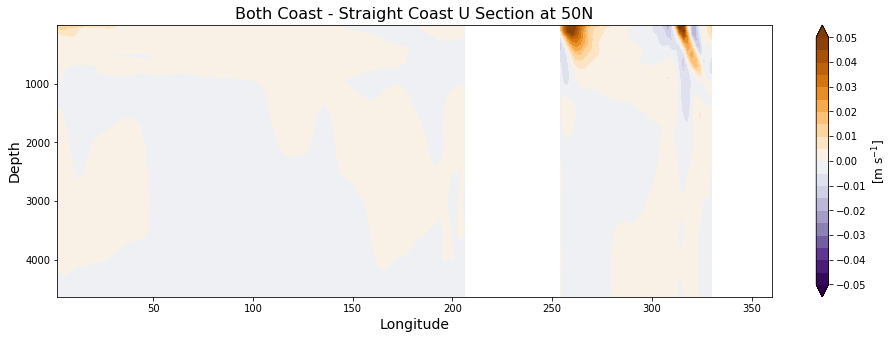

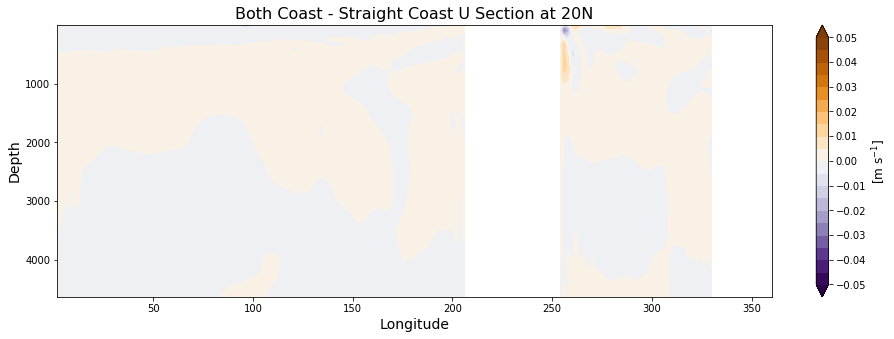

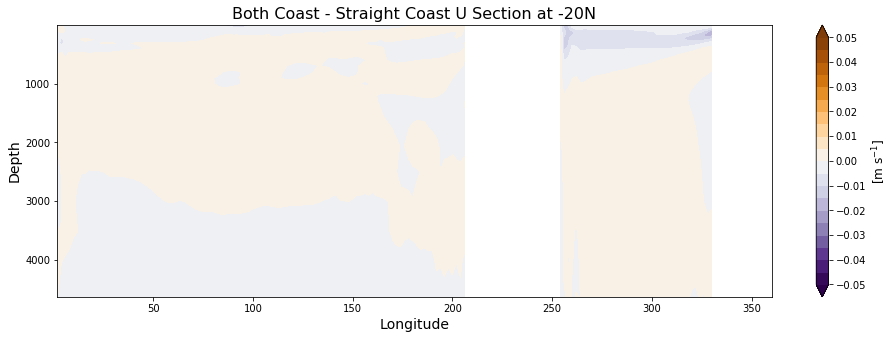

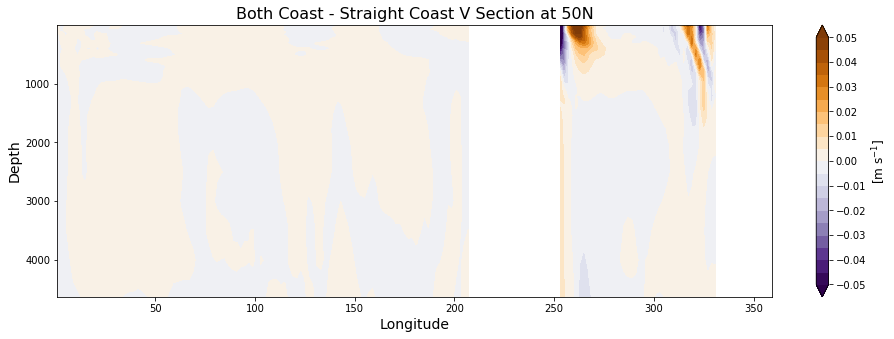

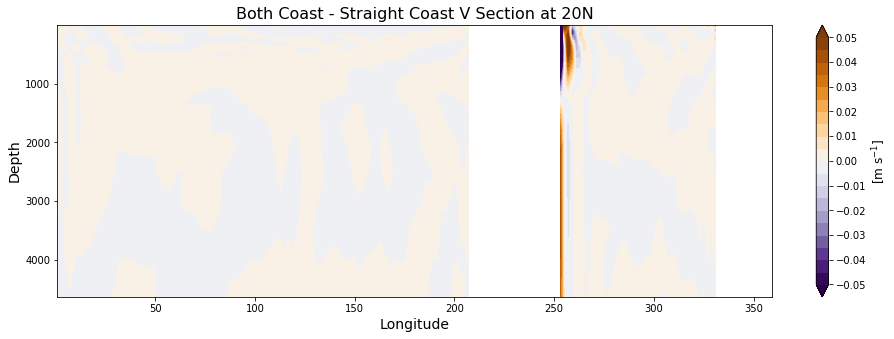

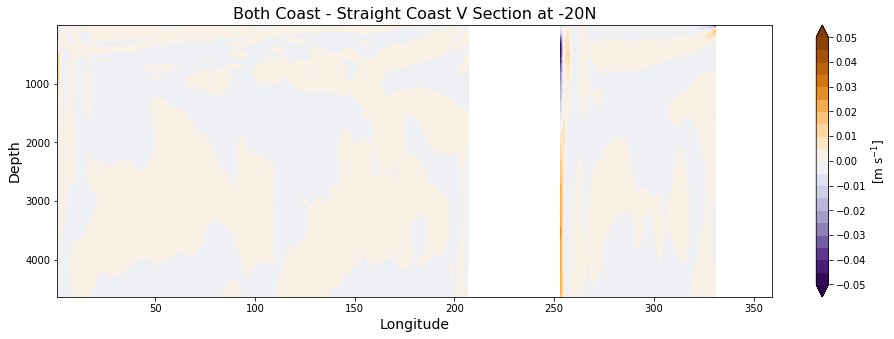

In [22]:
# Zonal Sections for Both Coast - Straight Coast

plot_salt_section_zonal_diff(dy_both, 50, 5000, case_both)
plot_salt_section_zonal_diff(dy_both, 20, 5000, case_both)
plot_salt_section_zonal_diff(dy_both, -20, 5000, case_both)

plot_temp_section_zonal_diff(dy_both, 50, 5000, case_both)
plot_temp_section_zonal_diff(dy_both, 20, 5000, case_both)
plot_temp_section_zonal_diff(dy_both, -20, 5000, case_both)

plot_density_section_zonal_diff(dy_both, 50, 5000, case_both)
plot_density_section_zonal_diff(dy_both, 20, 5000, case_both)
plot_density_section_zonal_diff(dy_both, -20, 5000, case_both)

plot_u_section_zonal_diff(dy_both, 50, 5000, case_both)
plot_u_section_zonal_diff(dy_both, 20, 5000, case_both)
plot_u_section_zonal_diff(dy_both, -20, 5000, case_both)

plot_v_section_zonal_diff(dy_both, 50, 5000, case_both)
plot_v_section_zonal_diff(dy_both, 20, 5000, case_both)
plot_v_section_zonal_diff(dy_both, -20, 5000, case_both)

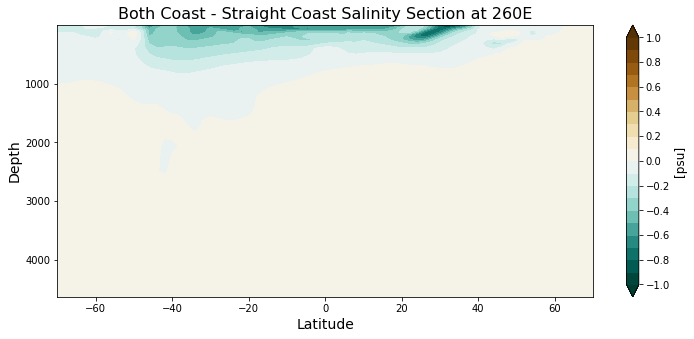

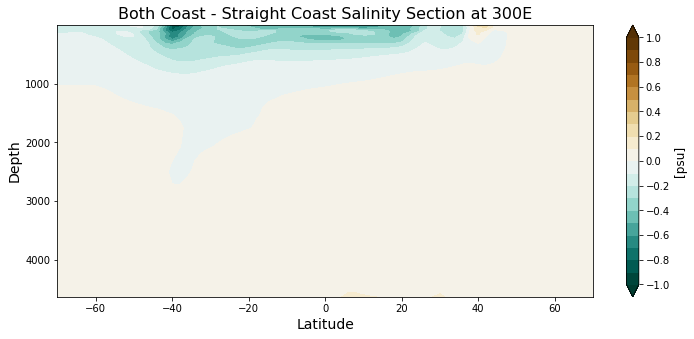

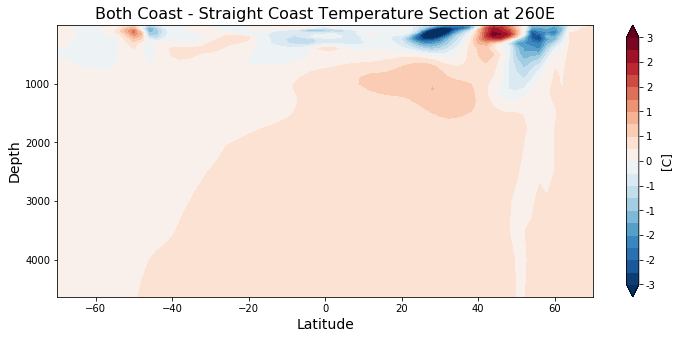

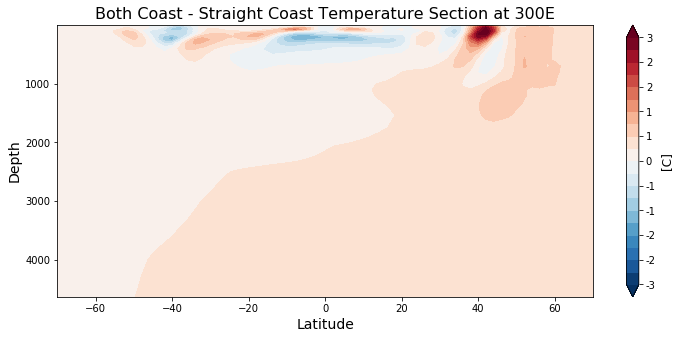

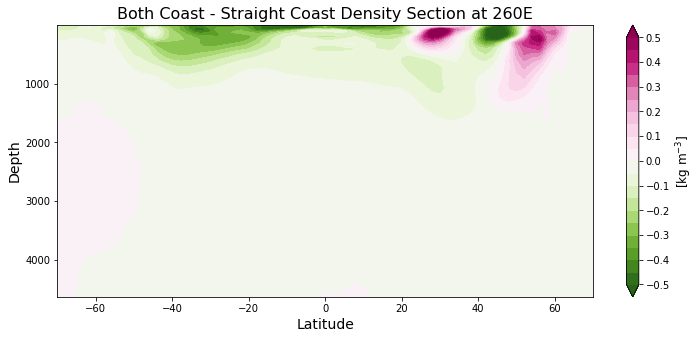

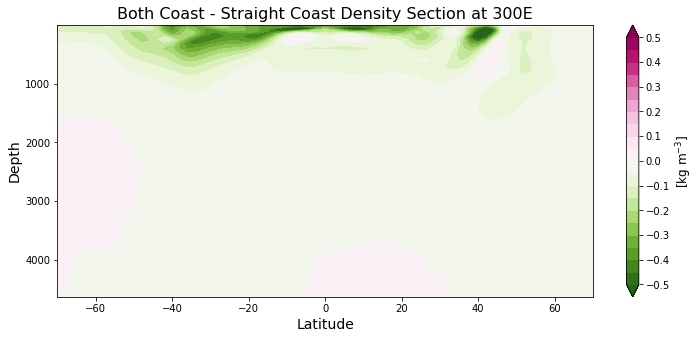

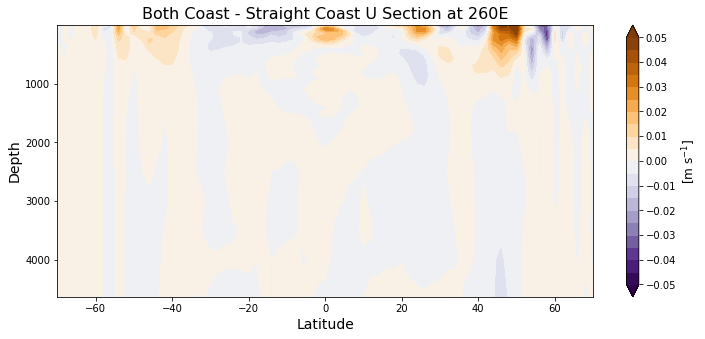

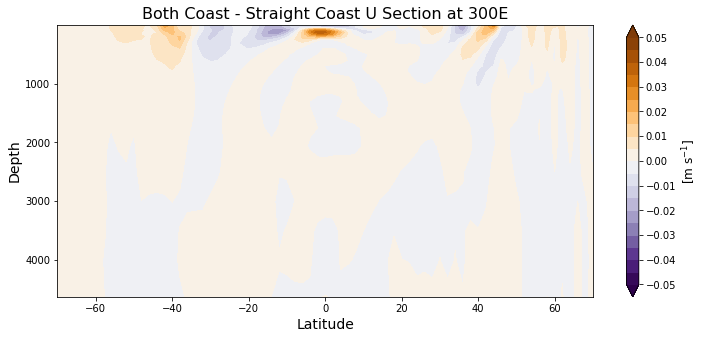

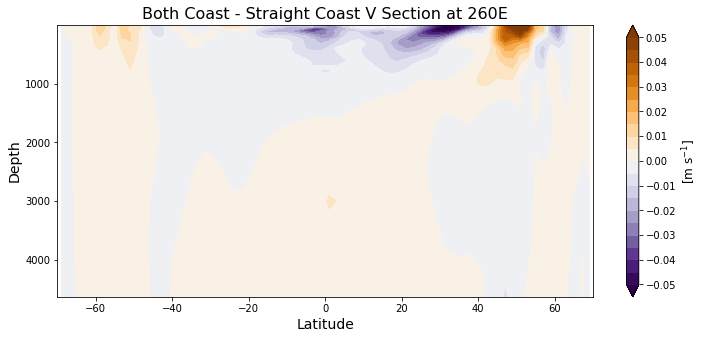

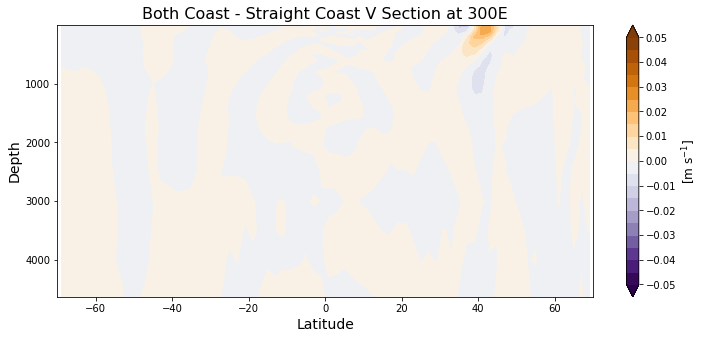

In [23]:
# Zonal sections for the Both Coast - Straight Coast small basin

plot_salt_section_diff(dy_both, 260, 5000, case_both)
plot_salt_section_diff(dy_both, 300, 5000, case_both)

plot_temp_section_diff(dy_both, 260, 5000, case_both)
plot_temp_section_diff(dy_both, 300, 5000, case_both)

plot_density_section_diff(dy_both, 260, 5000, case_both)
plot_density_section_diff(dy_both, 300, 5000, case_both)

plot_u_section_diff(dy_both, 260, 5000, case_both)
plot_u_section_diff(dy_both, 300, 5000, case_both)

plot_v_section_diff(dy_both, 260, 5000, case_both)
plot_v_section_diff(dy_both, 300, 5000, case_both)

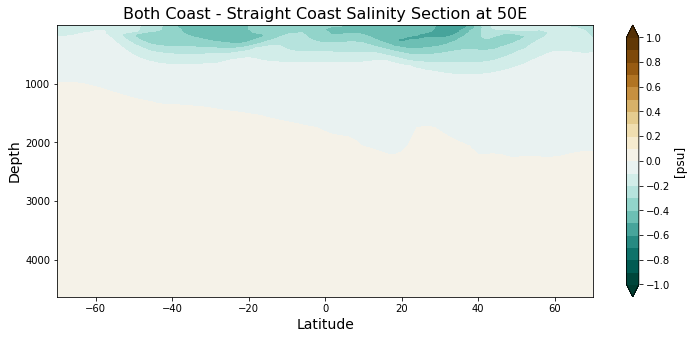

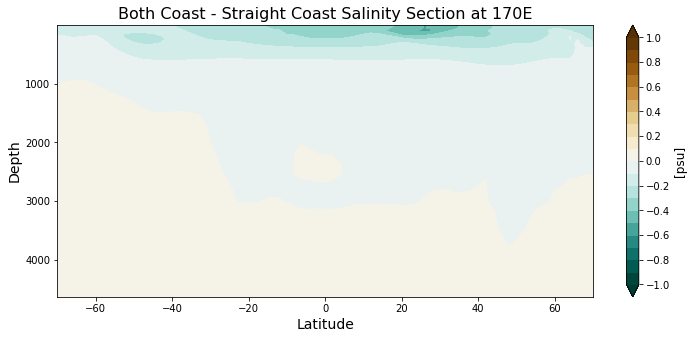

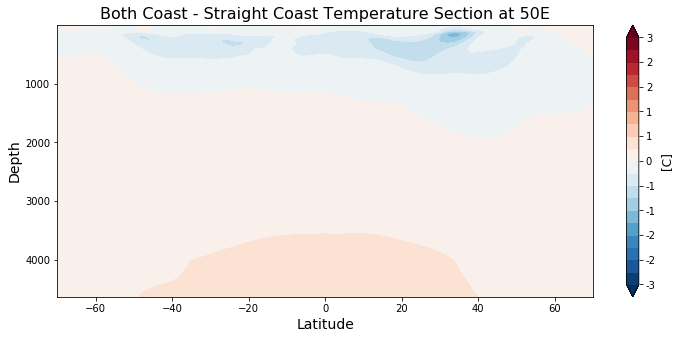

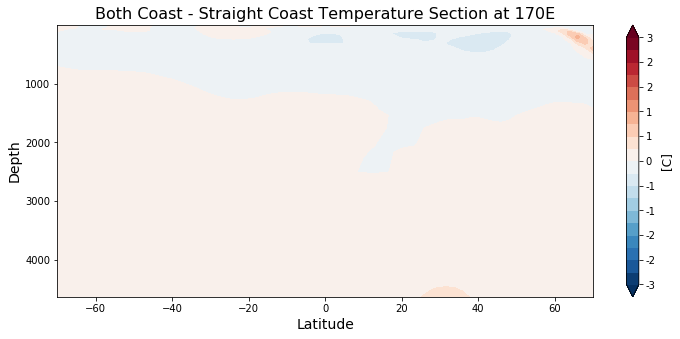

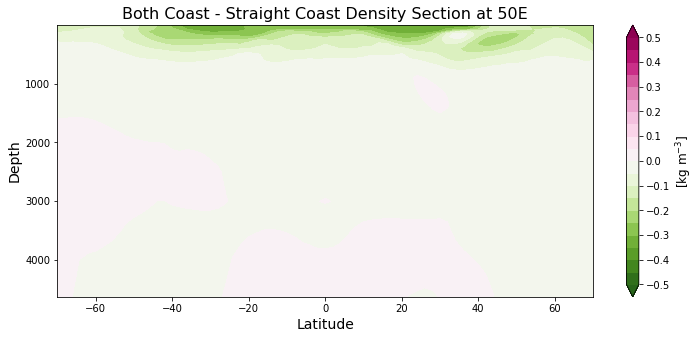

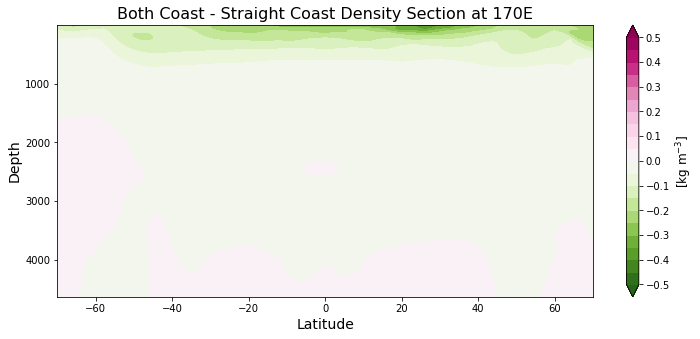

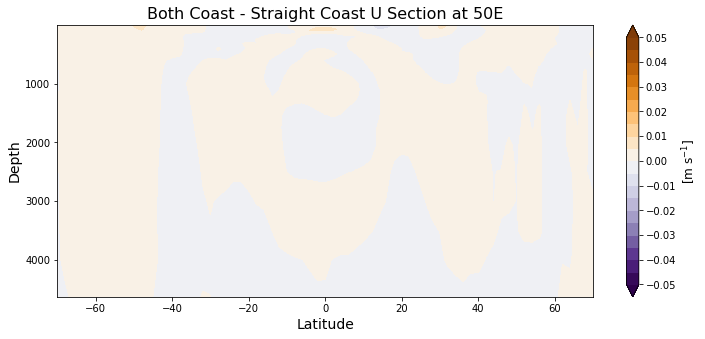

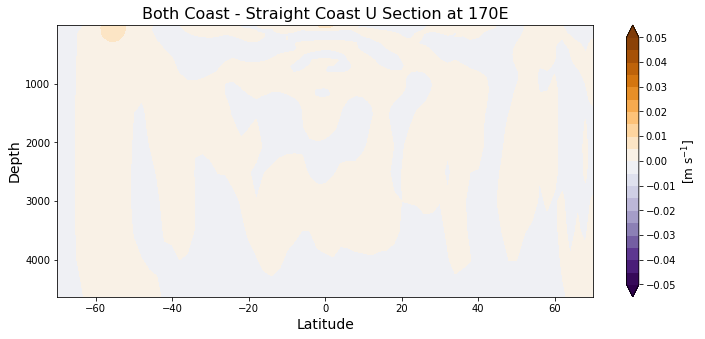

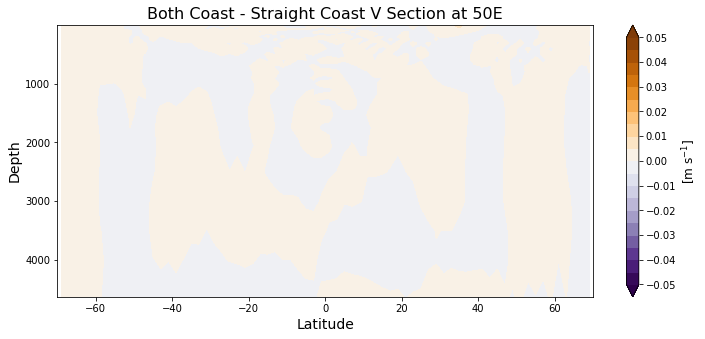

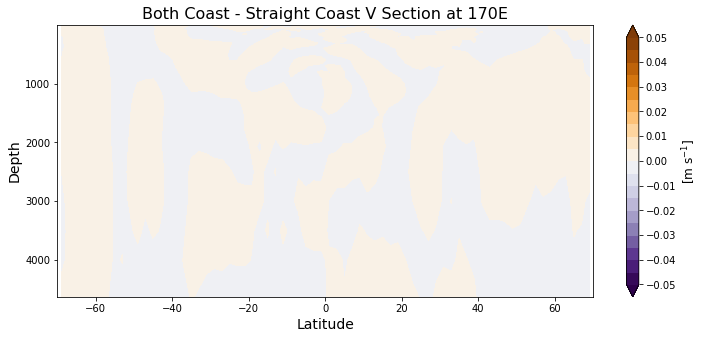

In [24]:
# Meridional sections for the Both Coast - Straight Coast large basin

plot_salt_section_diff(dy_both, 50, 5000, case_both)
plot_salt_section_diff(dy_both, 170, 5000, case_both)

plot_temp_section_diff(dy_both, 50, 5000, case_both)
plot_temp_section_diff(dy_both, 170, 5000, case_both)

plot_density_section_diff(dy_both, 50, 5000, case_both)
plot_density_section_diff(dy_both, 170, 5000, case_both)

plot_u_section_diff(dy_both, 50, 5000, case_both)
plot_u_section_diff(dy_both, 170, 5000, case_both)

plot_v_section_diff(dy_both, 50, 5000, case_both)
plot_v_section_diff(dy_both, 170, 5000, case_both)

# America Coast - Straight Coast

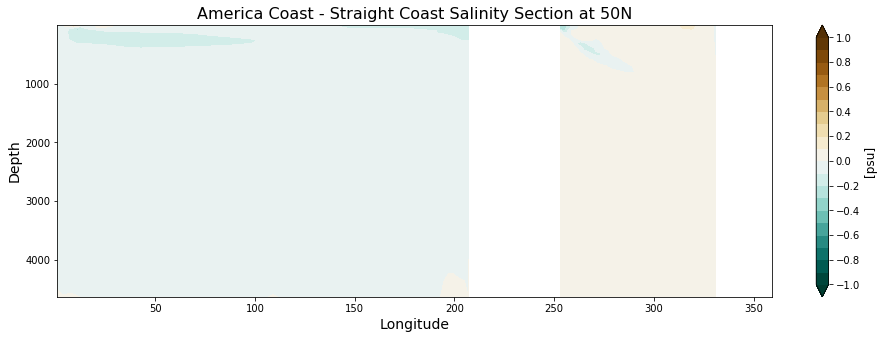

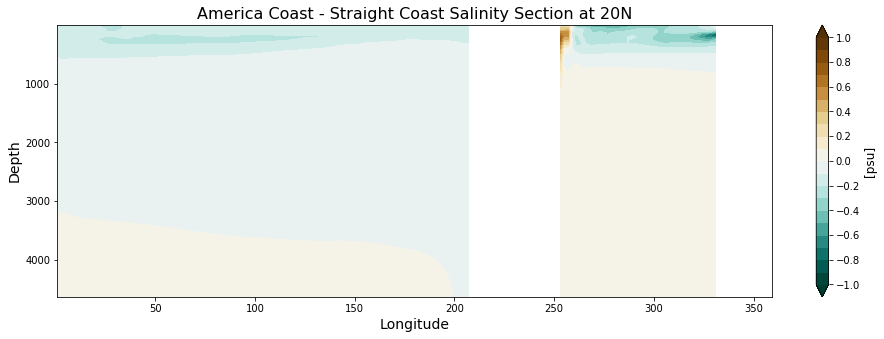

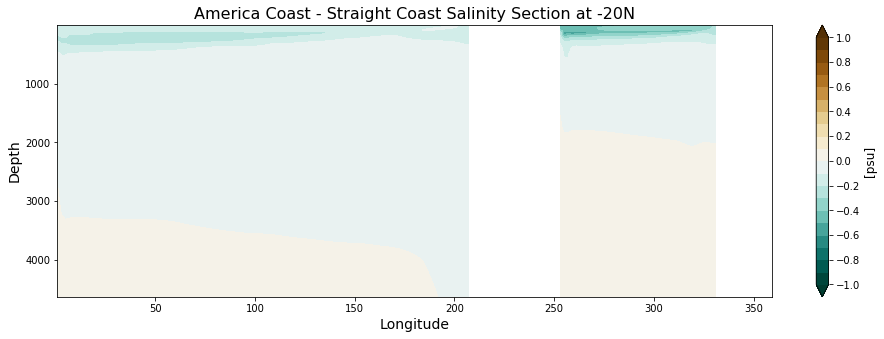

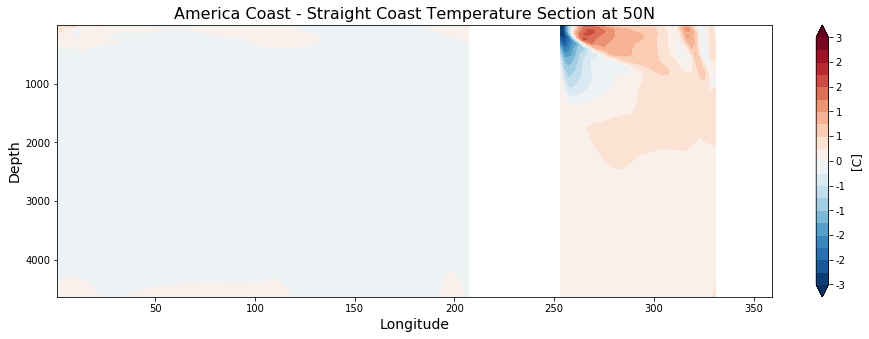

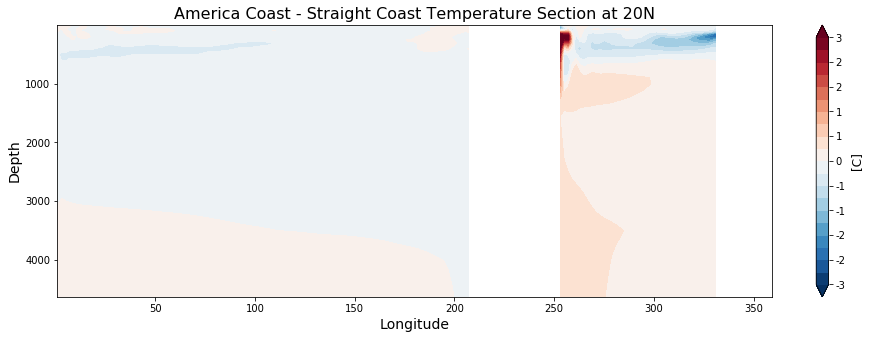

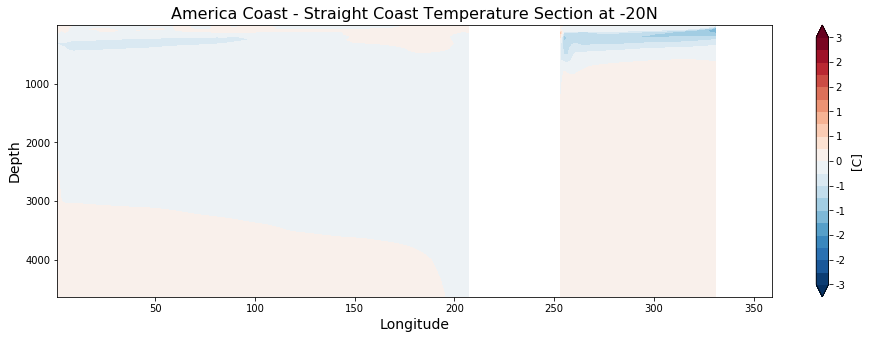

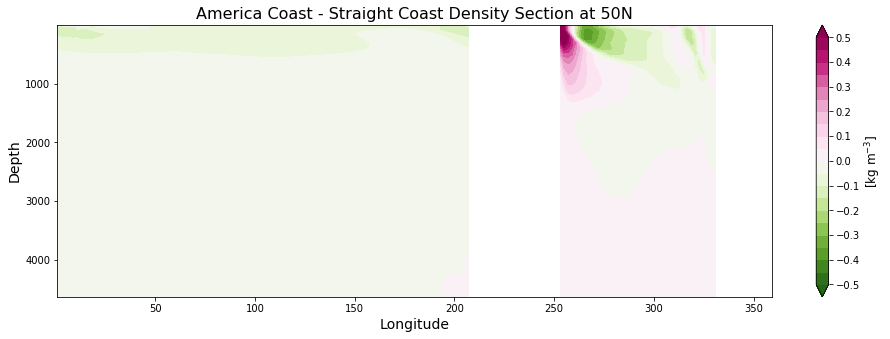

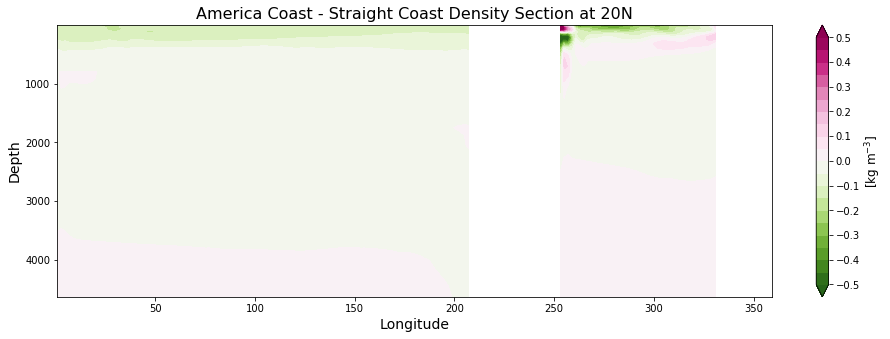

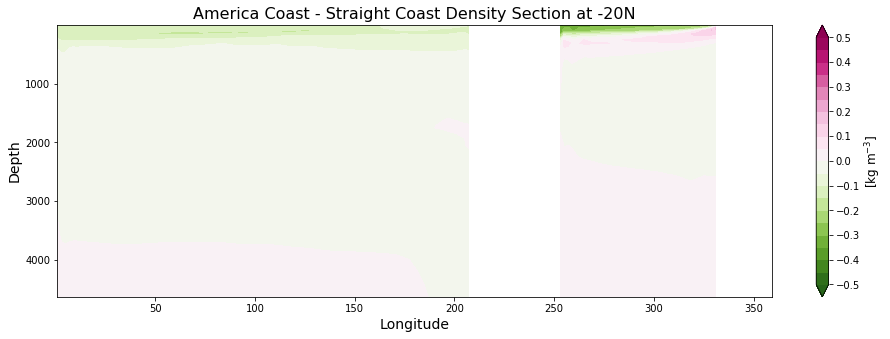

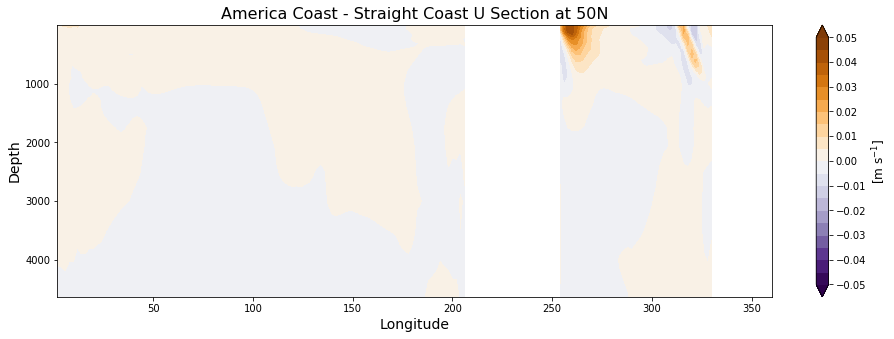

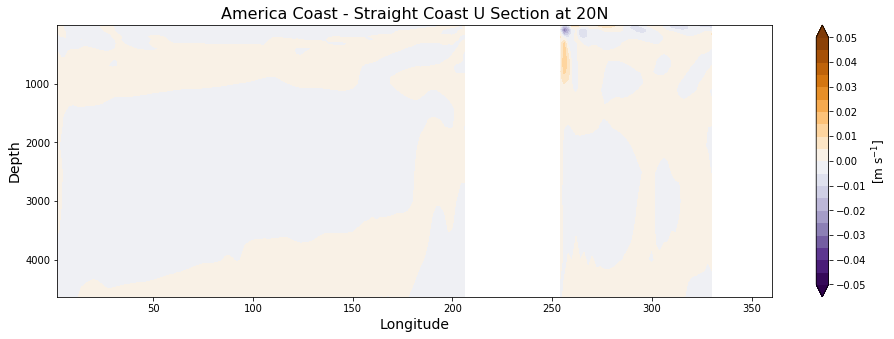

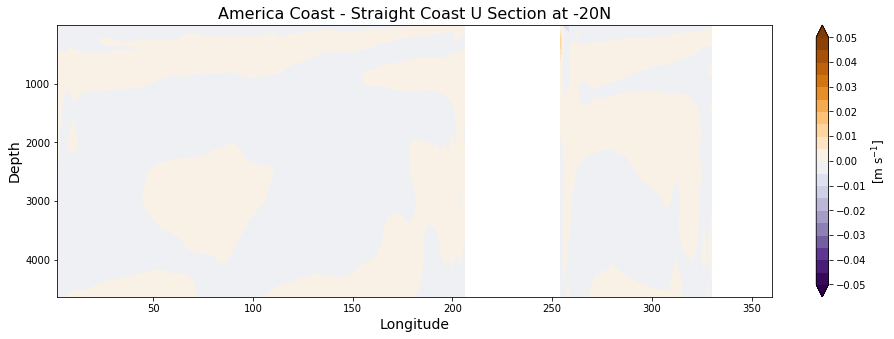

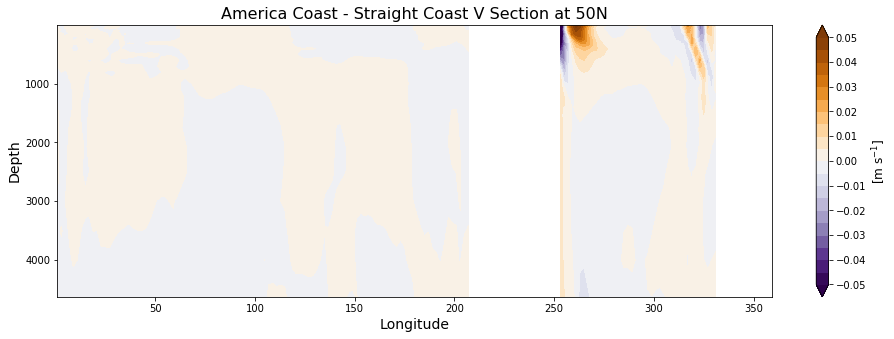

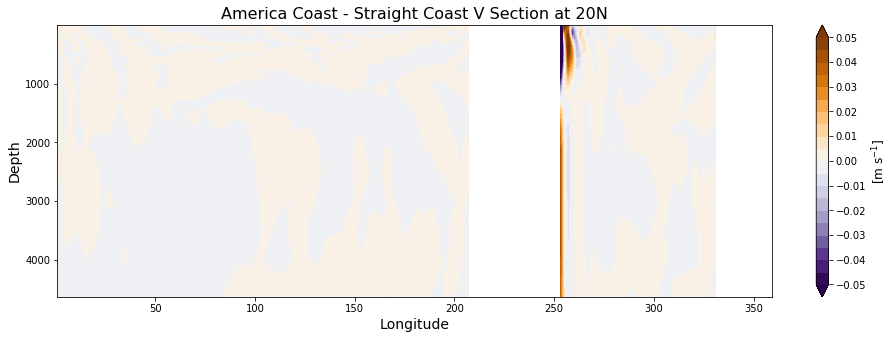

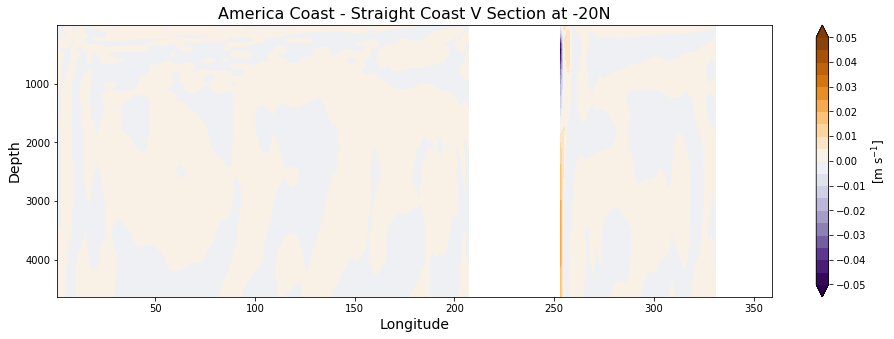

In [25]:
# Zonal Sections for America Coast - Straight Coast

plot_salt_section_zonal_diff(dy_am, 50, 5000, case_am)
plot_salt_section_zonal_diff(dy_am, 20, 5000, case_am)
plot_salt_section_zonal_diff(dy_am, -20, 5000, case_am)

plot_temp_section_zonal_diff(dy_am, 50, 5000, case_am)
plot_temp_section_zonal_diff(dy_am, 20, 5000, case_am)
plot_temp_section_zonal_diff(dy_am, -20, 5000, case_am)

plot_density_section_zonal_diff(dy_am, 50, 5000, case_am)
plot_density_section_zonal_diff(dy_am, 20, 5000, case_am)
plot_density_section_zonal_diff(dy_am, -20, 5000, case_am)

plot_u_section_zonal_diff(dy_am, 50, 5000, case_am)
plot_u_section_zonal_diff(dy_am, 20, 5000, case_am)
plot_u_section_zonal_diff(dy_am, -20, 5000, case_am)

plot_v_section_zonal_diff(dy_am, 50, 5000, case_am)
plot_v_section_zonal_diff(dy_am, 20, 5000, case_am)
plot_v_section_zonal_diff(dy_am, -20, 5000, case_am)

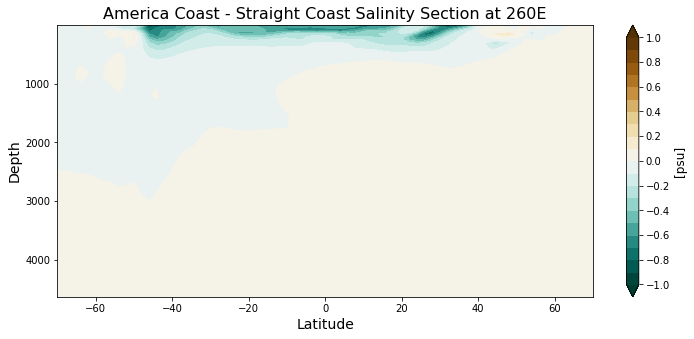

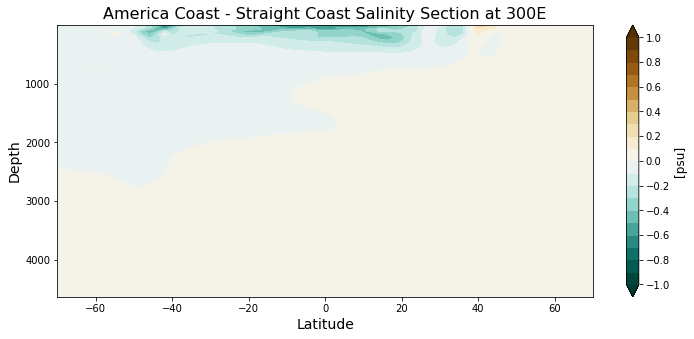

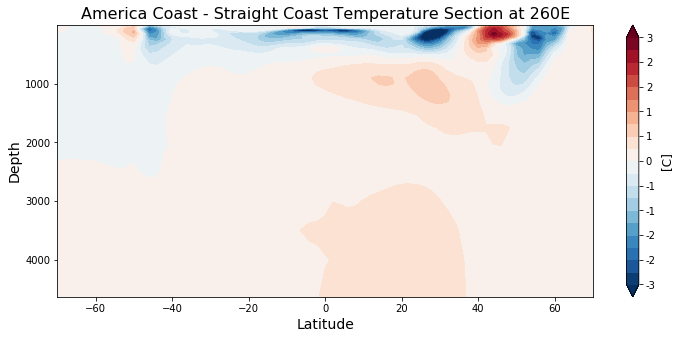

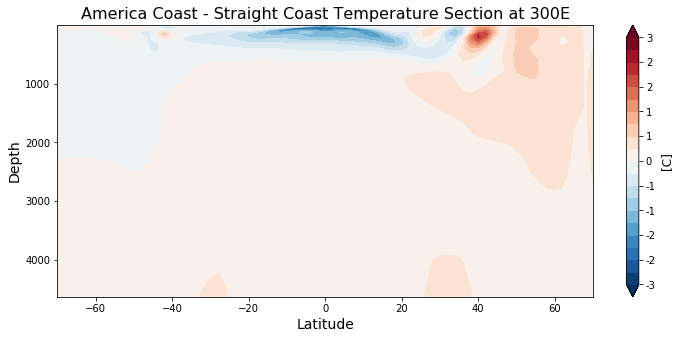

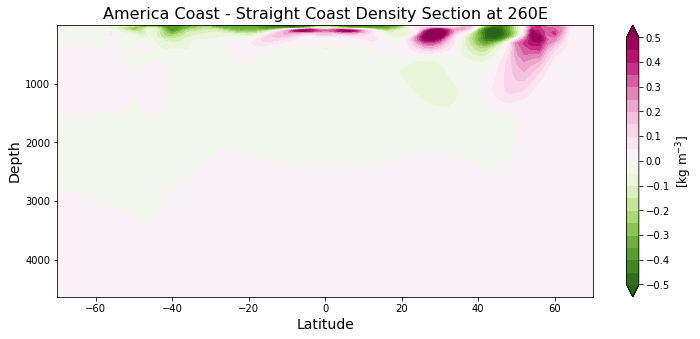

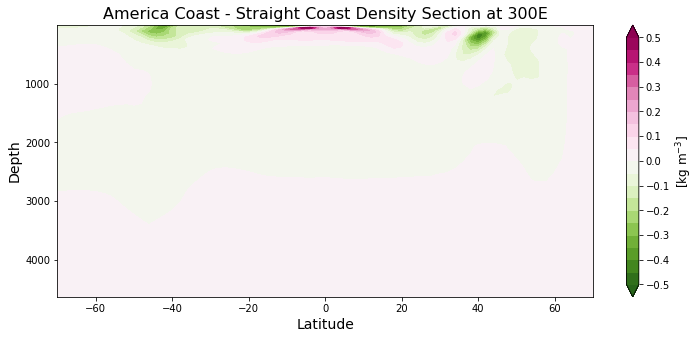

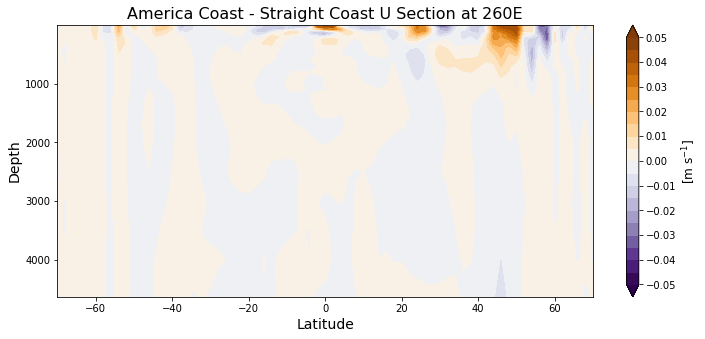

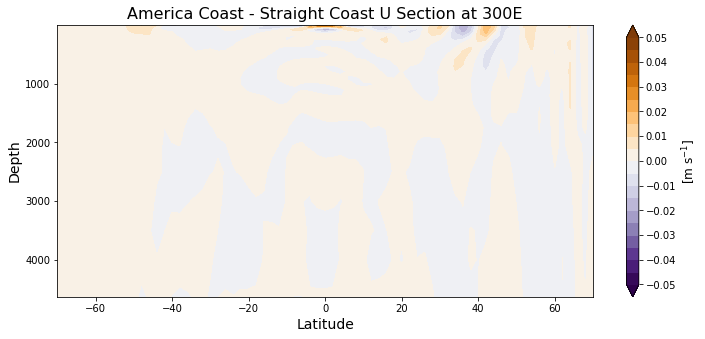

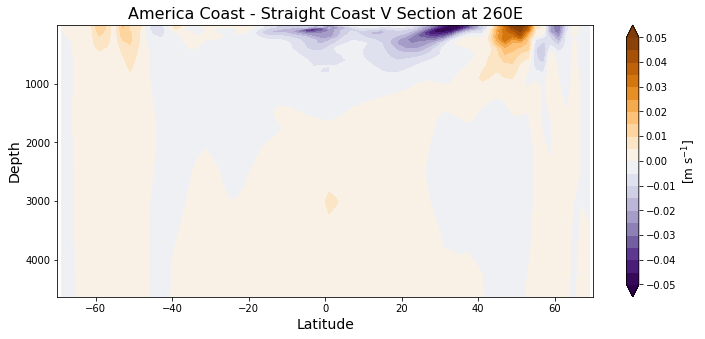

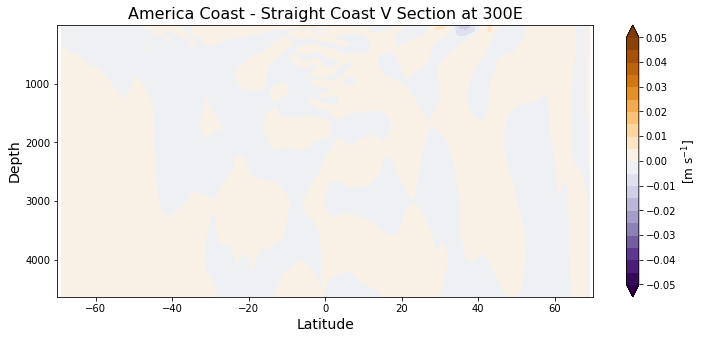

In [26]:
# Zonal sections for the America Coast - Straight Coast small basin

plot_salt_section_diff(dy_am, 260, 5000, case_am)
plot_salt_section_diff(dy_am, 300, 5000, case_am)

plot_temp_section_diff(dy_am, 260, 5000, case_am)
plot_temp_section_diff(dy_am, 300, 5000, case_am)

plot_density_section_diff(dy_am, 260, 5000, case_am)
plot_density_section_diff(dy_am, 300, 5000, case_am)

plot_u_section_diff(dy_am, 260, 5000, case_am)
plot_u_section_diff(dy_am, 300, 5000, case_am)

plot_v_section_diff(dy_am, 260, 5000, case_am)
plot_v_section_diff(dy_am, 300, 5000, case_am)

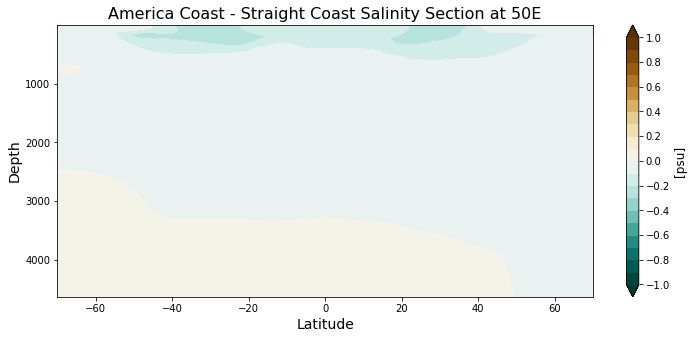

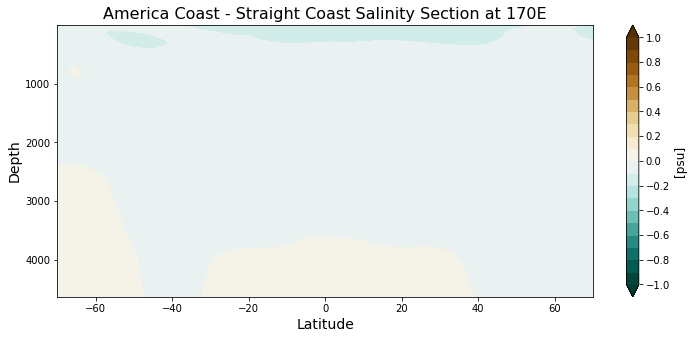

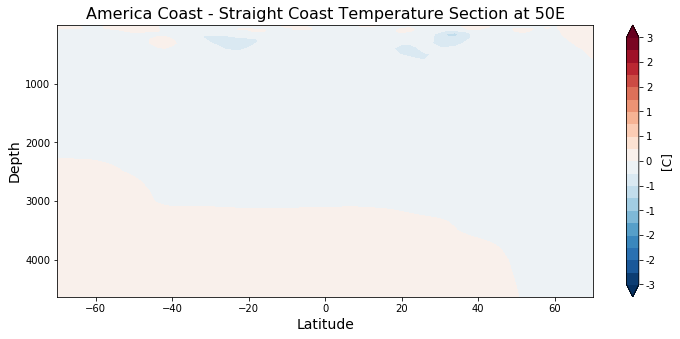

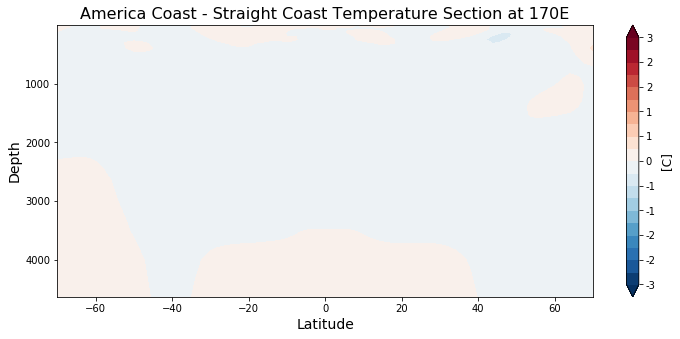

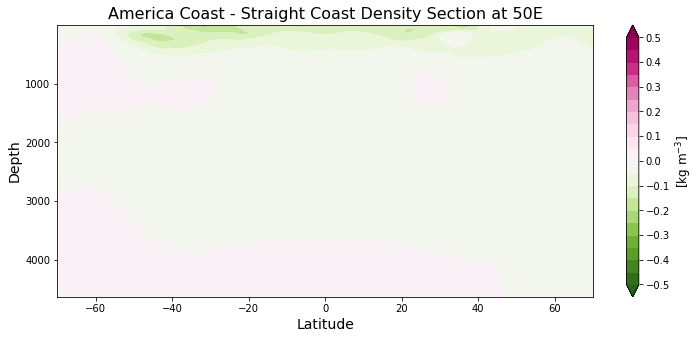

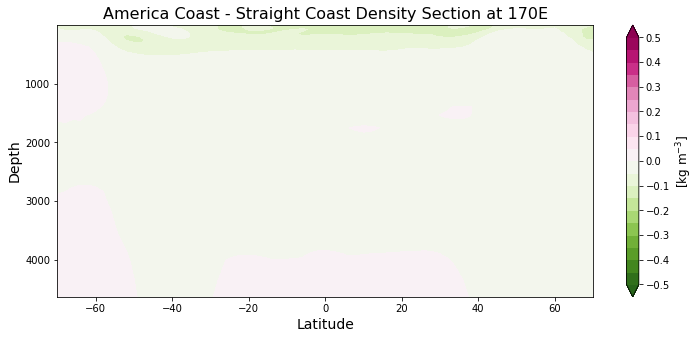

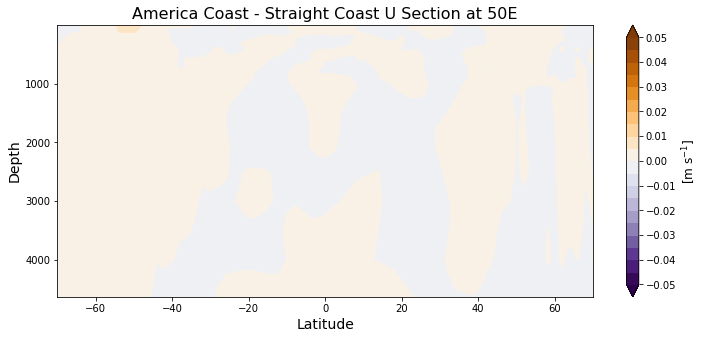

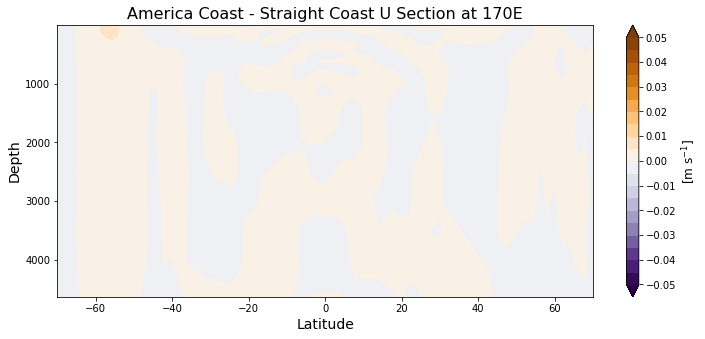

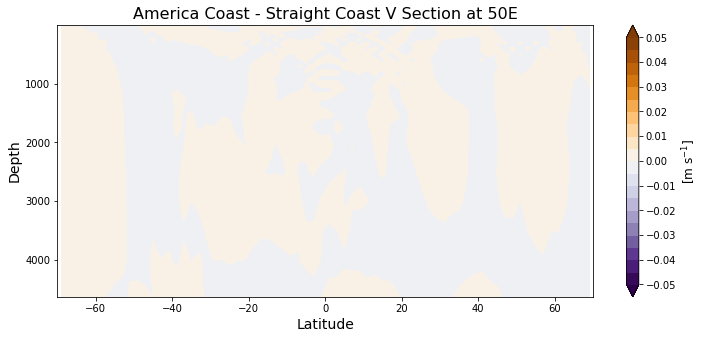

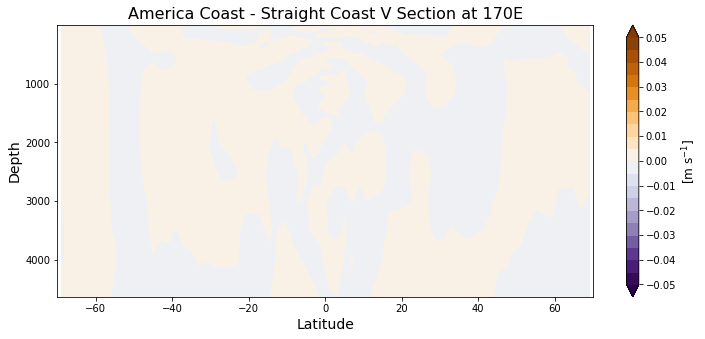

In [27]:
# Meridional sections for the America Coast - Straight Coast large basin

plot_salt_section_diff(dy_am, 50, 5000, case_am)
plot_salt_section_diff(dy_am, 170, 5000, case_am)

plot_temp_section_diff(dy_am, 50, 5000, case_am)
plot_temp_section_diff(dy_am, 170, 5000, case_am)

plot_density_section_diff(dy_am, 50, 5000, case_am)
plot_density_section_diff(dy_am, 170, 5000, case_am)

plot_u_section_diff(dy_am, 50, 5000, case_am)
plot_u_section_diff(dy_am, 170, 5000, case_am)

plot_v_section_diff(dy_am, 50, 5000, case_am)
plot_v_section_diff(dy_am, 170, 5000, case_am)

# Africa Coast - Straight Coast

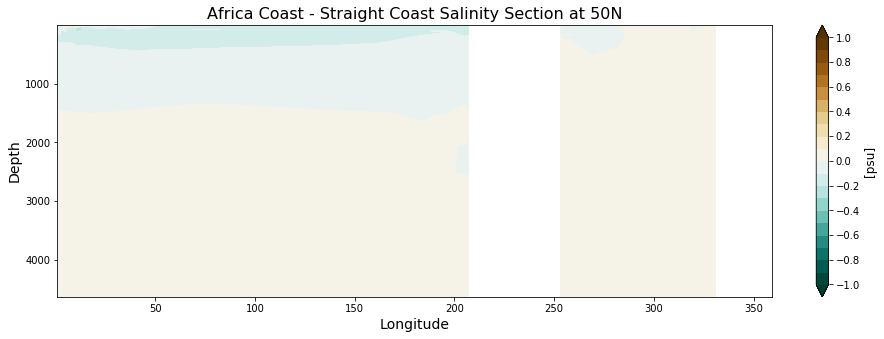

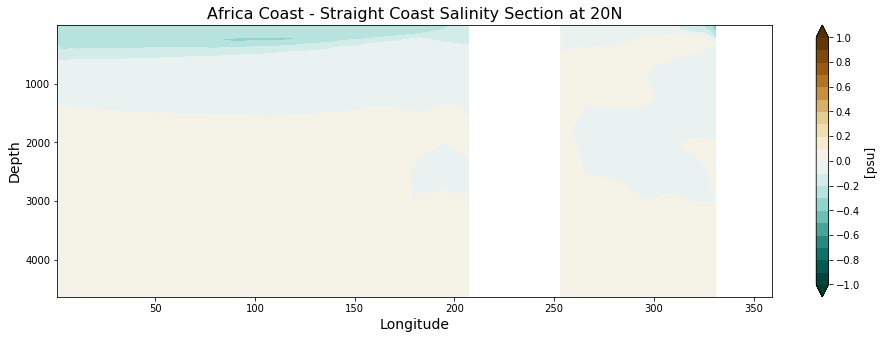

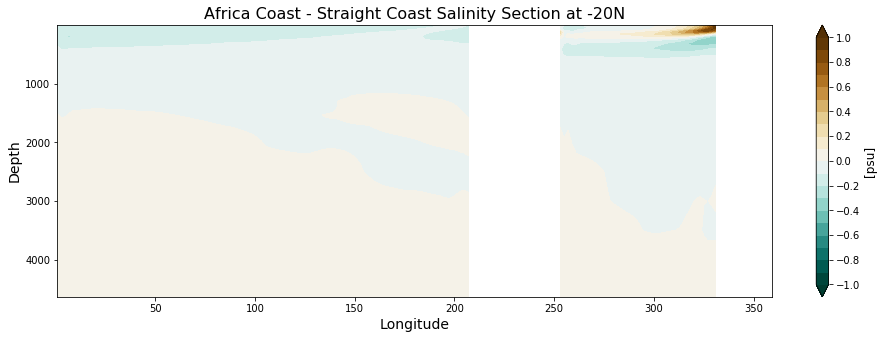

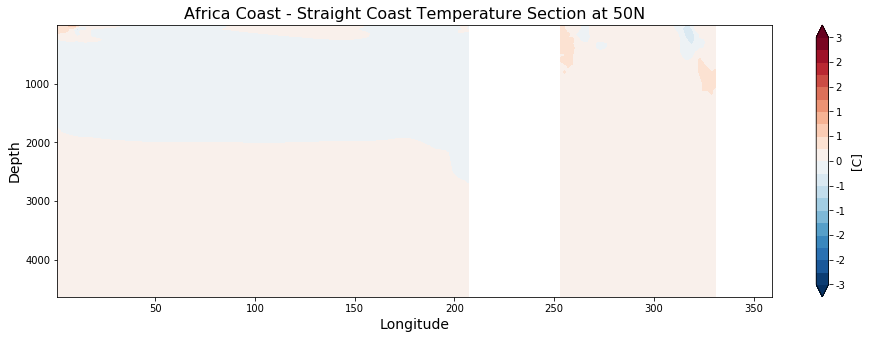

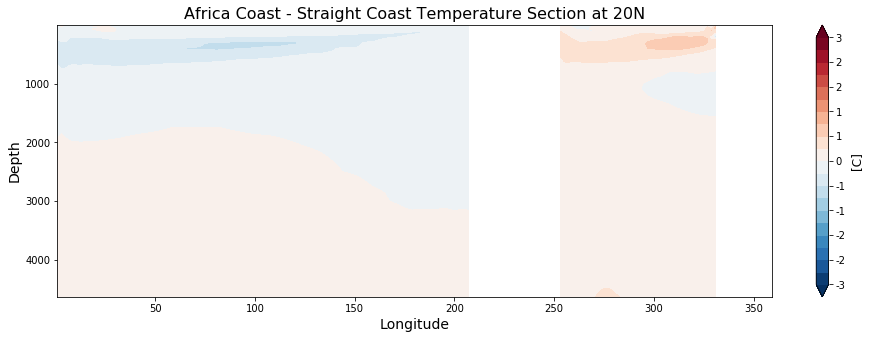

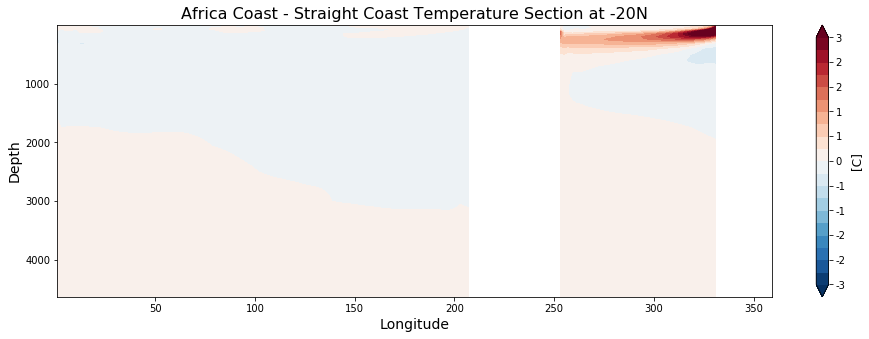

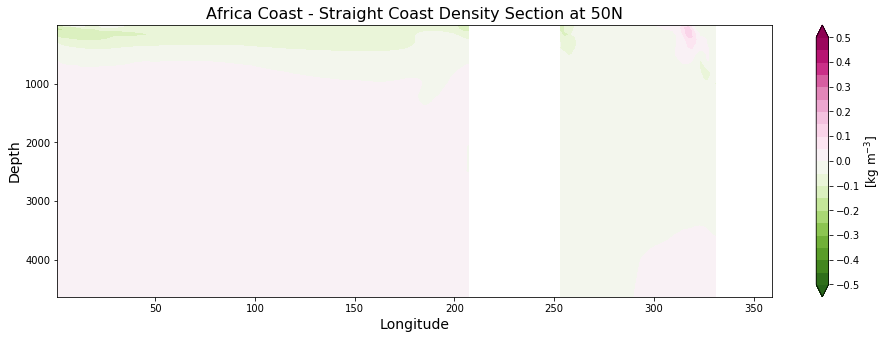

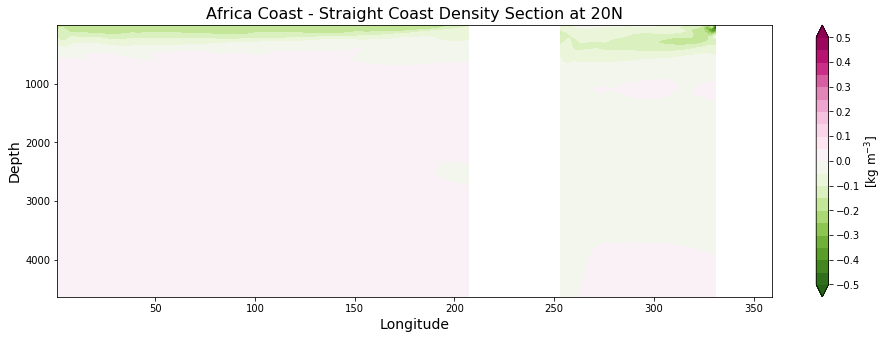

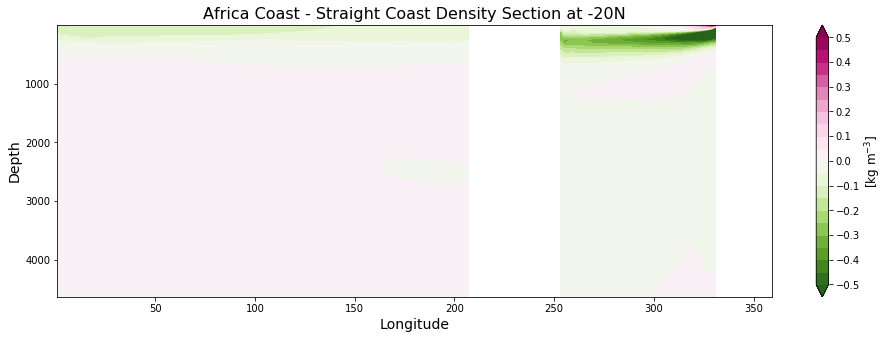

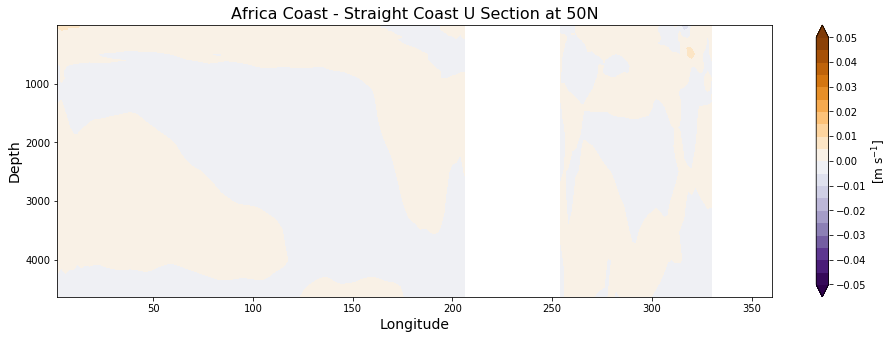

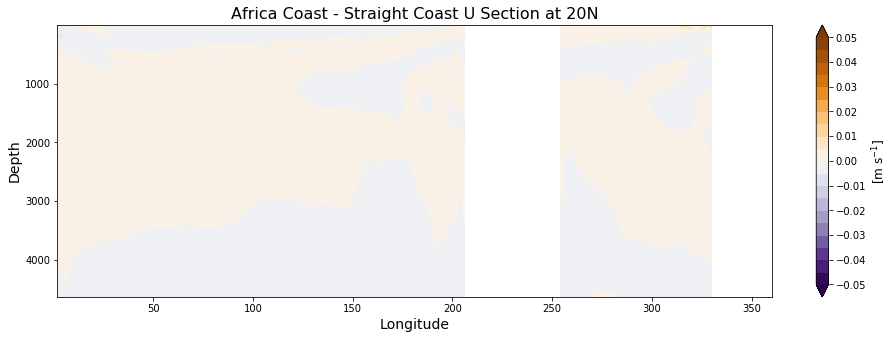

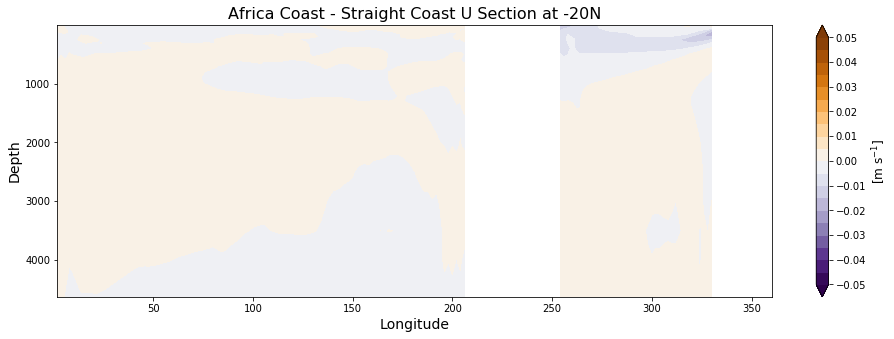

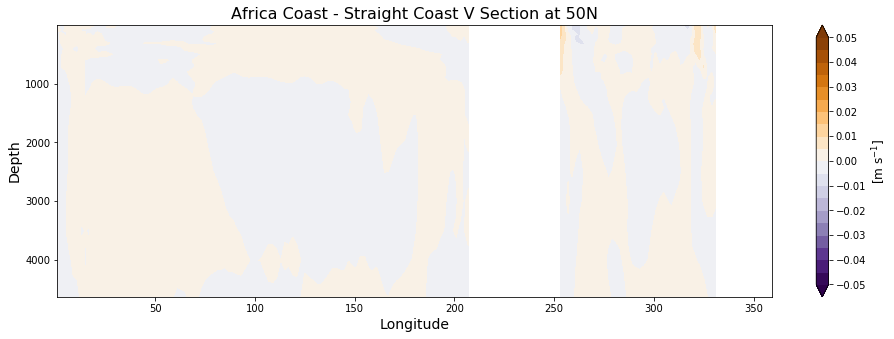

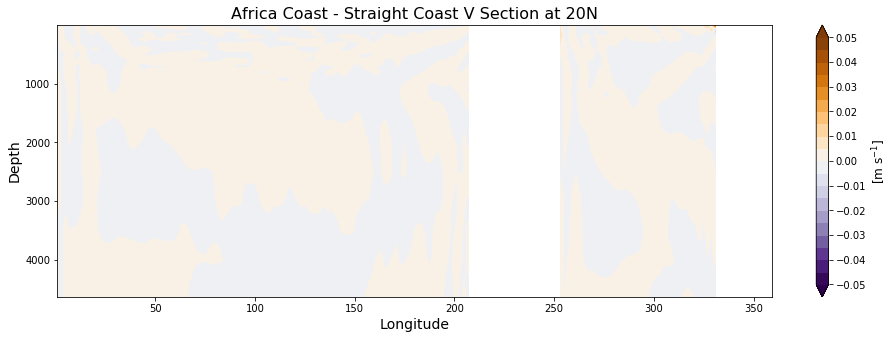

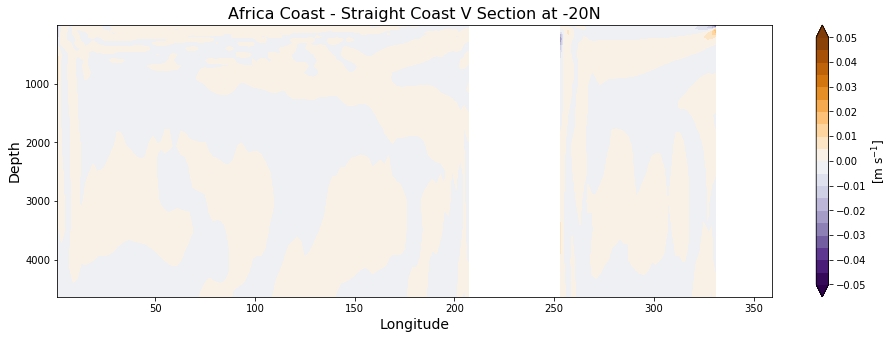

In [28]:
# Zonal Sections for Africa Coast - Straight Coast

plot_salt_section_zonal_diff(dy_af, 50, 5000, case_af)
plot_salt_section_zonal_diff(dy_af, 20, 5000, case_af)
plot_salt_section_zonal_diff(dy_af, -20, 5000, case_af)

plot_temp_section_zonal_diff(dy_af, 50, 5000, case_af)
plot_temp_section_zonal_diff(dy_af, 20, 5000, case_af)
plot_temp_section_zonal_diff(dy_af, -20, 5000, case_af)

plot_density_section_zonal_diff(dy_af, 50, 5000, case_af)
plot_density_section_zonal_diff(dy_af, 20, 5000, case_af)
plot_density_section_zonal_diff(dy_af, -20, 5000, case_af)

plot_u_section_zonal_diff(dy_af, 50, 5000, case_af)
plot_u_section_zonal_diff(dy_af, 20, 5000, case_af)
plot_u_section_zonal_diff(dy_af, -20, 5000, case_af)

plot_v_section_zonal_diff(dy_af, 50, 5000, case_af)
plot_v_section_zonal_diff(dy_af, 20, 5000, case_af)
plot_v_section_zonal_diff(dy_af, -20, 5000, case_af)

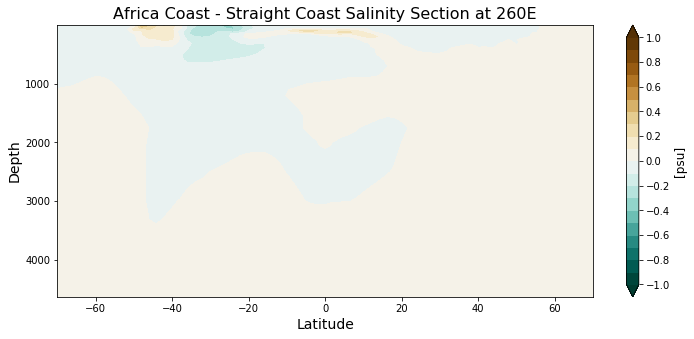

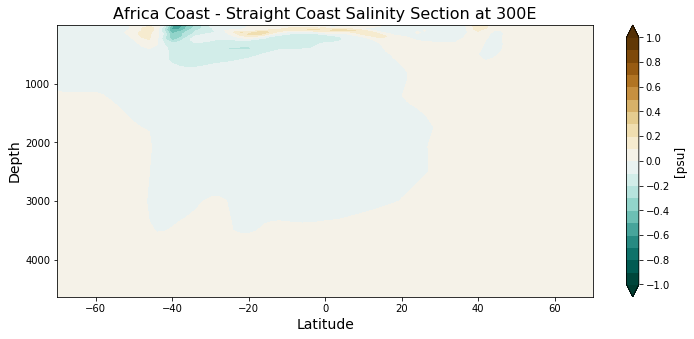

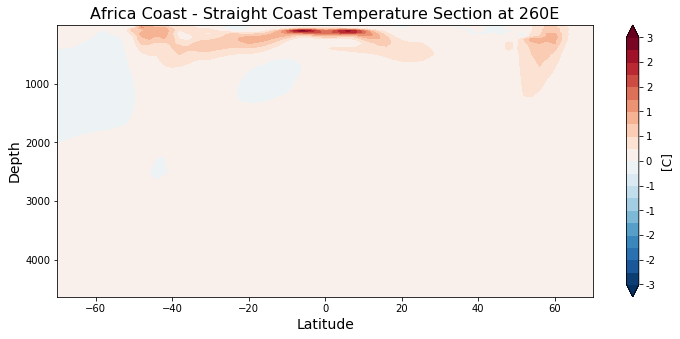

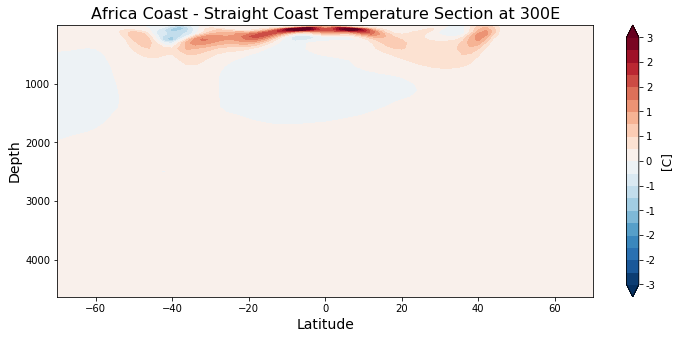

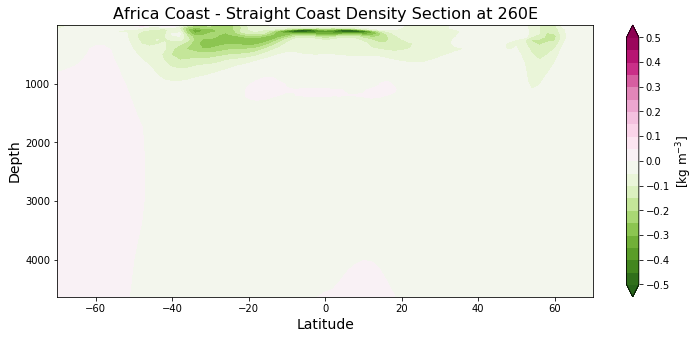

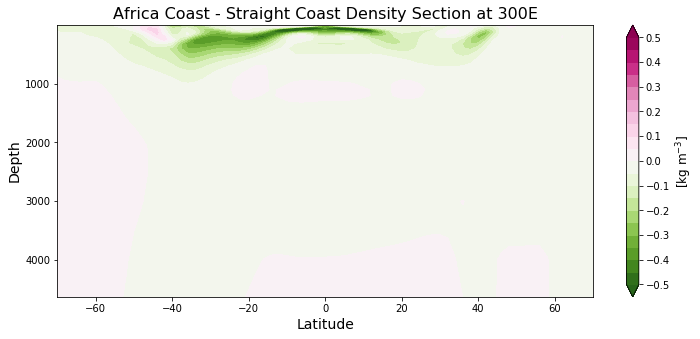

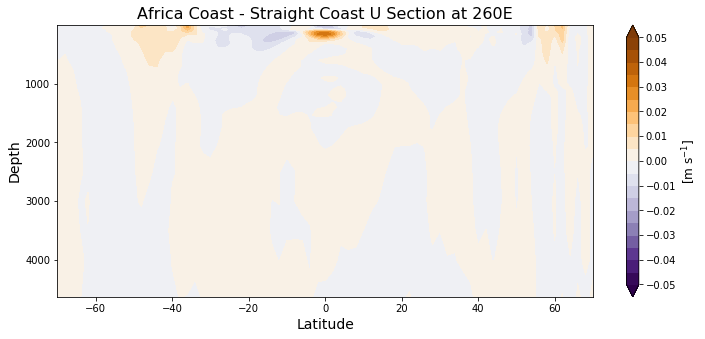

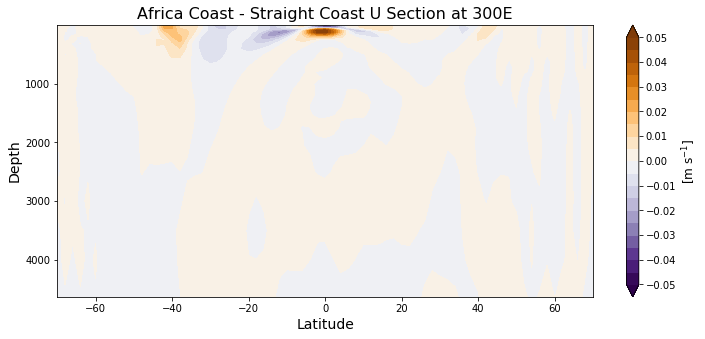

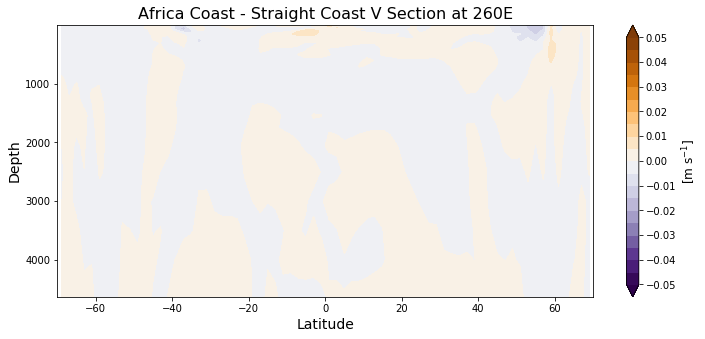

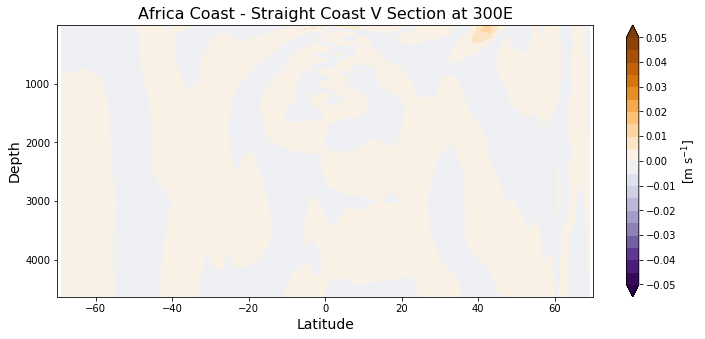

In [29]:
# Zonal sections for the Africa Coast - Straight Coast small basin

plot_salt_section_diff(dy_af, 260, 5000, case_af)
plot_salt_section_diff(dy_af, 300, 5000, case_af)

plot_temp_section_diff(dy_af, 260, 5000, case_af)
plot_temp_section_diff(dy_af, 300, 5000, case_af)

plot_density_section_diff(dy_af, 260, 5000, case_af)
plot_density_section_diff(dy_af, 300, 5000, case_af)

plot_u_section_diff(dy_af, 260, 5000, case_af)
plot_u_section_diff(dy_af, 300, 5000, case_af)

plot_v_section_diff(dy_af, 260, 5000, case_af)
plot_v_section_diff(dy_af, 300, 5000, case_af)

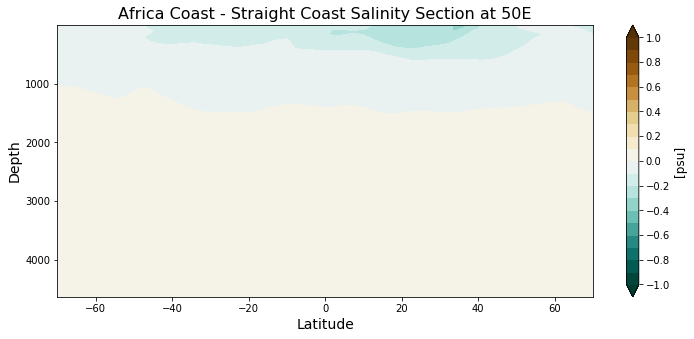

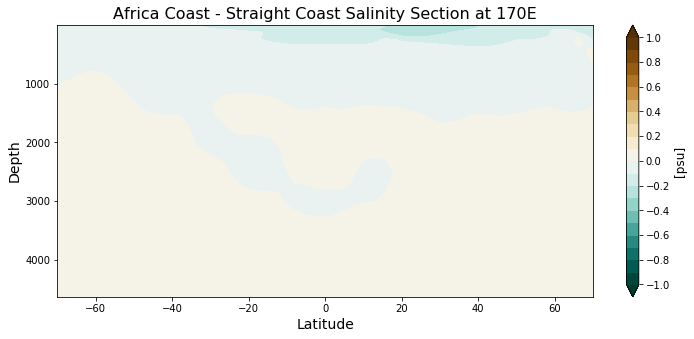

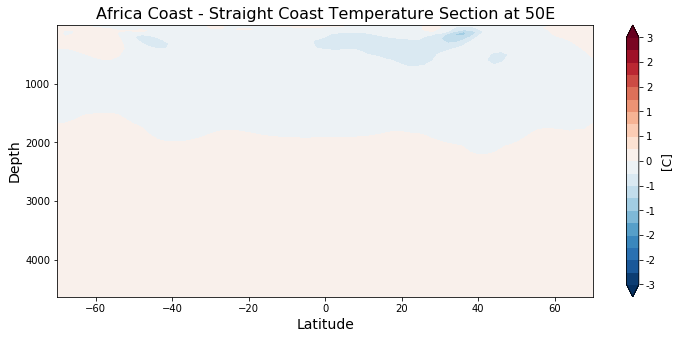

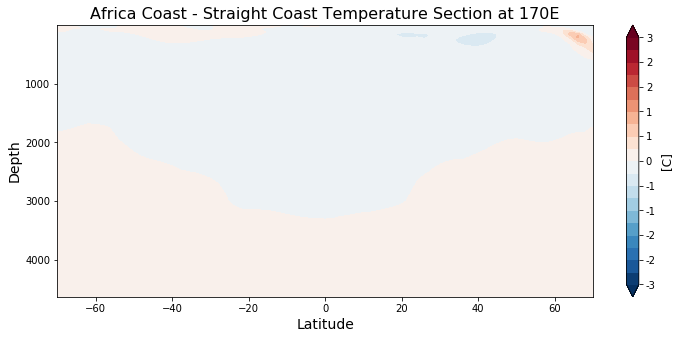

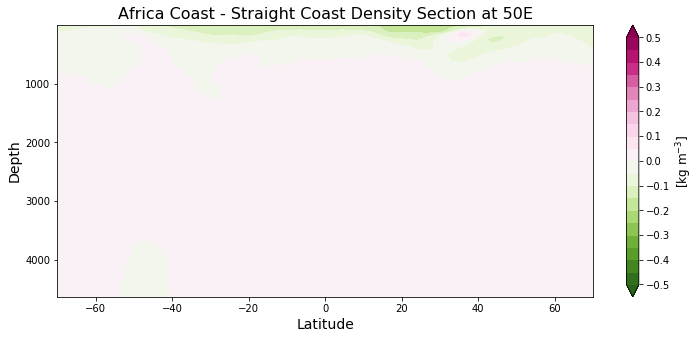

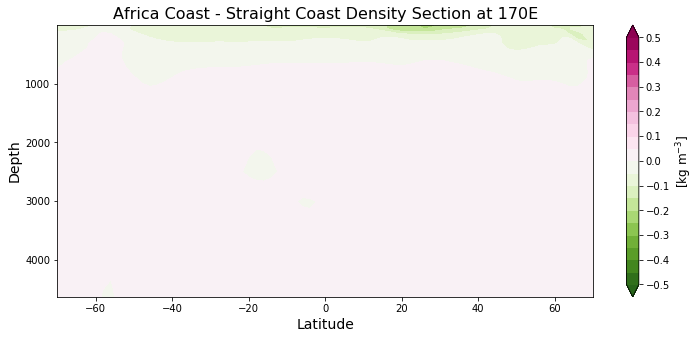

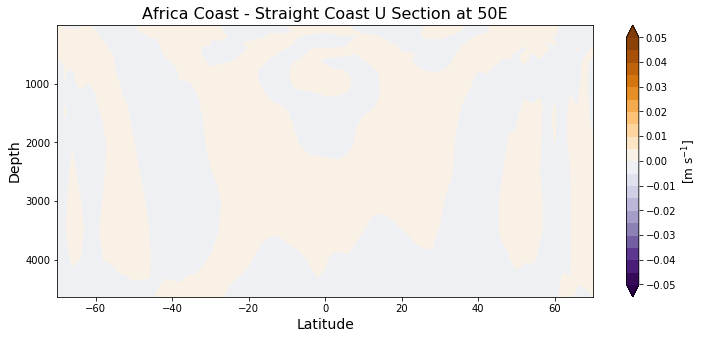

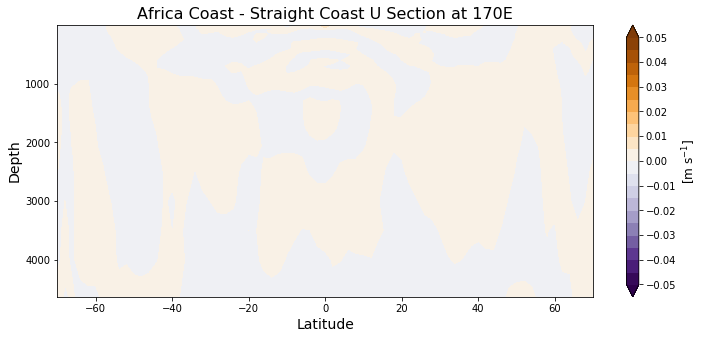

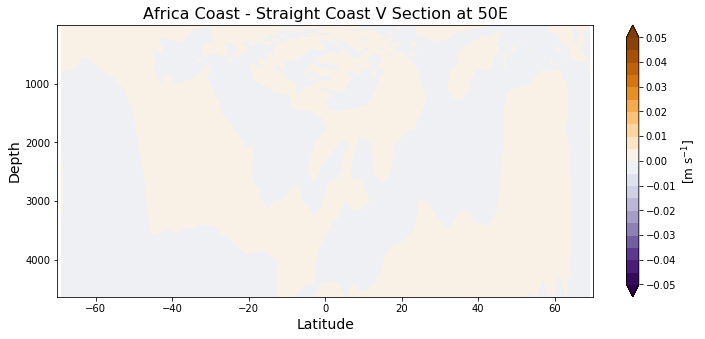

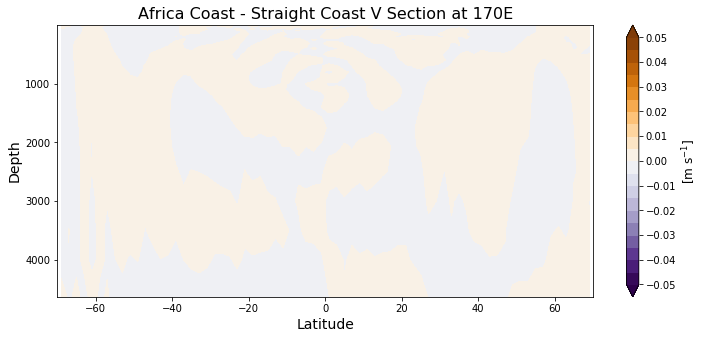

In [30]:
# Meridional sections for the Africa Coast - Straight Coast large basin

plot_salt_section_diff(dy_af, 50, 5000, case_af)
plot_salt_section_diff(dy_af, 170, 5000, case_af)

plot_temp_section_diff(dy_af, 50, 5000, case_af)
plot_temp_section_diff(dy_af, 170, 5000, case_af)

plot_density_section_diff(dy_af, 50, 5000, case_af)
plot_density_section_diff(dy_af, 170, 5000, case_af)

plot_u_section_diff(dy_af, 50, 5000, case_af)
plot_u_section_diff(dy_af, 170, 5000, case_af)

plot_v_section_diff(dy_af, 50, 5000, case_af)
plot_v_section_diff(dy_af, 170, 5000, case_af)

### Sections that follow the Western Boundary:

In [82]:
def find_western_boundary_properties(small_basin_dataset, variable):
    '''variable input must be in the form small_basin_dataset.variable'''
    wb_small = xr.zeros_like(variable.sel(xh=231))

    for i in range(len(small_basin_dataset.yh)):
        if variable.isel(yh=i).sum() == 0:
            wb_small[:,i] = variable.isel(yh=i).isel(xh=1)
        if np.isnan(variable.isel(yh=i)).all():
            wb_small[:,i] = variable.isel(yh=i).sel(xh=230, method='nearest')
        else: 
            for j in range(len(small_basin_dataset.xh)):
                if np.isnan(variable.isel(yh=i).isel(xh=j)).all():
                    continue
                if np.isnan(variable.isel(yh=i).isel(xh=j)).all() == False:
                    wb_small[:,i] = variable.isel(yh=i).isel(xh=j)
                    
    return wb_small


def plot_wb_salt_section(dataset, western_boundary_salt, z, case_name):
    t = np.linspace(33, 37, 11, endpoint=True)
    b = np.linspace(33, 37, 21, endpoint=True)
    fig, ax = plt.subplots(figsize=(12,5))
    cf = ax.contourf(dataset.yh, dataset.zl.sel(zl=slice(0,z)), 
                     western_boundary_salt.sel(zl=slice(0,z)),
                     b, extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Salinity Section along Western Boundary', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel('[psu]', fontsize=12)
#     plt.savefig(fig_path+'{}_salt_section_{}.png'.format(basin, lon))
    plt.show()
    return


def plot_wb_temp_section(dataset, western_boundary_temp, z, case_name):
    t = np.linspace(0, 28, 11, endpoint=True)
    b = np.linspace(0, 28, 21, endpoint=True)

    fig, ax = plt.subplots(figsize=(12,5))
    cf = ax.contourf(dataset.yh, dataset.zl.sel(zl=slice(0,z)), 
                     western_boundary_temp.sel(zl=slice(0,z)), 
                     b, cmap='magma', extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Temperature Section along Western Boundary', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel(r'[$^{\circ}$C]', fontsize=12)
    plt.show()
    return

def plot_wb_density_section(western_boundary_salt, western_boundary_temp, z, case_name):
    t = np.linspace(1030, 1037, 11, endpoint=True)
    b = np.linspace(1030, 1037, 21, endpoint=True)

    density = calc_sigma_wright(western_boundary_salt.sel(zl=slice(0,z)), 
                                western_boundary_temp.sel(zl=slice(0,z)), 
                                press=2000)
    
    fig, ax = plt.subplots(figsize=(12,5))
    cf = ax.contourf(western_boundary_salt.yh, western_boundary_salt.zl.sel(zl=slice(0,z)), 
                     density, 
                     b, cmap='BuPu', extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{}'.format(case_name)+' '+'Density Section along Western Boundary', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
    cbar.ax.set_ylabel('[kg m$^{-3}$]', fontsize=12)
    plt.show()
    return


def plot_wb_salt_diff_section(dataset, western_boundary_salt_1, western_boundary_salt_2, 
                              z, case_name_1, case_name_2):
    t = np.linspace(-0.7, 0.7, 11, endpoint=True)
    b = np.linspace(-0.7, 0.7, 21, endpoint=True)
    fig, ax = plt.subplots(figsize=(12,5))
    cf = ax.contourf(dataset.yh, dataset.zl.sel(zl=slice(0,z)), 
                     western_boundary_salt_1.sel(zl=slice(0,z))-western_boundary_salt_2.sel(zl=slice(0,z)),
                     b, cmap='BrBG_r', extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{}-{}'.format(case_name_1, case_name_2)+' '+'Salinity Section along Western Boundary', 
                 fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t)
    cbar.ax.set_ylabel('[psu]', fontsize=12)
#     plt.savefig(fig_path+'{}_salt_section_{}.png'.format(basin, lon))
    plt.show()
    return


def plot_wb_temp_diff_section(dataset, western_boundary_temp_1, western_boundary_temp_2, 
                              z, case_name_1, case_name_2):
    t = np.linspace(-2, 2, 11, endpoint=True)
    b = np.linspace(-2, 2, 21, endpoint=True)

    fig, ax = plt.subplots(figsize=(12,5))
    cf = ax.contourf(dataset.yh, dataset.zl.sel(zl=slice(0,z)), 
                     western_boundary_temp_1.sel(zl=slice(0,z))-western_boundary_temp_2.sel(zl=slice(0,z)), 
                     b, cmap='RdBu_r', extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{}-{}'.format(case_name_1, case_name_2)+' '+'Temperature Section along Western Boundary', 
                 fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t)
    cbar.ax.set_ylabel(r'[$^{\circ}$C]', fontsize=12)
    plt.show()
    return


def plot_wb_density_diff_section(western_boundary_salt_1, western_boundary_temp_1, 
                                 western_boundary_salt_2, western_boundary_temp_2, 
                                 z, case_name_1, case_name_2):
    t = np.linspace(-0.4, 0.4, 11, endpoint=True)
    b = np.linspace(-0.4, 0.4, 21, endpoint=True)

    density_1 = calc_sigma_wright(western_boundary_salt_1.sel(zl=slice(0,z)), 
                                western_boundary_temp_1.sel(zl=slice(0,z)), 
                                press=2000)
    
    density_2 = calc_sigma_wright(western_boundary_salt_2.sel(zl=slice(0,z)), 
                                western_boundary_temp_2.sel(zl=slice(0,z)), 
                                press=2000)
    
    density = density_1 - density_2
    
    fig, ax = plt.subplots(figsize=(12,5))
    cf = ax.contourf(western_boundary_salt_1.yh, western_boundary_salt_1.zl.sel(zl=slice(0,z)), 
                     density, 
                     b, cmap='PuOr_r', extend='both')
    ax.invert_yaxis()
    ax.set_xlim(-70, 70)
    plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Latitude', fontsize=14)
    ax.set_title('{}-{}'.format(case_name_1, case_name_2)+' '+'Density Section along Western Boundary', fontsize=16)
    cbar = fig.colorbar(cf, ax=ax, ticks=t)
    cbar.ax.set_ylabel('[kg m$^{-3}$]', fontsize=12)
    plt.show()
    return


In [62]:
# Straight Coast

straight_small = dy_straight.isel(xh=slice(x_west,x_east)).sel(xq=slice(x_west,x_east)).mean(dim='time')

In [63]:
wb_to_small_straight = find_western_boundary_properties(straight_small, straight_small.thetao)

wb_so_small_straight = find_western_boundary_properties(straight_small, straight_small.so)


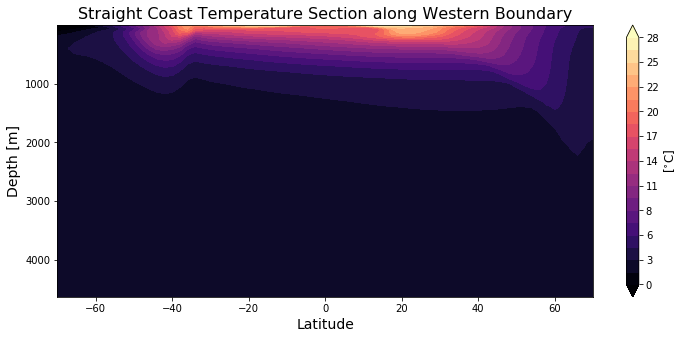

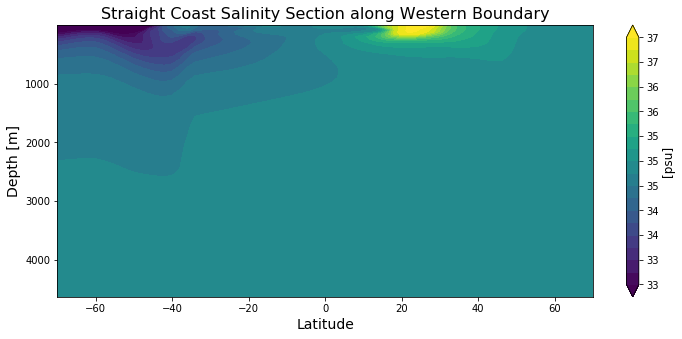

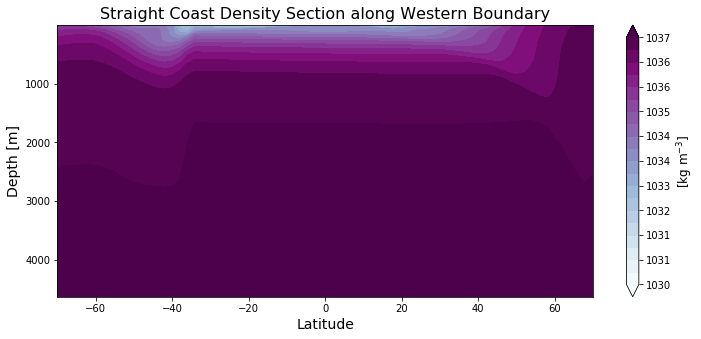

In [81]:
plot_wb_temp_section(dy_straight, wb_to_small_straight, 5000, case_straight)

plot_wb_salt_section(dy_straight, wb_so_small_straight, 5000, case_straight)

plot_wb_density_section(wb_so_small_straight, wb_to_small_straight, 5000, case_straight)

In [65]:
# Wide Coast

wide_small = dy_wide.isel(xh=slice(x_west,x_east)).sel(xq=slice(x_west,x_east)).mean(dim='time')

In [66]:
wb_to_small_wide = find_western_boundary_properties(wide_small, wide_small.thetao)

wb_so_small_wide = find_western_boundary_properties(wide_small, wide_small.so)


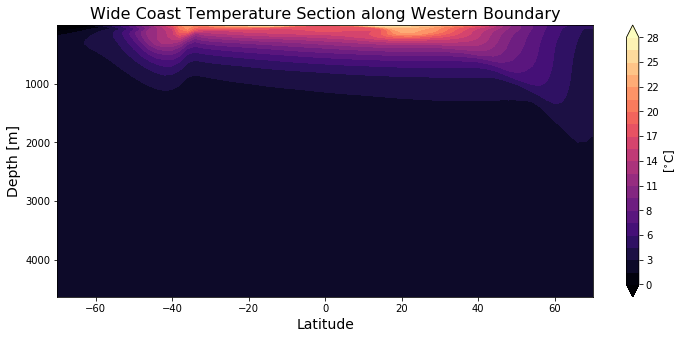

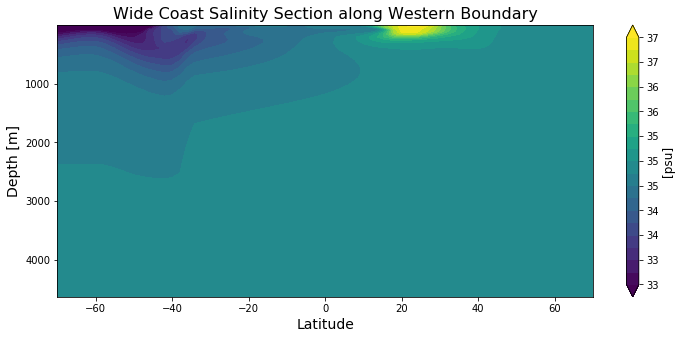

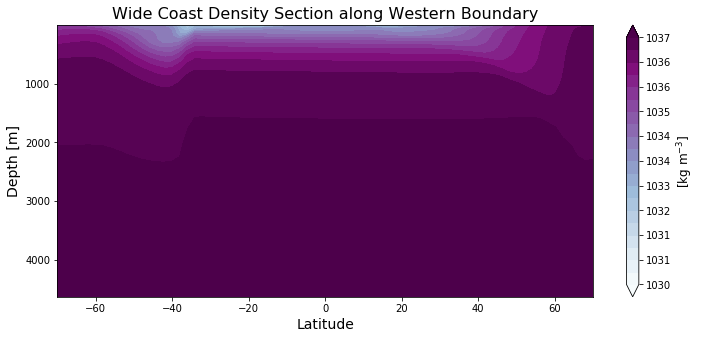

In [67]:
plot_wb_temp_section(dy_wide, wb_to_small_wide, 5000, case_wide)

plot_wb_salt_section(dy_wide, wb_so_small_wide, 5000, case_wide)

plot_wb_density_section(wb_so_small_wide, wb_to_small_wide, 5000, case_wide)

In [68]:
# Both Coast

both_small = dy_both.isel(xh=slice(x_west,x_east)).sel(xq=slice(x_west,x_east)).mean(dim='time')

In [69]:
wb_to_small_both = find_western_boundary_properties(both_small, both_small.thetao)

wb_so_small_both = find_western_boundary_properties(both_small, both_small.so)


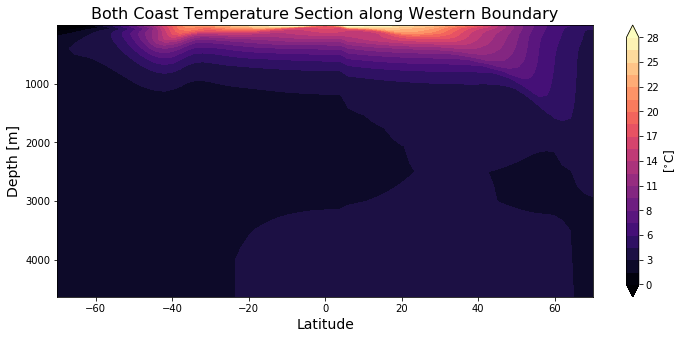

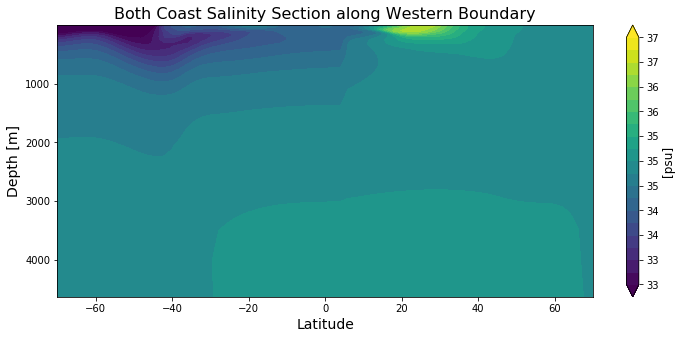

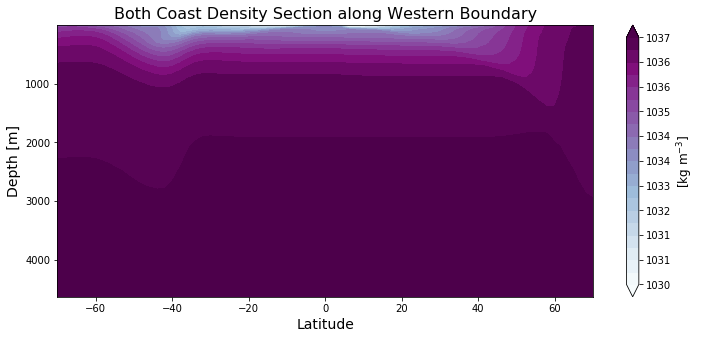

In [70]:
plot_wb_temp_section(dy_both, wb_to_small_both, 5000, case_both)

plot_wb_salt_section(dy_both, wb_so_small_both, 5000, case_both)

plot_wb_density_section(wb_so_small_both, wb_to_small_both, 5000, case_both)

In [71]:
# America Coast

am_small = dy_am.isel(xh=slice(x_west,x_east)).sel(xq=slice(x_west,x_east)).mean(dim='time')

In [72]:
wb_to_small_am = find_western_boundary_properties(am_small, am_small.thetao)

wb_so_small_am = find_western_boundary_properties(am_small, am_small.so)


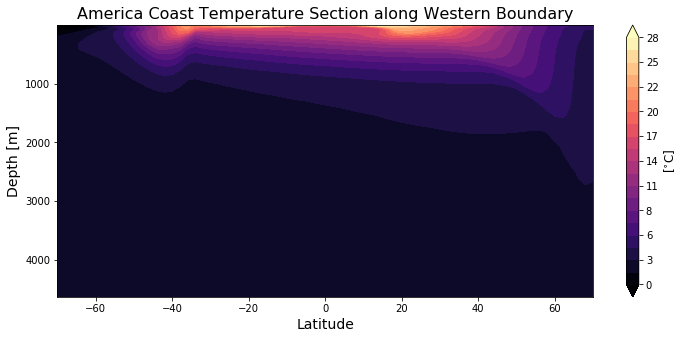

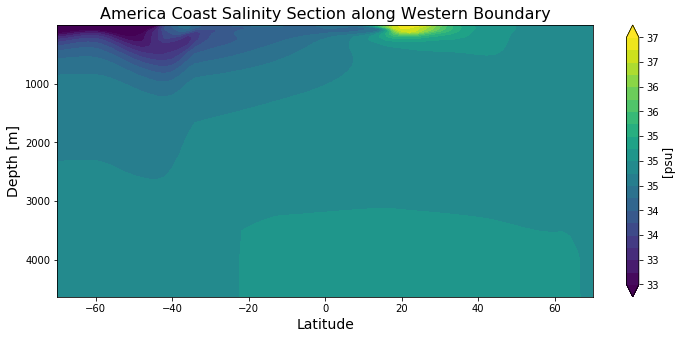

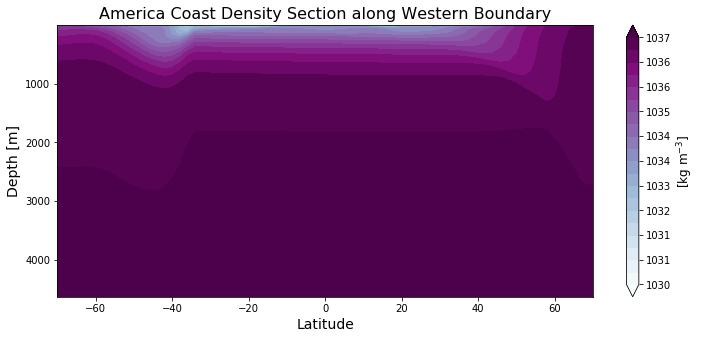

In [73]:
plot_wb_temp_section(dy_am, wb_to_small_am, 5000, case_am)

plot_wb_salt_section(dy_am, wb_so_small_am, 5000, case_am)

plot_wb_density_section(wb_so_small_am, wb_to_small_am, 5000, case_am)

In [74]:
# Africa Coast

af_small = dy_af.isel(xh=slice(x_west,x_east)).sel(xq=slice(x_west,x_east)).mean(dim='time')

In [75]:
wb_to_small_af = find_western_boundary_properties(af_small, af_small.thetao)

wb_so_small_af = find_western_boundary_properties(af_small, af_small.so)


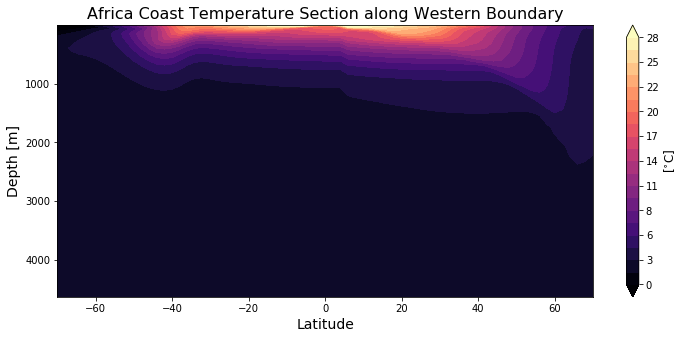

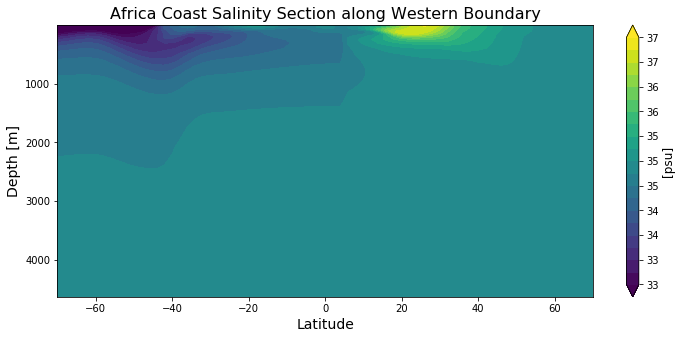

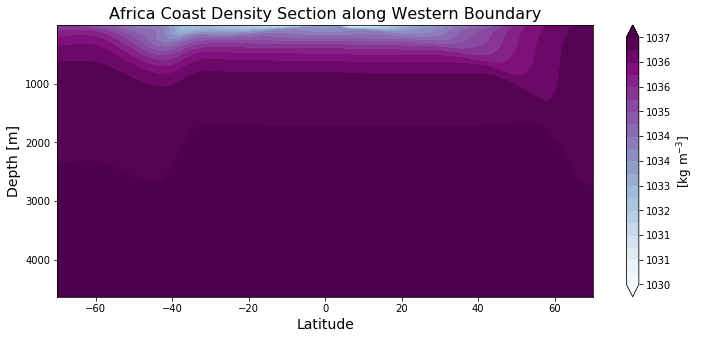

In [76]:
plot_wb_temp_section(dy_af, wb_to_small_af, 5000, case_af)

plot_wb_salt_section(dy_af, wb_so_small_af, 5000, case_af)

plot_wb_density_section(wb_so_small_af, wb_to_small_af, 5000, case_af)

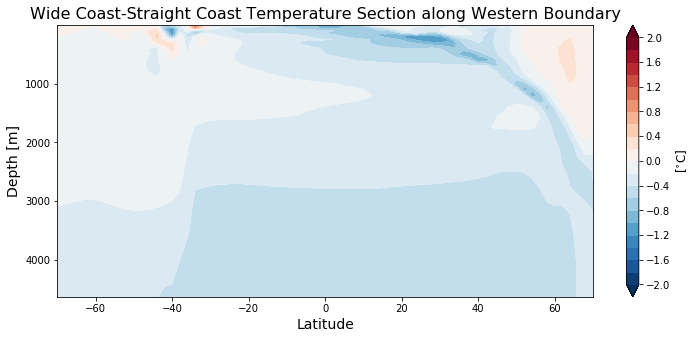

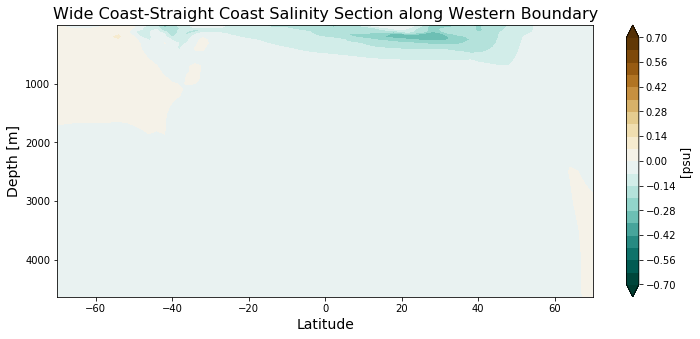

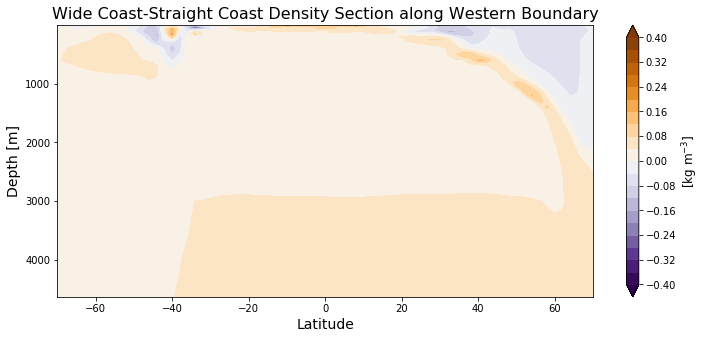

In [83]:
plot_wb_temp_diff_section(dy_wide, wb_to_small_wide, wb_to_small_straight, 
                              5000, case_wide, case_straight)

plot_wb_salt_diff_section(dy_wide, wb_so_small_wide, wb_so_small_straight, 
                              5000, case_wide, case_straight)

plot_wb_density_diff_section(wb_so_small_wide, wb_to_small_wide, 
                             wb_so_small_straight, wb_to_small_straight, 
                             5000, case_wide, case_straight)


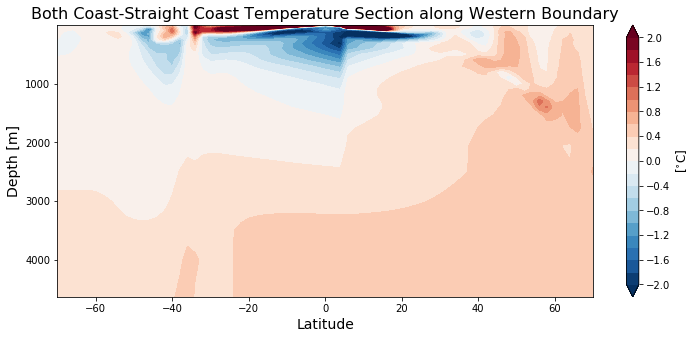

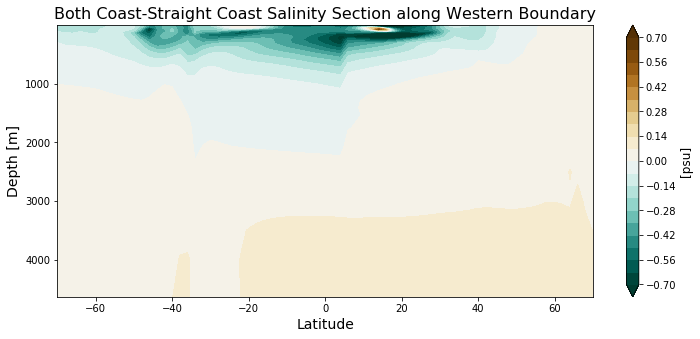

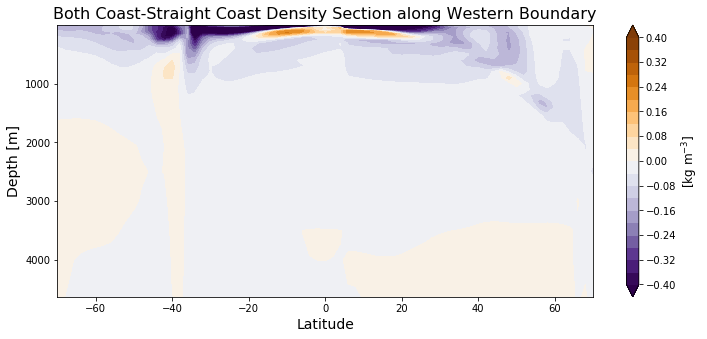

In [84]:
plot_wb_temp_diff_section(dy_both, wb_to_small_both, wb_to_small_straight, 
                              5000, case_both, case_straight)

plot_wb_salt_diff_section(dy_both, wb_so_small_both, wb_so_small_straight, 
                              5000, case_both, case_straight)

plot_wb_density_diff_section(wb_so_small_both, wb_to_small_both, 
                             wb_so_small_straight, wb_to_small_straight, 
                             5000, case_both, case_straight)

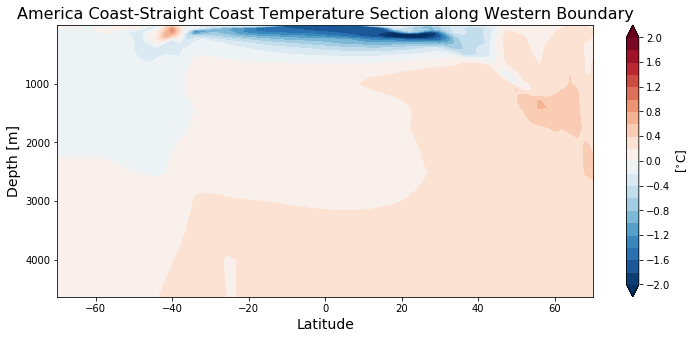

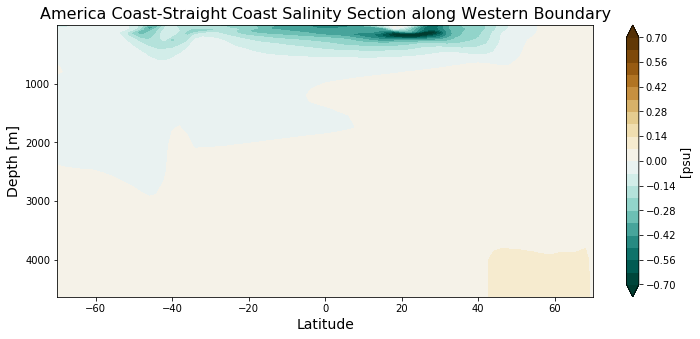

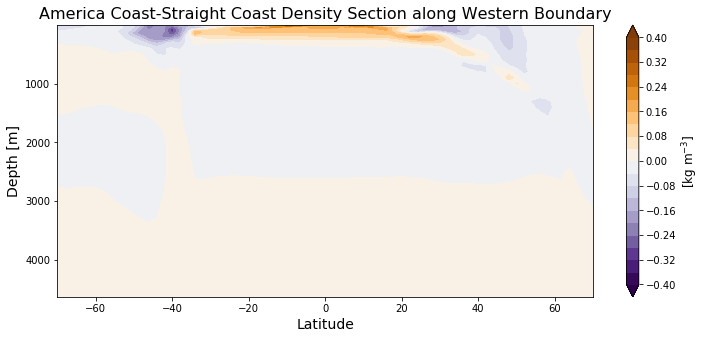

In [85]:
plot_wb_temp_diff_section(dy_am, wb_to_small_am, wb_to_small_straight, 
                              5000, case_am, case_straight)

plot_wb_salt_diff_section(dy_am, wb_so_small_am, wb_so_small_straight, 
                              5000, case_am, case_straight)

plot_wb_density_diff_section(wb_so_small_am, wb_to_small_am, 
                             wb_so_small_straight, wb_to_small_straight, 
                             5000, case_am, case_straight)

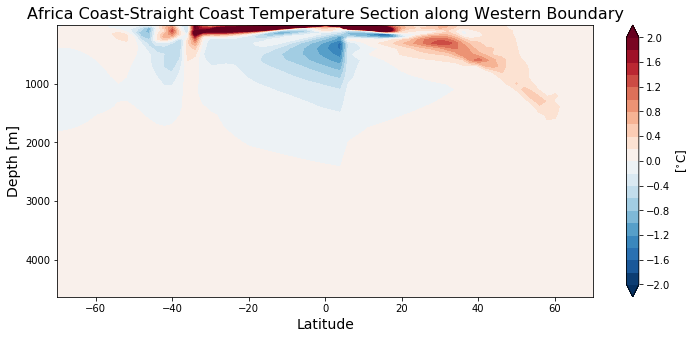

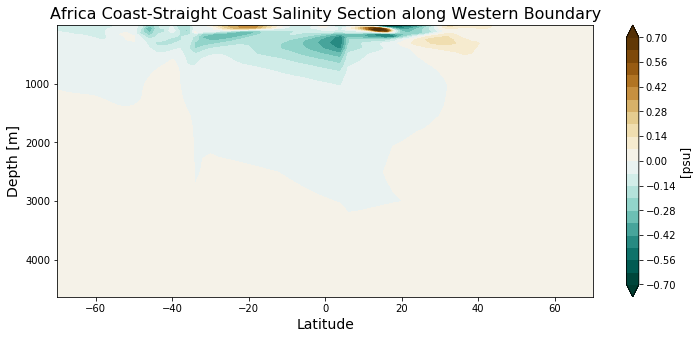

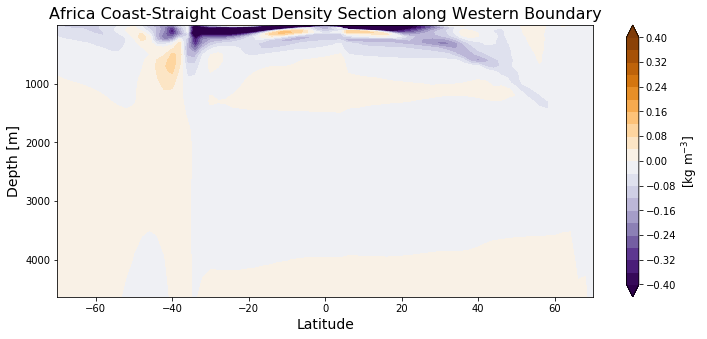

In [86]:
plot_wb_temp_diff_section(dy_af, wb_to_small_af, wb_to_small_straight, 
                              5000, case_af, case_straight)

plot_wb_salt_diff_section(dy_af, wb_so_small_af, wb_so_small_straight, 
                              5000, case_af, case_straight)

plot_wb_density_diff_section(wb_so_small_af, wb_to_small_af, 
                             wb_so_small_straight, wb_to_small_straight, 
                             5000, case_af, case_straight)